# **Cardiovascular_Disease_Prediction_Using Machine_Learning_Techniques**

## Table of Contents

1. **Environment Setup and Drive Mounting**  
2. **Software Environment Setup and Library Imports**  
3. **Dataset Loading and Initial Inspection**  
4. **Dataset Cleaning and Column Renaming**  
5. **Exploratory Data Analysis (EDA)**  
6. **Splitting the Dataset**  
7. **Model Selection and Baseline Training**  
   - 7.1 Model 1: Logistic Regression  
   - 7.2 Model 2: K-Nearest Neighbors (k-NN)  
   - 7.3 Model 3: Decision Tree  
   - 7.4 Model 4: Random Forest (RF)  
   - 7.5 Model 5: Extreme Gradient Boosting (XGBoost)  
   - 7.6 Model 6: Multi-Layer Perceptron (MLP)  
8. **Model Result Comparison Before Tuning**  
9. **Model Result Comparison After Tuning**  
10. **Overall Results and Best Model**  


# **1. Environment Setup and Drive Mounting**

In [ ]:
# Mount Google Drive to access dataset and save outputs
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **2. Software Environment Setup and Library Imports**

In [ ]:
# Importing all required libraries, grouped by purpose for clarity and reproducibility.
# This ensures each stage of the workflow (data handling, modelling, evaluation,
# and interpretation) is transparent and easy to follow.

# Data Handling & Statistical Utilities
import pandas as pd
import numpy as np
from math import sqrt
from scipy.stats import skew, chi2_contingency  # For skewness and chi-square tests

# Data Visualisation
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as patches  # For highlighting plot regions
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
import matplotlib.patches as mpatches
from matplotlib.ticker import PercentFormatter

# Preprocessing & Feature Scaling
from sklearn.preprocessing import StandardScaler

# Train-Test Splitting & Cross-Validation
from sklearn.model_selection import (
    train_test_split,
    cross_val_score,
    cross_validate,
    GridSearchCV
)

# Classical Machine Learning Models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier  # Gradient boosting (Ensemble)
from sklearn.inspection import permutation_importance
from sklearn.base import BaseEstimator
from sklearn.model_selection import KFold

# Deep Learning with Keras (MLP)
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
!pip install scikeras
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold

# Model Evaluation Metrics
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    classification_report,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    roc_curve,
    auc
)

# Explainability & Model Interpretation
import shap  # SHAP: SHapley Additive Explanations

# Utility & Reporting
from tabulate import tabulate  # For clean tabular result printing
import warnings
warnings.filterwarnings("ignore")  # Suppress warnings for clean outputs


# **3. Dataset Loading and Initial Inspection**

In [ ]:
# 3.1 Load the Dataset

# Define the file path in Google Drive
data_path = ("/Cardiovascular_Disease_Dataset.csv")

# Load the dataset into a Pandas DataFrame
df = pd.read_csv(data_path)

# Preview the first 10 rows to confirm the dataset has loaded correctly
df.head(10)


patientid  age  gender  chestpain  restingBP  serumcholestrol  \
0     103368   53       1          2        171                0   
1     119250   40       1          0         94              229   
2     119372   49       1          2        133              142   
3     132514   43       1          0        138              295   
4     146211   31       1          1        199                0   
5     148462   24       1          1        173                0   
6     168686   79       1          2        130              240   
7     170498   52       1          0        127              345   
8     188225   62       1          0        121              357   
9     192523   61       0          0        190              181   

   fastingbloodsugar  restingrelectro  maxheartrate  exerciseangia  oldpeak  \
0                  0                1           147              0      5.3   
1                  0                1           115              0      3.7   
2                  0                0           202              1      5.0   
3                  1                1           153              0      3.2   
4                  0                2           136              0      5.3   
5                  0                0           161              0      4.7   
6                  0                2           157              0      2.5   
7                  0                0           192              1      4.9   
8                  0                1           138              0      2.8   
9                  0                1           150              0      2.9   

   slope  noofmajorvessels  target  
0      3                 3       1  
1      1                 1       0  
2      1                 0       0  
3      2                 2       1  
4      3                 2       1  
5      3                 2       1  
6      2                 1       1  
7      1                 0       0  
8      0                 0       0  
9      2                 0       1

In [ ]:
# 3.2 Understand Dataset Structure

# Check dataset dimensions (rows × columns)
print(f" Shape of dataset: {df.shape[0]} rows × {df.shape[1]} columns")

# Display data types and check for any missing values
print("\n Dataset Info:")
df.info()

# Generate summary statistics for numerical features
print("\n Summary Statistics:")
display(df.describe())


 Shape of dataset: 1000 rows × 14 columns

 Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   patientid          1000 non-null   int64  
 1   age                1000 non-null   int64  
 2   gender             1000 non-null   int64  
 3   chestpain          1000 non-null   int64  
 4   restingBP          1000 non-null   int64  
 5   serumcholestrol    1000 non-null   int64  
 6   fastingbloodsugar  1000 non-null   int64  
 7   restingrelectro    1000 non-null   int64  
 8   maxheartrate       1000 non-null   int64  
 9   exerciseangia      1000 non-null   int64  
 10  oldpeak            1000 non-null   float64
 11  slope              1000 non-null   int64  
 12  noofmajorvessels   1000 non-null   int64  
 13  target             1000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 109.5 KB

 Summary Stati

patientid         age       gender    chestpain    restingBP  \
count  1.000000e+03  1000.00000  1000.000000  1000.000000  1000.000000   
mean   5.048704e+06    49.24200     0.765000     0.980000   151.747000   
std    2.895905e+06    17.86473     0.424211     0.953157    29.965228   
min    1.033680e+05    20.00000     0.000000     0.000000    94.000000   
25%    2.536440e+06    34.00000     1.000000     0.000000   129.000000   
50%    4.952508e+06    49.00000     1.000000     1.000000   147.000000   
75%    7.681877e+06    64.25000     1.000000     2.000000   181.000000   
max    9.990855e+06    80.00000     1.000000     3.000000   200.000000   

       serumcholestrol  fastingbloodsugar  restingrelectro  maxheartrate  \
count      1000.000000        1000.000000      1000.000000   1000.000000   
mean        311.447000           0.296000         0.748000    145.477000   
std         132.443801           0.456719         0.770123     34.190268   
min           0.000000           0.000000         0.000000     71.000000   
25%         235.750000           0.000000         0.000000    119.750000   
50%         318.000000           0.000000         1.000000    146.000000   
75%         404.250000           1.000000         1.000000    175.000000   
max         602.000000           1.000000         2.000000    202.000000   

       exerciseangia      oldpeak        slope  noofmajorvessels       target  
count    1000.000000  1000.000000  1000.000000       1000.000000  1000.000000  
mean        0.498000     2.707700     1.540000          1.222000     0.580000  
std         0.500246     1.720753     1.003697          0.977585     0.493805  
min         0.000000     0.000000     0.000000          0.000000     0.000000  
25%         0.000000     1.300000     1.000000          0.000000     0.000000  
50%         0.000000     2.400000     2.000000          1.000000     1.000000  
75%         1.000000     4.100000     2.000000          2.000000     1.000000  
max         1.000000     6.200000     3.000000          3.000000     1.000000

In [ ]:
# 3.2 Check for Missing and Duplicate Values

# Display the number of missing values in each column
print("Missing Values (per column):")
print(df.isnull().sum())

# Count how many duplicate rows exist in the dataset
duplicate_count = df.duplicated().sum()
print(f"\n Duplicate Rows: {duplicate_count}")

# If duplicates are found, remove them to ensure data quality
if duplicate_count > 0:
    df = df.drop_duplicates()
    print(f"{duplicate_count} duplicate rows removed.")


Missing Values (per column):
patientid            0
age                  0
gender               0
chestpain            0
restingBP            0
serumcholestrol      0
fastingbloodsugar    0
restingrelectro      0
maxheartrate         0
exerciseangia        0
oldpeak              0
slope                0
noofmajorvessels     0
target               0
dtype: int64

 Duplicate Rows: 0


In [ ]:
# 3.4 Enriched Column Dictionary for Reference

# Create a dictionary that maps each column to a detailed explanation.
# This helps interpret the dataset by linking variables to their clinical meaning.
data_info = {
    '1.patientid': 'Unique numeric identifier assigned to each patient record.',

    '2.age': 'Age of the patient in years. Risk increases after 45 (men) and 55 (women).',

    '3.gender': 'Biological sex (0 = female, 1 = male). Males are generally at higher risk.',

    '4.chestpain': (
        'Chest pain type:\n'
        '  • 0 = Typical angina (restricted blood flow)\n'
        '  • 1 = Atypical angina\n'
        '  • 2 = Non-anginal pain\n'
        '  • 3 = Asymptomatic (no pain but possible condition)'
    ),

    '5.restingBP': 'Resting systolic blood pressure (mm Hg). High values may indicate hypertension.',

    '6.serumcholestrol': 'Serum cholesterol level (mg/dl). Elevated levels can cause arterial plaque buildup.',

    '7.fastingbloodsugar': 'Fasting blood sugar > 120 mg/dl (0 = No, 1 = Yes). High values suggest diabetes risk.',

    '8.restingrelectro': (
        'Resting ECG results:\n'
        '  • 0 = Normal\n'
        '  • 1 = ST-T wave abnormality (possible ischemia)\n'
        '  • 2 = Left ventricular hypertrophy (thickened heart muscle)'
    ),

    '9.maxheartrate': 'Maximum heart rate during exercise. Low values may indicate reduced cardiac function.',

    '10.exerciseangia': 'Exercise-induced angina (0 = No, 1 = Yes). Pain during exercise is a key sign of coronary issues.',

    '11.oldpeak': 'ST depression induced by exercise. Higher values indicate abnormal heart response.',

    '12.slope': (
        'Slope of the peak ST segment during ECG stress test:\n'
        '  • 1 = Upsloping\n'
        '  • 2 = Flat\n'
        '  • 3 = Downsloping\n'
        'Flat or downsloping patterns often indicate abnormal cardiac function.'
    ),

    '13.noofmajorvessels': 'Number of major blood vessels (0–3) visible via fluoroscopy. Blockages reduce count.',

    '14.target': (
        'Heart disease indicator:\n'
        '  • 0 = No heart disease\n'
        '  • 1 = Heart disease detected'
    )
}

# Print all feature names with their descriptions for easy reference
print(" Enriched Feature Descriptions:\n")
for feature, explanation in data_info.items():
    print(f" {feature}:\n{explanation}\n")


 Enriched Feature Descriptions:

 1.patientid:
Unique numeric identifier assigned to each patient record.

 2.age:
Age of the patient in years. Risk increases after 45 (men) and 55 (women).

 3.gender:
Biological sex (0 = female, 1 = male). Males are generally at higher risk.

 4.chestpain:
Chest pain type:
  • 0 = Typical angina (restricted blood flow)
  • 1 = Atypical angina
  • 2 = Non-anginal pain
  • 3 = Asymptomatic (no pain but possible condition)

 5.restingBP:
Resting systolic blood pressure (mm Hg). High values may indicate hypertension.

 6.serumcholestrol:
Serum cholesterol level (mg/dl). Elevated levels can cause arterial plaque buildup.

 7.fastingbloodsugar:
Fasting blood sugar > 120 mg/dl (0 = No, 1 = Yes). High values suggest diabetes risk.

 8.restingrelectro:
Resting ECG results:
  • 0 = Normal
  • 1 = ST-T wave abnormality (possible ischemia)
  • 2 = Left ventricular hypertrophy (thickened heart muscle)

 9.maxheartrate:
Maximum heart rate during exercise. Low value

# **4. Dataset Loading and Initial Inspection**

In [ ]:
# 4.1 Drop irrelevant identifiers that do not contribute to prediction

# Define columns to remove (patient ID is unique but has no predictive value)
cols_to_drop = ['patientid']

# Drop the specified columns from the dataset, ignoring errors if column not found
df.drop(columns=cols_to_drop, inplace=True, errors='ignore')


In [ ]:
# 4.2  Rename Columns for Simplicity

# Create a dictionary mapping old column names to new ones
df.rename(columns= {
    'gender': 'sex',
    'chestpain': 'chest_pain_type',
    'restingBP': 'resting_blood_pressure',
    'serumcholestrol': 'cholesterol',
    'fastingbloodsugar': 'fasting_blood_sugar',
    'restingrelectro': 'rest_ecg',
    'maxheartrate': 'max_heart_rate_achieved',
    'exerciseangia': 'exercise_induced_angina',
    'oldpeak': 'st_depression',
    'slope': 'st_slope',
    'noofmajorvessels': 'num_major_vessels',
    'target': 'target'
}, inplace= True)


print("Columns after renaming:\n", df.columns.tolist())



Columns after renaming:
 ['age', 'sex', 'chest_pain_type', 'resting_blood_pressure', 'cholesterol', 'fasting_blood_sugar', 'rest_ecg', 'max_heart_rate_achieved', 'exercise_induced_angina', 'st_depression', 'st_slope', 'num_major_vessels', 'target']


In [ ]:
#4.3 Print changes for reference
print("Column Name Changes:")
for old_col, new_col in df.items():
    print(f"'{old_col}'  ➝  '{new_col}'")

Column Name Changes:
'age'  ➝  '0      53
1      40
2      49
3      43
4      31
       ..
995    48
996    47
997    69
998    45
999    25
Name: age, Length: 1000, dtype: int64'
'sex'  ➝  '0      1
1      1
2      1
3      1
4      1
      ..
995    1
996    1
997    1
998    1
999    1
Name: sex, Length: 1000, dtype: int64'
'chest_pain_type'  ➝  '0      2
1      0
2      2
3      0
4      1
      ..
995    2
996    3
997    0
998    1
999    0
Name: chest_pain_type, Length: 1000, dtype: int64'
'resting_blood_pressure'  ➝  '0      171
1       94
2      133
3      138
4      199
      ... 
995    139
996    143
997    156
998    186
999    158
Name: resting_blood_pressure, Length: 1000, dtype: int64'
'cholesterol'  ➝  '0        0
1      229
2      142
3      295
4        0
      ... 
995    349
996    258
997    434
998    417
999    270
Name: cholesterol, Length: 1000, dtype: int64'
'fasting_blood_sugar'  ➝  '0      0
1      0
2      0
3      1
4      0
      ..
995    0
996    1
99

In [ ]:
# 4.4 final check
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      1000 non-null   int64  
 1   sex                      1000 non-null   int64  
 2   chest_pain_type          1000 non-null   int64  
 3   resting_blood_pressure   1000 non-null   int64  
 4   cholesterol              1000 non-null   int64  
 5   fasting_blood_sugar      1000 non-null   int64  
 6   rest_ecg                 1000 non-null   int64  
 7   max_heart_rate_achieved  1000 non-null   int64  
 8   exercise_induced_angina  1000 non-null   int64  
 9   st_depression            1000 non-null   float64
 10  st_slope                 1000 non-null   int64  
 11  num_major_vessels        1000 non-null   int64  
 12  target                   1000 non-null   int64  
dtypes: float64(1), int64(12)
memory usage: 101.7 KB


# **5. Exploratory Data Analysis (EDA)**

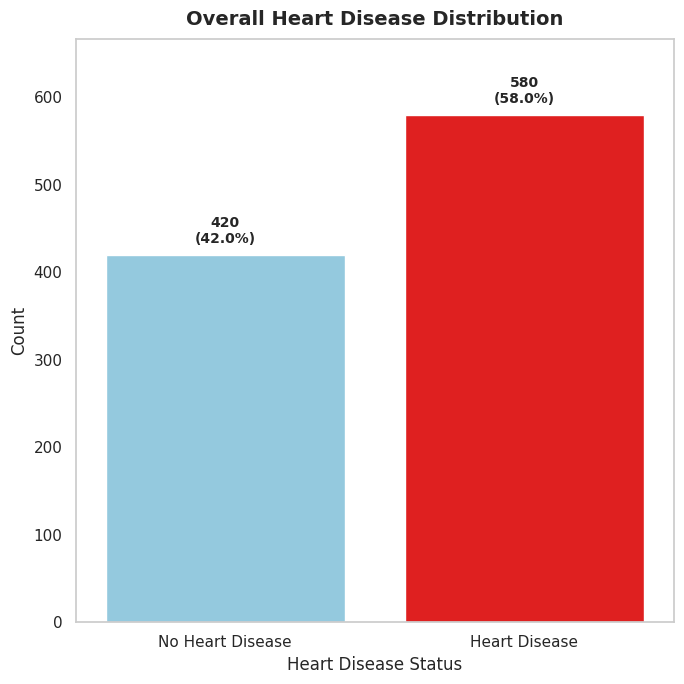

In [ ]:
# #5.1 Overall Heart Disease Distribution
# Copy of df for plotting only
df_plot = df.copy()
df_plot['Target Label'] = df_plot['target'].map({0: 'No Heart Disease', 1: 'Heart Disease'})

# Create the plot
plt.figure(figsize=(7, 7))  # Taller figure for spacing
ax = sns.countplot(
    data=df_plot,
    x='Target Label',
    order=['No Heart Disease', 'Heart Disease'],
    palette={'No Heart Disease': 'skyblue', 'Heart Disease': 'red'}
)

# Turn off grid lines
ax.grid(False)

# Annotate count and percentage above each bar
total = len(df_plot)
for p in ax.patches:
    count = int(p.get_height())
    pct = 100 * count / total
    ax.text(
        p.get_x() + p.get_width() / 2., p.get_height() + total * 0.01,
        f'{count}\n({pct:.1f}%)',
        ha='center', va='bottom', fontsize=10, fontweight='bold'
    )

# Extend y-axis limit to avoid clipping
ax.set_ylim(0, max([p.get_height() for p in ax.patches]) * 1.15)

# Titles and labels
plt.title("Overall Heart Disease Distribution", fontsize=14, pad=10, fontweight='bold')
plt.xlabel("Heart Disease Status")
plt.ylabel("Count")

plt.tight_layout()
plt.show()

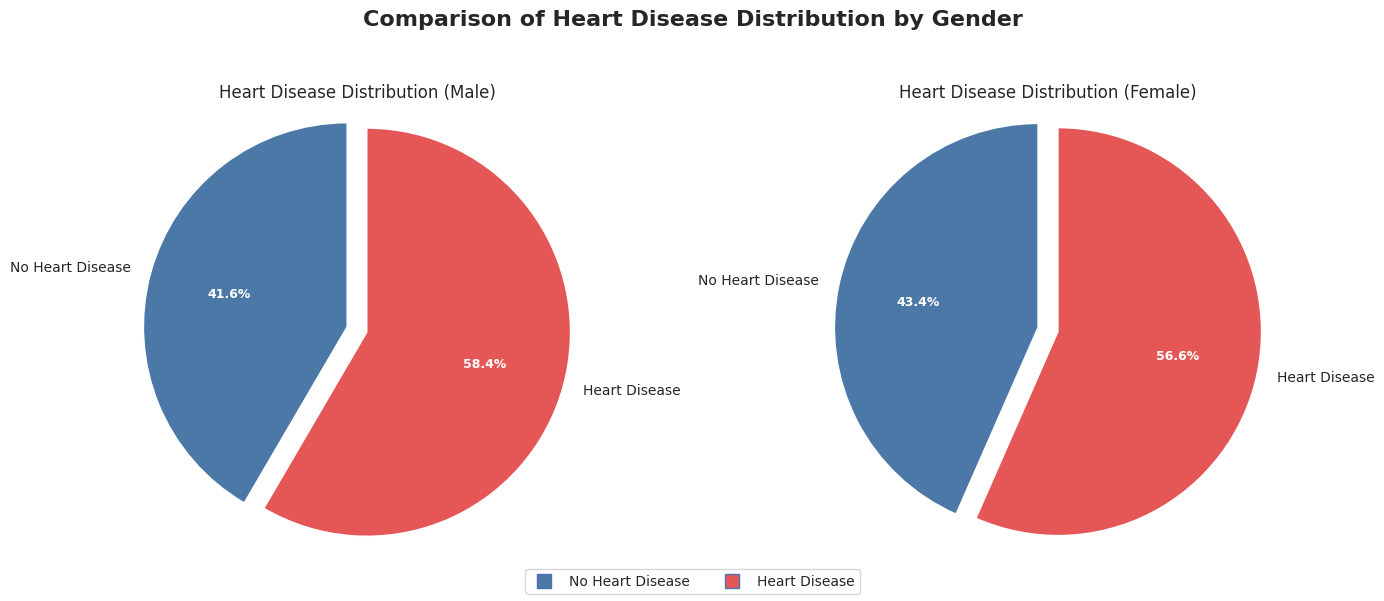

In [ ]:
# 5.2 Comparison of Heart Disease Distribution by Sex
# Create a copy for visualisation (keeps main df clean)
df_plot = df.copy()

# Map categorical values to human-readable labels
df_plot['Target Label'] = df_plot['target'].map({0: 'No Heart Disease', 1: 'Heart Disease'})
df_plot['Sex Label'] = df_plot['sex'].map({0: 'Female', 1: 'Male'})

# Define a consistent colour scheme
COLOR_MAP = {'No Heart Disease': '#4C78A8', 'Heart Disease': '#E45756'}

# Create side-by-side pie charts for each sex
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

for i, sex in enumerate(['Male', 'Female']):
    ax = axes[i]

    # Filter data for current sex group
    subset = df_plot[df_plot['Sex Label'] == sex]

    # Count target classes (No Disease / Disease)
    counts = subset['Target Label'].value_counts().reindex(COLOR_MAP.keys(), fill_value=0)

    # Plot pie chart
    wedges, texts, autotexts = ax.pie(
        counts.values,
        labels=counts.index,
        autopct='%1.1f%%',
        startangle=90,
        colors=[COLOR_MAP[l] for l in counts.index],
        explode=(0.05, 0.05),
        shadow=False,
        textprops={'fontsize': 10}
    )

    # Style percentage text (only change here)
    for t in autotexts:
        t.set_fontsize(9)
        t.set_fontweight('bold')
        t.set_color("white")   # 🔹 percentage text colour updated

    # Title for each subplot
    ax.set_title(f'Heart Disease Distribution ({sex})', fontsize=12, pad=8)
    ax.axis('equal')  # Ensure perfect circle

# Global title across both plots
plt.suptitle("Comparison of Heart Disease Distribution by Gender",
             fontsize=16, fontweight='bold', y=0.98)

# Manual legend shared across charts
handles = [
    plt.Line2D([0], [0], marker='s', linestyle='', markersize=10,
               markerfacecolor=COLOR_MAP['No Heart Disease'], label='No Heart Disease'),
    plt.Line2D([0], [0], marker='s', linestyle='', markersize=10,
               markerfacecolor=COLOR_MAP['Heart Disease'], label='Heart Disease')
]
fig.legend(handles=handles, loc='lower center', ncol=2, frameon=True, fontsize=10)

# Adjust layout to fit title and legend
plt.tight_layout(rect=[0, 0.05, 1, 0.95])
plt.show()


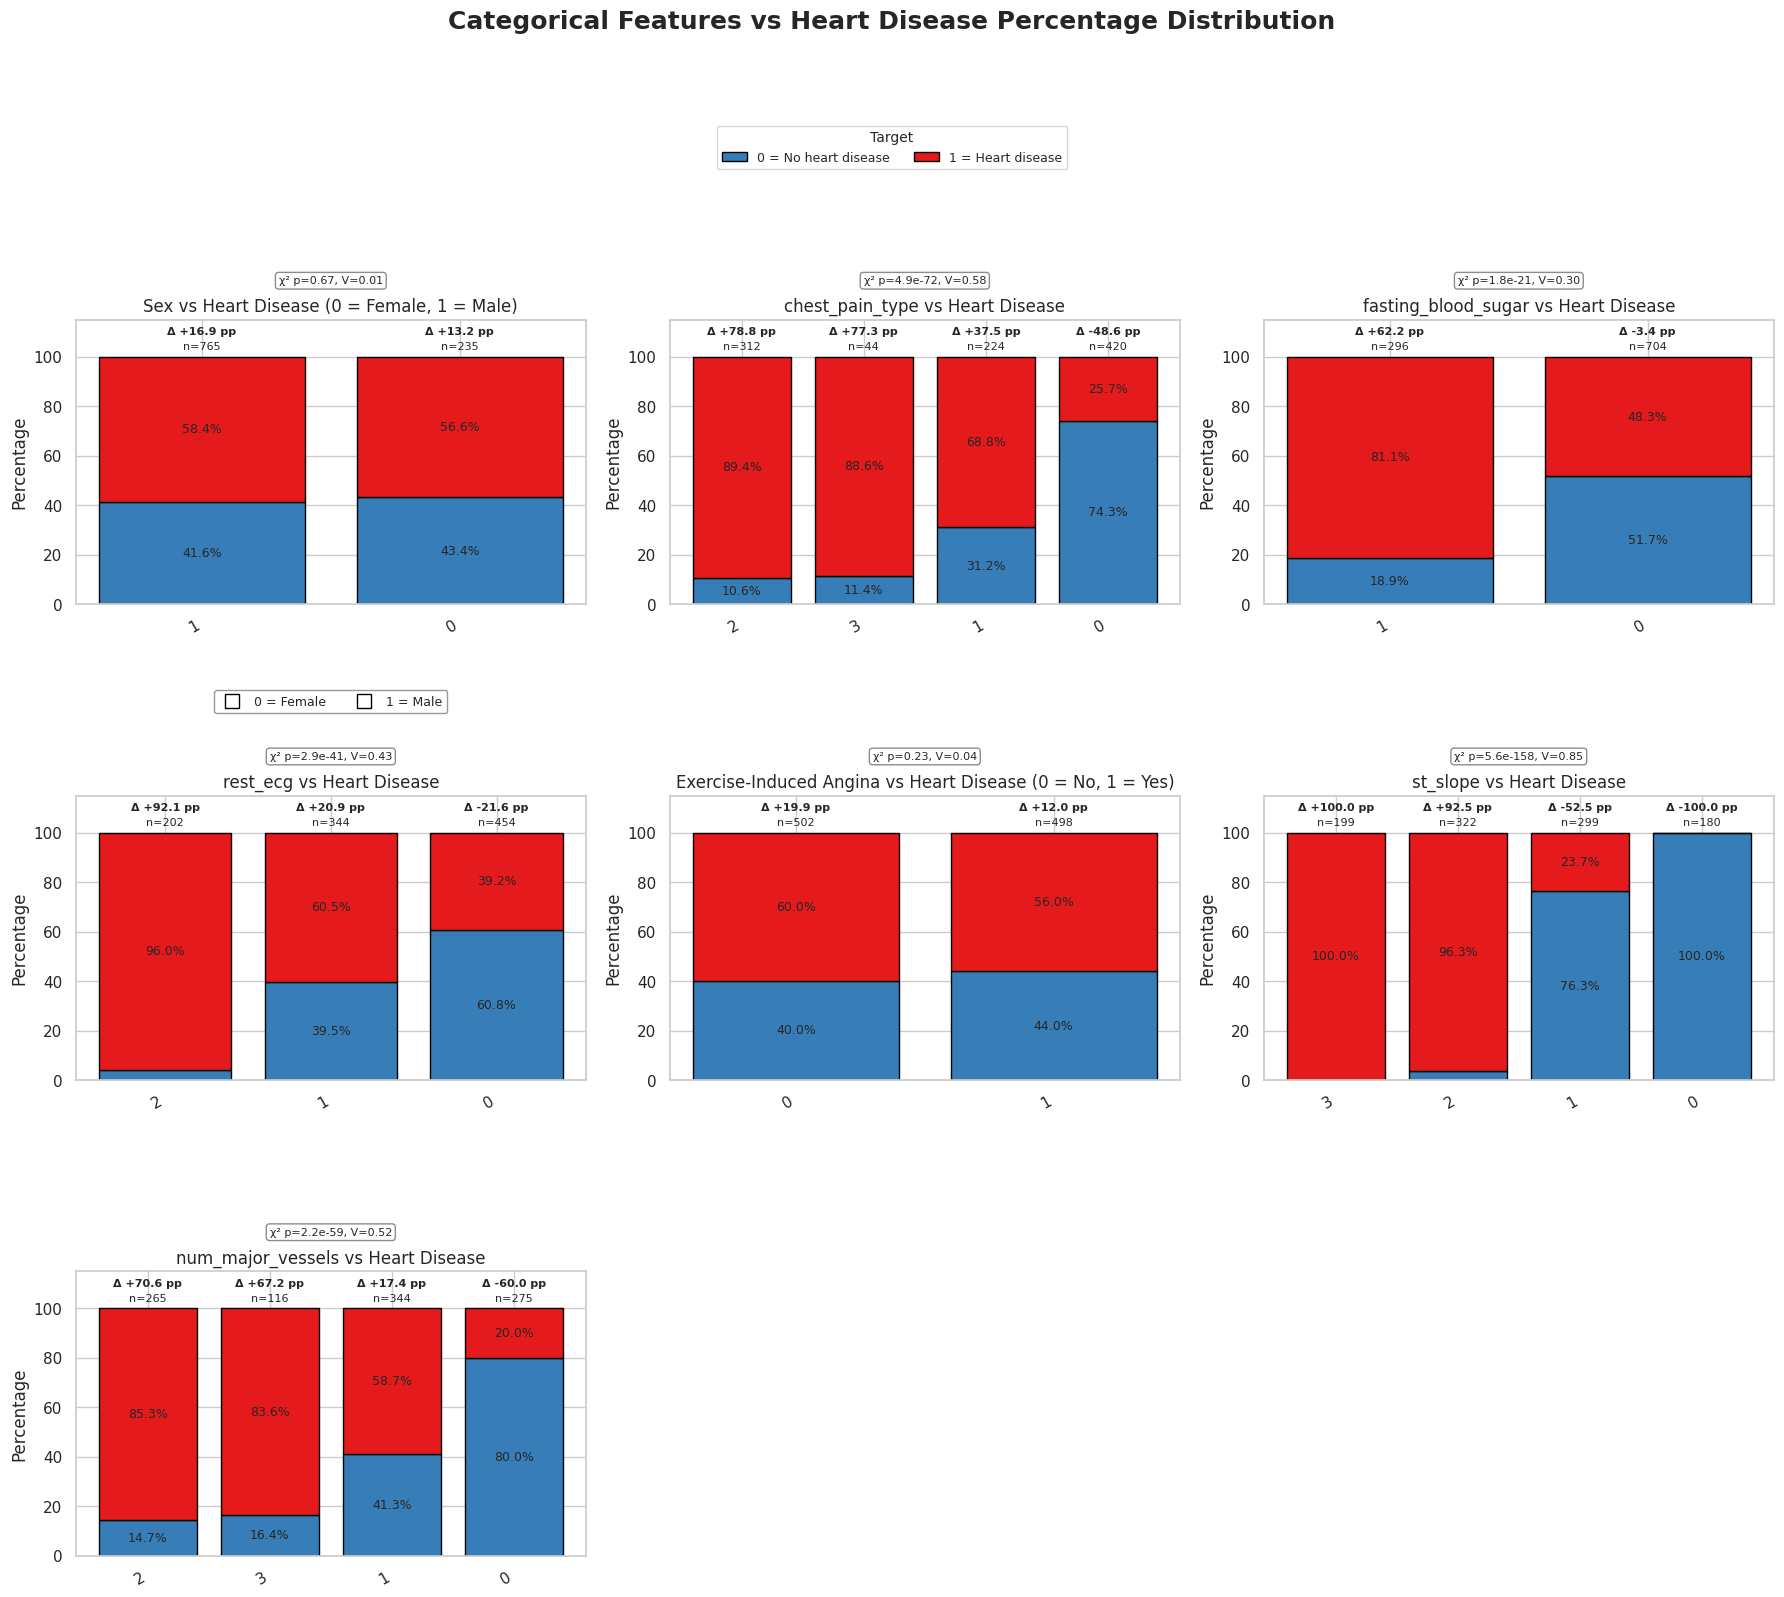

In [ ]:
# 5.3 Categorical Features vs Heart Disease
sns.set(style="whitegrid")  # Use a clean grid style for readability

# Function to compute Cramér's V for association strength between categorical variables
def cramers_v(ct: pd.DataFrame):
    chi2, _, _, _ = chi2_contingency(ct)
    n = ct.values.sum()
    k = min(ct.shape)
    return np.nan if k <= 1 or n == 0 else np.sqrt((chi2 / n) / (k - 1))

# Select categorical columns excluding the target
categorical_cols = [col for col in df.columns if df[col].nunique() <= 10 and col != 'target']

# Create a subplot grid
plt.figure(figsize=(18, 20))
rows, cols = 4, 3
plotnumber = 1

# Set consistent, colourblind-friendly palette for heart disease classes
TARGET_COLORS = {0: "#377eb8", 1: "#e41a1c"}  # Blue = No, Red = Yes

for column in categorical_cols:
    ax = plt.subplot(rows, cols, plotnumber)  # Setup subplot axes

    # Generate crosstab and calculate row-wise percentages
    ct = pd.crosstab(df[column].astype(str), df['target']).reindex(columns=[0, 1], fill_value=0)
    prop = (ct.div(ct.sum(axis=1), axis=0) * 100).fillna(0)

    # Sort by heart disease % for better comparison
    prop = prop.sort_values(1, ascending=False)
    ct = ct.loc[prop.index]

    # Run chi-square test and calculate effect size
    p_val = chi2_contingency(ct)[1]
    v = cramers_v(ct)

    # Draw stacked bars (100% stacked bar chart)
    x = np.arange(len(prop))
    w = 0.8
    ax.bar(x, prop[0], width=w, color=TARGET_COLORS[0], edgecolor='black')
    ax.bar(x, prop[1], bottom=prop[0], width=w, color=TARGET_COLORS[1], edgecolor='black')

    # Annotate percentage labels inside each bar
    for i, (p0, p1) in enumerate(zip(prop[0], prop[1])):
        if p0 >= 6: ax.text(i, p0/2, f"{p0:.1f}%", ha='center', va='center', fontsize=9)
        if p1 >= 6: ax.text(i, p0 + p1/2, f"{p1:.1f}%", ha='center', va='center', fontsize=9)

    # Show sample size above each category
    for i, total in enumerate(ct.sum(axis=1)):
        ax.text(i, 102, f"n={total}", ha='center', va='bottom', fontsize=8)

    # Display difference in proportion between target classes
    delta_pp = prop[1] - prop[0]
    for i, d in enumerate(delta_pp):
        ax.text(i, 108, f"Δ {d:+.1f} pp", ha='center', va='bottom', fontsize=8, fontweight='bold')

    # Annotate statistical test results
    ax.text(0.5, 1.12, f"χ² p={p_val:.2g}, V={v:.2f}",
            transform=ax.transAxes, ha='center', va='bottom',
            fontsize=8,
            bbox=dict(boxstyle='round,pad=0.3', facecolor='white', edgecolor='gray', alpha=0.9))

    # Set axis formatting and label angles
    ax.set_xticks(x)
    ax.set_xticklabels(prop.index, rotation=30, ha='right')
    ax.set_ylim(0, 115)
    ax.set_ylabel('Percentage')

    # Apply descriptive titles per variable
    if column == 'sex':
        ax.set_title("Sex vs Heart Disease (0 = Female, 1 = Male)")
        # Add legend explaining encoding for Sex (0 = Female, 1 = Male)
        sex_handles = [
            Line2D([0], [0], color='white', marker='s', markersize=10,
                   markerfacecolor='white', markeredgecolor='black', label='0 = Female'),
            Line2D([0], [0], color='white', marker='s', markersize=10,
                   markerfacecolor='white', markeredgecolor='black', label='1 = Male')
        ]
        ax.legend(handles=sex_handles,
                  loc='upper center',
                  bbox_to_anchor=(0.5, -0.28),
                  ncol=2,
                  fontsize=9,
                  frameon=True, facecolor='white', edgecolor='gray')
    elif column == 'exercise_induced_angina':
        ax.set_title("Exercise-Induced Angina vs Heart Disease (0 = No, 1 = Yes)")
    else:
        ax.set_title(f"{column} vs Heart Disease")

    plotnumber += 1  # Move to next subplot

# - Overall Title
plt.suptitle("Categorical Features vs Heart Disease Percentage Distribution",
             fontsize=18, fontweight='bold', y=1.02)

# Add legend under the title for Target variable
target_handles = [
    Patch(facecolor=TARGET_COLORS[0], edgecolor='black', label='0 = No heart disease'),
    Patch(facecolor=TARGET_COLORS[1], edgecolor='black', label='1 = Heart disease')
]

# Place figure-level legend directly below title (centred)
plt.gcf().legend(handles=target_handles, title="Target",
                 fontsize=9, title_fontsize=10,
                 loc='upper center', bbox_to_anchor=(0.5, 0.965),
                 ncol=2, frameon=True)

# Adjust layout to make space for title and legend
plt.tight_layout(rect=[0, 0, 1, 0.92])
plt.show()

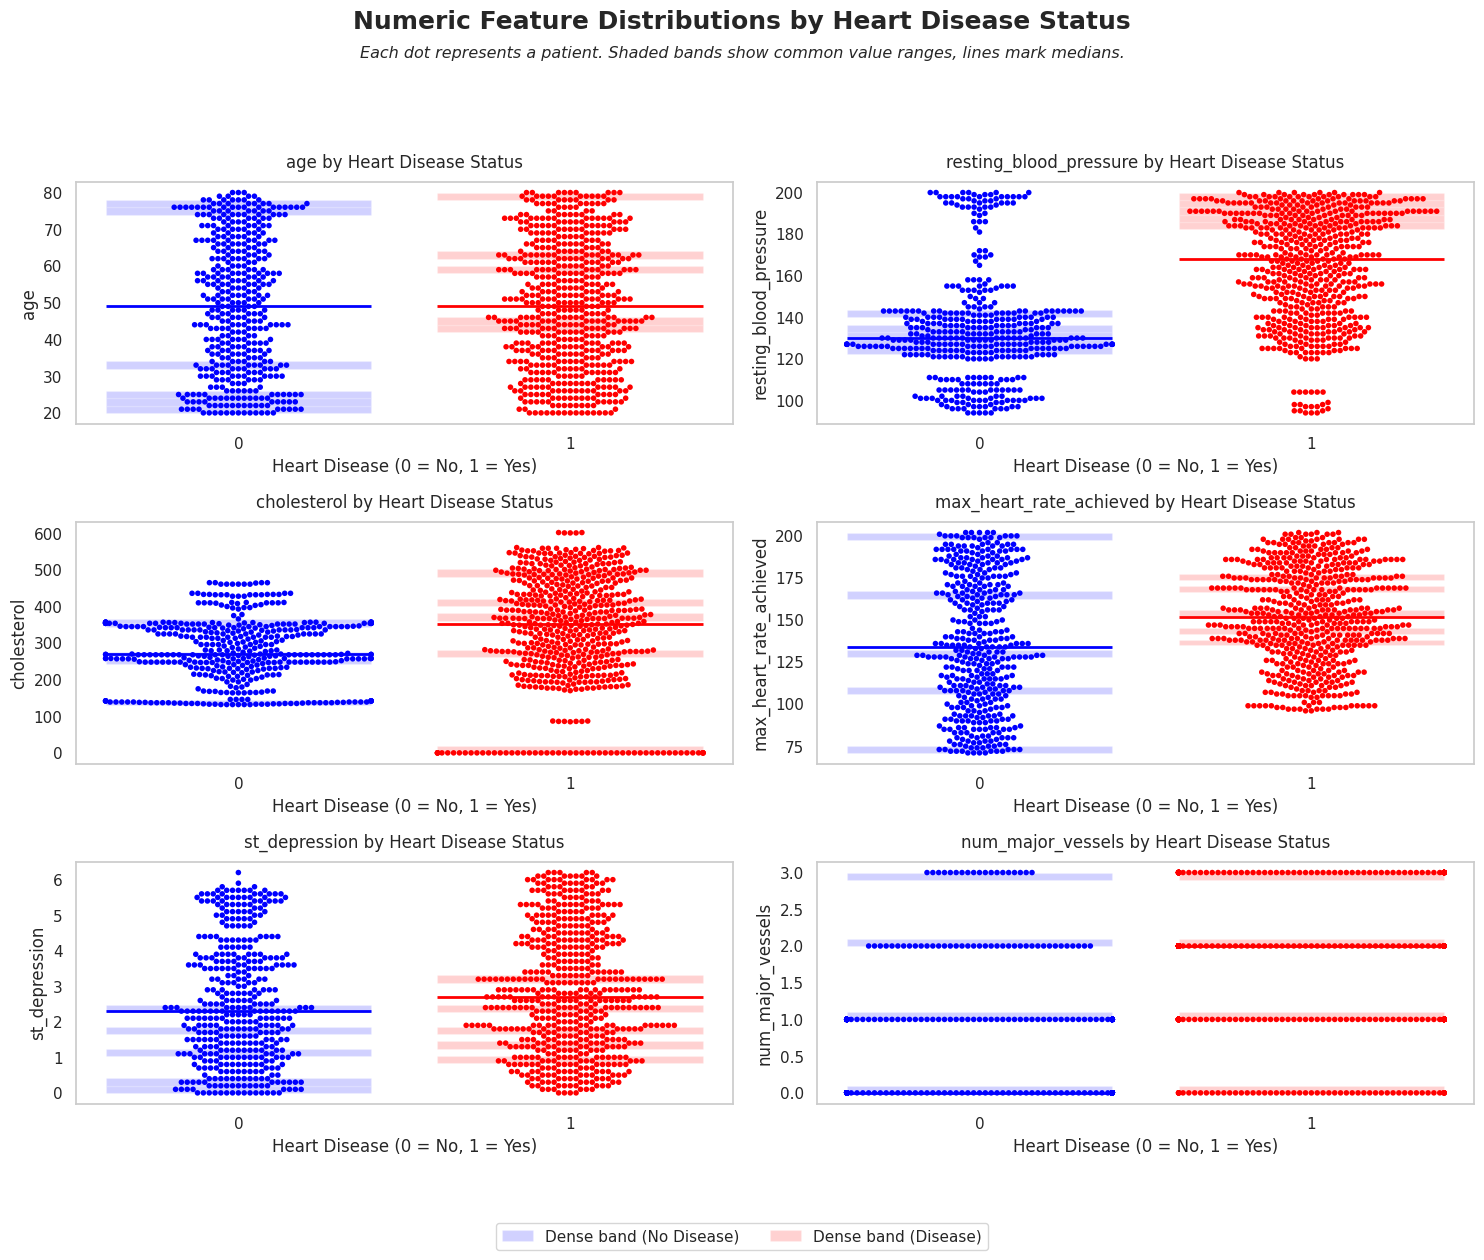

In [ ]:
# 5.4 Visualise numeric features by heart disease status

# Set overall style for consistent and clean plots
sns.set(style="whitegrid", context="notebook")

# Colour mapping: 0 = No disease (blue), 1 = Disease (red)
POINT_COLORS = {0: "blue", 1: "red"}    # For points
BAND_COLORS  = {0: "blue", 1: "red"}    # For shaded density regions

# Plot controls
BINS, TOP_Q, BAR_WIDTH, DOT_SIZE = 30, 0.85, 0.8, 4

# Select numeric features
num_cols = [
    'age', 'resting_blood_pressure', 'cholesterol',
    'max_heart_rate_achieved', 'st_depression', 'num_major_vessels'
]

# Confirm required columns are available
assert 'target' in df.columns
for c in num_cols: assert c in df.columns

# Create a 3x2 grid of subplots
fig, axes = plt.subplots(3, 2, figsize=(15, 12))
axes = axes.flatten()

# Loop through numeric features
for i, col in enumerate(num_cols):
    ax = axes[i]

    # Swarmplot: each dot is a patient, grouped by disease status
    sns.swarmplot(
        data=df, x='target', y=col,
        order=[0, 1],
        palette=[POINT_COLORS[0], POINT_COLORS[1]],
        size=DOT_SIZE, ax=ax
    )

    # Add density shading and medians for each class
    for cls in [0, 1]:
        vals = df.loc[df['target'] == cls, col].dropna().values
        if len(vals) < 3: continue
        hist, edges = np.histogram(vals, bins=BINS)
        thr = np.quantile(hist, TOP_Q) if hist.sum() > 0 else 0
        x_left = cls - BAR_WIDTH / 2.0
        for h, y0, y1 in zip(hist, edges[:-1], edges[1:]):
            if h >= max(thr, 1):
                ax.add_patch(patches.Rectangle((x_left, y0), BAR_WIDTH, (y1 - y0),
                                               facecolor=BAND_COLORS[cls], alpha=0.18))
        med = np.median(vals)
        ax.hlines(med, x_left, x_left + BAR_WIDTH, colors=POINT_COLORS[cls], linewidth=2)

    # Axis labels and title
    ax.set_title(f'{col} by Heart Disease Status', pad=10)
    ax.set_xlabel('Heart Disease (0 = No, 1 = Yes)')
    ax.set_ylabel(col)
    ax.grid(False)

# Add a main title
plt.suptitle("Numeric Feature Distributions by Heart Disease Status", fontsize=18, fontweight='bold', y=1.02)

# Add a caption beneath the title
fig.text(0.5, 0.98,
         "Each dot represents a patient. Shaded bands show common value ranges, lines mark medians.",
         ha='center', fontsize=11.5, style='italic')

# Add legend for shaded density bands
legend_handles = [
    patches.Patch(facecolor=BAND_COLORS[0], alpha=0.18, label='Dense band (No Disease)'),
    patches.Patch(facecolor=BAND_COLORS[1], alpha=0.18, label='Dense band (Disease)')
]
fig.legend(handles=legend_handles, loc='lower center',
           bbox_to_anchor=(0.5, -0.02), frameon=True, ncol=2)

# Adjust layout and display
plt.tight_layout(rect=[0, 0.05, 1, 0.95])
plt.show()


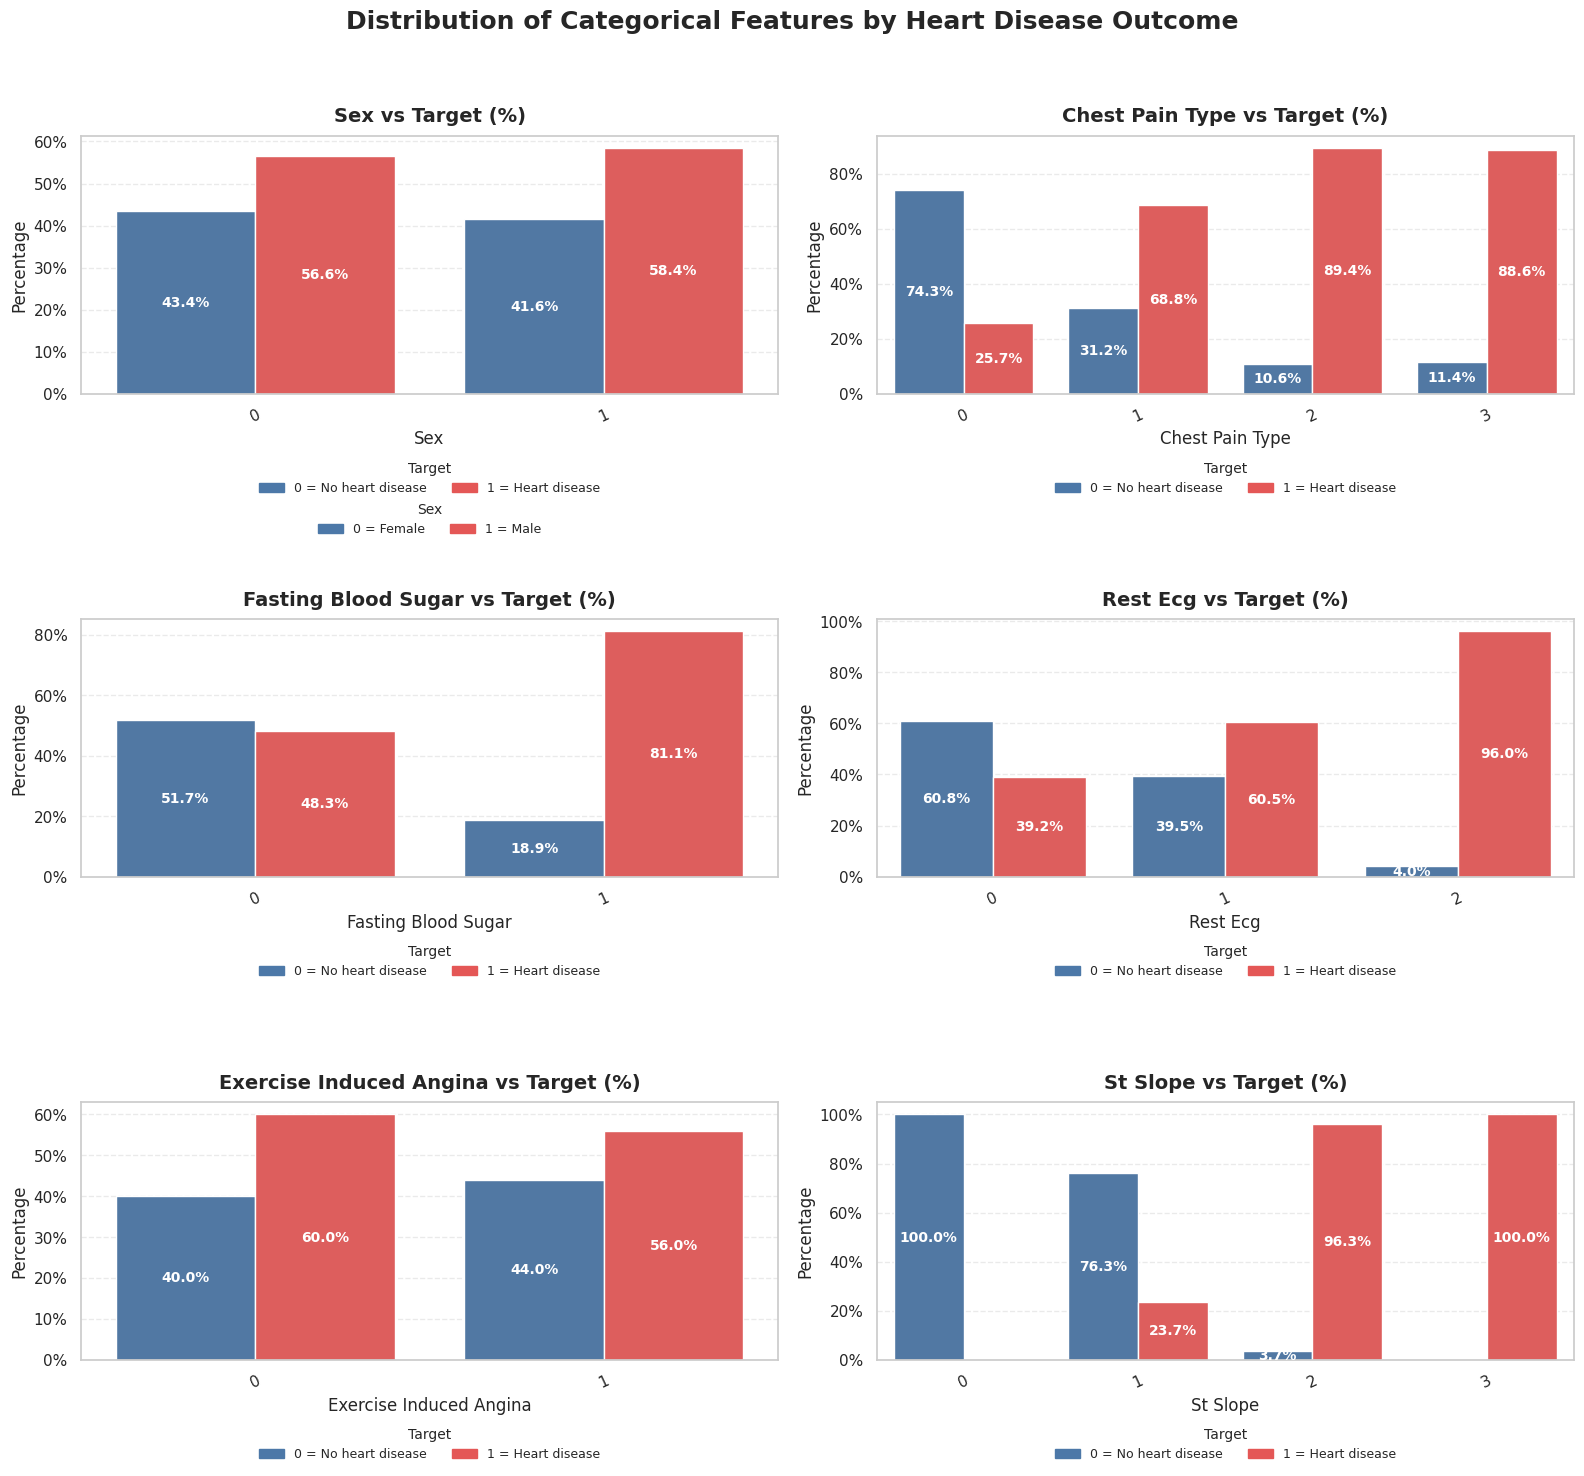

In [ ]:
# 5.5 Visualise categorical features against heart disease status

# Define colours: 0 = No disease (blue), 1 = Disease (red)
COLOR_MAP = {0: "#4C78A8", 1: "#E45756"}

# Pick categorical features to explore
categorical_cols = [
    'sex',
    'chest_pain_type',
    'fasting_blood_sugar',
    'rest_ecg',
    'exercise_induced_angina',
    'st_slope'
]

# Set up 3x2 subplot grid
plt.figure(figsize=(16, 15))

for i, col in enumerate(categorical_cols, 1):
    ax = plt.subplot(3, 2, i)

    # Calculate percentage of heart disease cases within each category
    ratio_df = (
        df.groupby([col, 'target'])
        .size()
        .reset_index(name='count')
    )
    total_per_cat = ratio_df.groupby(col)['count'].transform('sum')
    ratio_df['percent'] = (ratio_df['count'] / total_per_cat * 100).round(1)

    # Bar plot showing category percentages by target group
    plot = sns.barplot(
        data=ratio_df,
        x=col, y='percent', hue='target',
        hue_order=[0, 1],
        palette=COLOR_MAP,
        ax=ax,
        saturation=0.9
    )

    # Add light y-axis gridlines
    ax.grid(axis='y', linestyle='--', alpha=0.4)
    ax.set_axisbelow(True)

    # Format subplot titles, labels, and ticks
    ax.set_title(f'{col.replace("_", " ").title()} vs Target (%)',
                 fontsize=14, pad=10, fontweight="bold")
    ax.set_ylabel('Percentage', fontsize=12)
    ax.set_xlabel(col.replace("_", " ").title(), fontsize=12)
    ax.tick_params(axis='x', labelsize=11, rotation=25)
    ax.tick_params(axis='y', labelsize=11)
    ax.yaxis.set_major_formatter(PercentFormatter(100))

    # Add percentage labels inside bars
    for container in plot.containers:
        plot.bar_label(
            container,
            labels=[f'{v.get_height():.1f}%' for v in container],
            label_type='center',
            fontsize=10,
            fontweight='bold',
            color="white"
        )

    # Remove default legend
    if ax.get_legend():
        ax.get_legend().remove()

    # Custom legend for target labels
    target_patches = [
        mpatches.Patch(color=COLOR_MAP[0], label="0 = No heart disease"),
        mpatches.Patch(color=COLOR_MAP[1], label="1 = Heart disease")
    ]
    leg1 = ax.legend(
        handles=target_patches,
        title="Target",
        fontsize=9,
        title_fontsize=10,
        loc="upper center",
        bbox_to_anchor=(0.5, -0.22),
        ncol=2,
        frameon=False
    )

    # Extra legend for 'sex' codes only
    if col == 'sex':
        sex_patches = [
            mpatches.Patch(color=COLOR_MAP[0], label="0 = Female"),
            mpatches.Patch(color=COLOR_MAP[1], label="1 = Male")
        ]
        ax.legend(
            handles=sex_patches,
            title="Sex",
            fontsize=9,
            title_fontsize=10,
            loc="upper center",
            bbox_to_anchor=(0.5, -0.38),
            ncol=2,
            frameon=False
        )
        ax.add_artist(leg1)

# Main figure title
plt.suptitle("Distribution of Categorical Features by Heart Disease Outcome",
             fontsize=18, fontweight='bold', y=0.995)

# Adjust spacing and show
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()


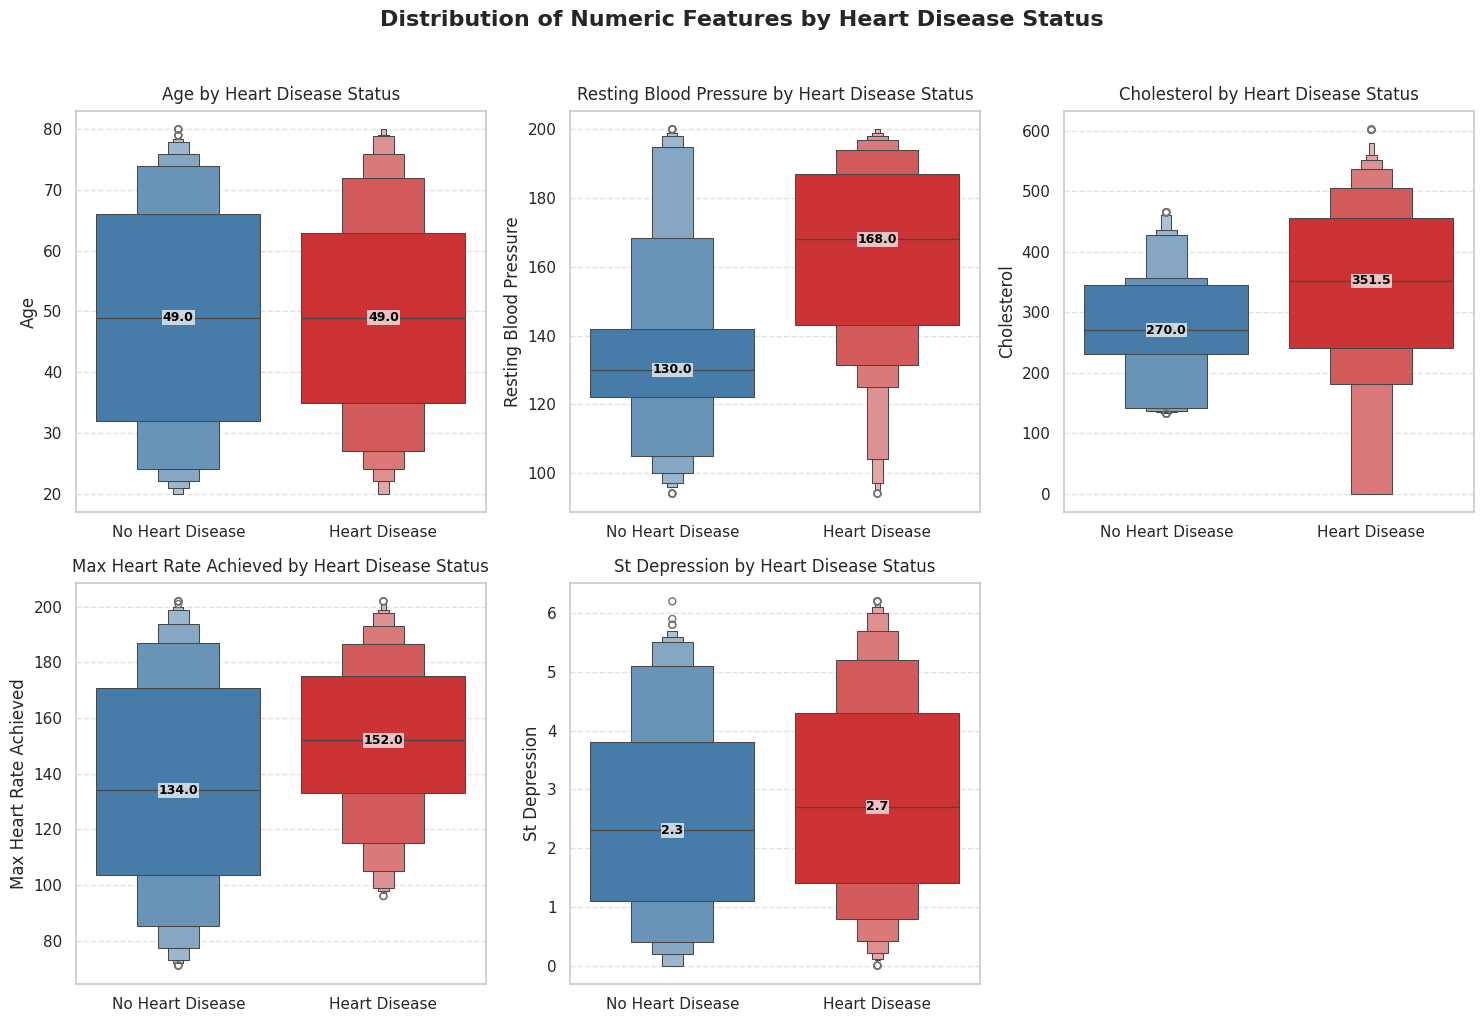

In [ ]:
# 5.6 Boxenplots of numeric features by heart disease status

num_features = ['age','resting_blood_pressure','cholesterol','max_heart_rate_achieved','st_depression']

# Colours: blue = no heart disease, red = heart disease
COLOR_MAP = {0: "#377eb8", 1: "#e41a1c"}

plt.figure(figsize=(15,10))
for i, col in enumerate(num_features, 1):
    ax = plt.subplot(2, 3, i)

    # Create readable labels for target variable
    df_plot = df.copy()
    df_plot['Heart Disease Status'] = df_plot['target'].map({0: "No Heart Disease", 1: "Heart Disease"})

    # Draw boxenplot to show distribution and outliers
    sns.boxenplot(
        data=df_plot, x='Heart Disease Status', y=col,
        order=["No Heart Disease", "Heart Disease"],
        palette=[COLOR_MAP[0], COLOR_MAP[1]],
        ax=ax
    )

    # Add median value annotations
    medians = df_plot.groupby('Heart Disease Status')[col].median()
    for xtick, label in enumerate(["No Heart Disease", "Heart Disease"]):
        median_val = medians[label]
        ax.text(
            xtick, median_val, f'{median_val:.1f}',
            ha='center', va='center', fontsize=9, color='black', fontweight='bold',
            bbox=dict(facecolor='white', edgecolor='none', pad=0.5, alpha=0.7)
        )

    # Titles and axis formatting
    ax.set_title(f'{col.replace("_"," ").title()} by Heart Disease Status', fontsize=12, pad=8)
    ax.set_xlabel("")  # cleaner x-axis
    ax.set_ylabel(col.replace("_"," ").title())
    ax.grid(axis='y', linestyle='--', alpha=0.6)

# Add overall title
plt.suptitle("Distribution of Numeric Features by Heart Disease Status",
             fontsize=16, fontweight='bold', y=1.02)

plt.tight_layout()
plt.show()


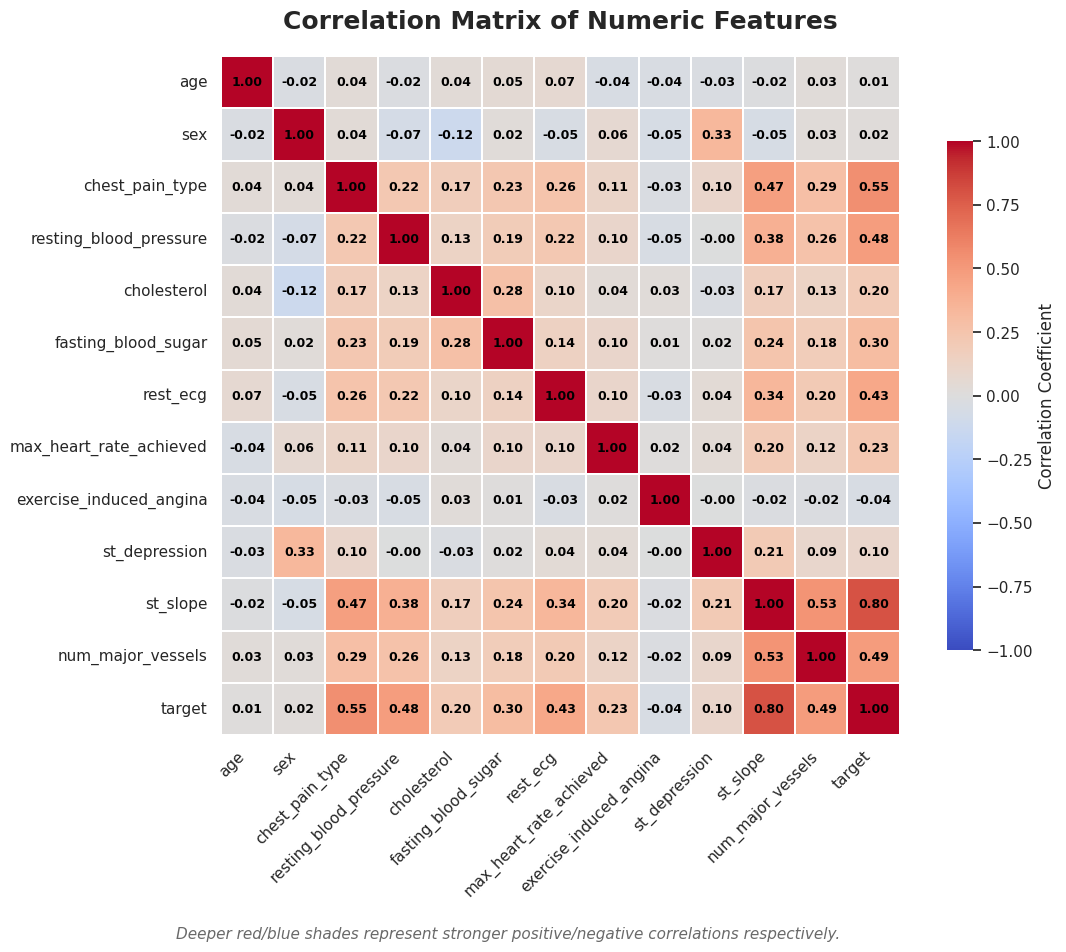

In [ ]:
# 5.7 Correlation analysis of numeric features

# Select only numeric columns
numeric_df = df.select_dtypes(include=['number'])

# Compute correlation matrix
corr = numeric_df.corr()

# Plot heatmap of correlations
fig, ax = plt.subplots(figsize=(12, 10))
sns.heatmap(
    corr,
    annot=True, fmt=".2f",
    annot_kws={"size": 9, "fontweight": "bold", "color": "black"},
    cmap="coolwarm",           # Red = positive correlation, Blue = negative
    vmin=-1, vmax=1, square=True,
    cbar_kws={
        "shrink": 0.75,
        "label": "Correlation Coefficient",
        "orientation": "vertical"
    },
    ax=ax,
    linewidths=0.3, linecolor="white"
)

# Add title
plt.title("Correlation Matrix of Numeric Features",
          fontsize=18, fontweight="bold", pad=20)

# Add a short caption beneath the heatmap
fig.text(
    0.5, 0.02,
    "Deeper red/blue shades represent stronger positive/negative correlations respectively.",
    ha="center", va="center", fontsize=11, style="italic", color="dimgray"
)

# Format axis labels
plt.xticks(rotation=45, ha="right", fontsize=11, fontweight="medium")
plt.yticks(rotation=0, fontsize=11, fontweight="medium")

# Adjust layout and display
plt.tight_layout(rect=[0, 0.05, 1, 0.95])
plt.show()


# **6.Splitting The Dataset**

In [ ]:
# 6.1 Separate features and target
X = df.drop('target', axis=1)
y = df['target']
X.head()



age  sex  chest_pain_type  resting_blood_pressure  cholesterol  \
0   53    1                2                     171            0   
1   40    1                0                      94          229   
2   49    1                2                     133          142   
3   43    1                0                     138          295   
4   31    1                1                     199            0   

   fasting_blood_sugar  rest_ecg  max_heart_rate_achieved  \
0                    0         1                      147   
1                    0         1                      115   
2                    0         0                      202   
3                    1         1                      153   
4                    0         2                      136   

   exercise_induced_angina  st_depression  st_slope  num_major_vessels  
0                        0            5.3         3                  3  
1                        0            3.7         1                  1  
2                        1            5.0         1                  0  
3                        0            3.2         2                  2  
4                        0            5.3         3                  2

In [ ]:
# 6.2 Split data into training and testing sets (80/20 split) and 'stratify=y' ensures class balance is maintained

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# 6.3 Print dataset shapes to confirm
print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)



Training set shape: (800, 12)
Test set shape: (200, 12)


In [ ]:
# 6.3 Scale numeric features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)

# 6.4 Convert back to DataFrames
X_train_final = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
X_test_final  = pd.DataFrame(X_test_scaled,  columns=X_test.columns,  index=X_test.index)

# 6.5 Confirm dimensions
print("Training set shape:", X_train_final.shape)
print("Test set shape:", X_test_final.shape)


Training set shape: (800, 12)
Test set shape: (200, 12)


# **7.Model Selection and Baseline Training**

## **Model-1. Logistic Regression**

*Logistic regression is a supervised machine learning algorithm used for binary classification, where the goal is to predict the probability that an instance belongs to a particular class. It models the relationship between input features and a binary outcome using the sigmoid function, which maps the output to a value between 0 and 1.*

*For example, if the predicted probability is greater than 0.5, the instance is classified as Class 1; otherwise, it's classified as Class 0. Although named "regression," logistic regression is primarily used for classification tasks and is considered an extension of linear regression adapted for categorical outcomes. -source G3 School*

In [ ]:
# 7.1 Train a baseline Logistic Regression model with strong regularisation (before tuning)

logreg = LogisticRegression(C=0.001, solver='liblinear', random_state=42, max_iter=1000)
logreg.fit(X_train_scaled, y_train)

# Predict on test data
y_pred_lr = logreg.predict(X_test_scaled)

# Evaluate baseline model performance
print("Evaluation Before Tuning:")
print(classification_report(y_test, y_pred_lr))
print("Accuracy", accuracy_score(y_test, y_pred_lr))


Evaluation Before Tuning:
              precision    recall  f1-score   support

           0       0.91      0.94      0.92        84
           1       0.96      0.93      0.94       116

    accuracy                           0.94       200
   macro avg       0.93      0.94      0.93       200
weighted avg       0.94      0.94      0.94       200

Accuracy 0.935


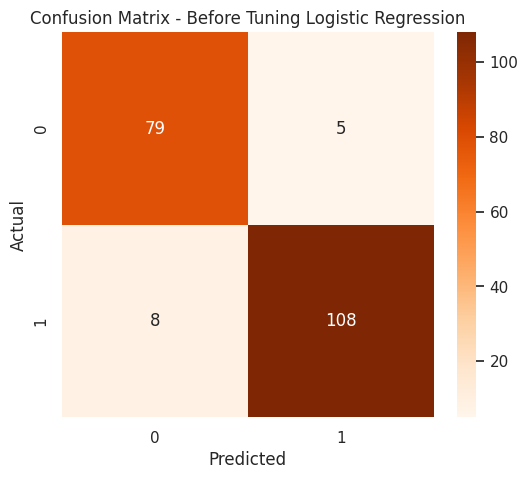

In [ ]:
# 7.2 Plot the confusion matrix for Logistic Regression before tuning

cm = confusion_matrix(y_test, y_pred_lr)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges')
plt.title("Confusion Matrix - Before Tuning Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


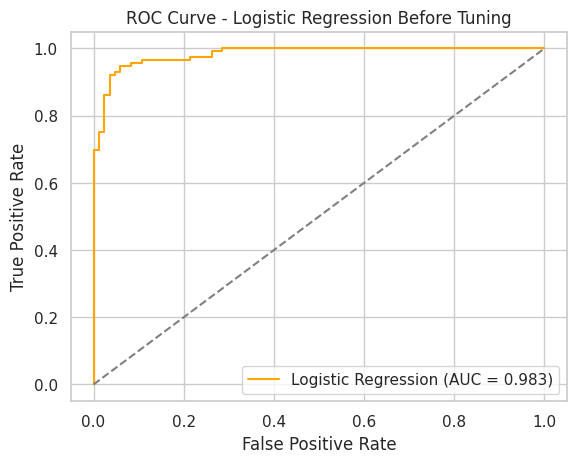

In [ ]:
# 7.3 Plot ROC curve for Logistic Regression before tuning

# Get predicted probabilities
y_proba = logreg.predict_proba(X_test_scaled)[:, 1]

# Compute ROC curve and AUC score
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_proba)
roc_auc_lr = auc(fpr_lr, tpr_lr)

# Plot ROC curve
plt.figure()
plt.plot(fpr_lr, tpr_lr, label='Logistic Regression (AUC = %.3f)' % roc_auc_lr, color='orange')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.title('ROC Curve - Logistic Regression Before Tuning')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


In [ ]:
# 7.4 Hyperparameter tuning with 5-fold cross-validation (performed once during tuning)

# Define grid of parameters to search
param_grid = {
    'C': [0.0001,0.001, 0.01, 0.1,1, 10,100],   # Regularisation strength
    'penalty': ['l2'],                          # Regularisation type
    'solver': ['liblinear', 'lbfgs']            # Optimisers
}

# Run grid search with Logistic Regression
grid = GridSearchCV(estimator=LogisticRegression(max_iter=1000, random_state=42),
    param_grid=param_grid, cv=5, scoring='accuracy',
    verbose=1, n_jobs=-1)

grid.fit(X_train_scaled, y_train)

# Show best parameters and best CV score
print("Best Parameters:", grid.best_params_)
print("Best CV Score:", format(grid.best_score_, ".4f"))


Fitting 5 folds for each of 14 candidates, totalling 70 fits
Best Parameters: {'C': 1, 'penalty': 'l2', 'solver': 'lbfgs'}
Best CV Score: 0.9612


Evaluation After Hyperparameter Tuning:
Best Parameters: {'C': 1, 'penalty': 'l2', 'solver': 'lbfgs'}
Best CV Score: 0.9612499999999999
              precision    recall  f1-score   support

           0       0.99      0.98      0.98        84
           1       0.98      0.99      0.99       116

    accuracy                           0.98       200
   macro avg       0.99      0.98      0.98       200
weighted avg       0.99      0.98      0.98       200

Accuracy: 0.985


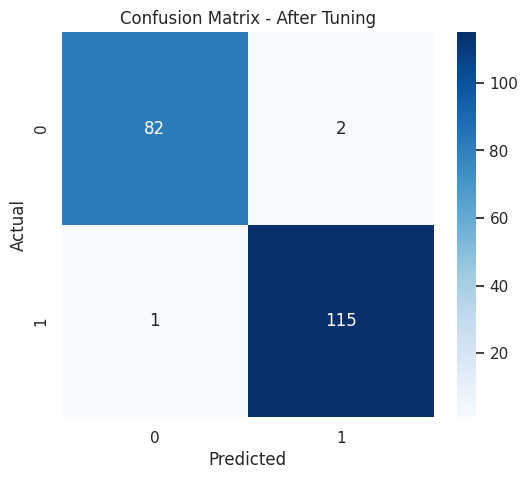

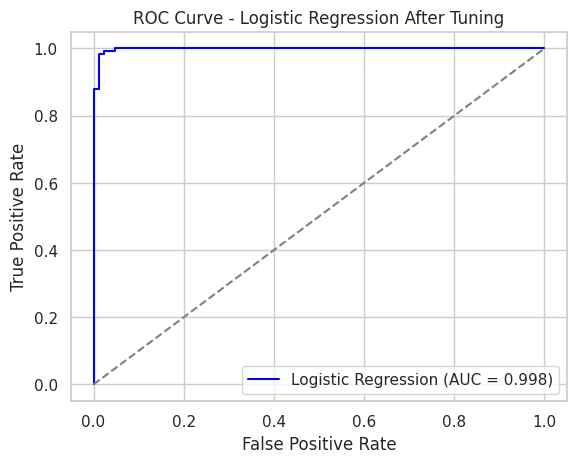

In [ ]:
# 7.5 Final evaluation after hyperparameter tuning

# Use the best Logistic Regression model from GridSearch
best_logreg = grid.best_estimator_

# Make predictions with the tuned model
y_pred_best_lr = best_logreg.predict(X_test_scaled)
y_proba_best = best_logreg.predict_proba(X_test_scaled)[:, 1]

# Show evaluation metrics for tuned model
print("Evaluation After Hyperparameter Tuning:")
print("Best Parameters:", grid.best_params_)
print("Best CV Score:", grid.best_score_)
print(classification_report(y_test, y_pred_best_lr))
print("Accuracy:", accuracy_score(y_test, y_pred_best_lr))

# Confusion matrix after tuning
cm_best = confusion_matrix(y_test, y_pred_best_lr)
plt.figure(figsize=(6, 5))
sns.heatmap(cm_best, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - After Tuning")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Predict probabilities from tuned model
y_proba_lr_best = best_logreg.predict_proba(X_test_scaled)[:, 1]

# Compute ROC curve and AUC
fpr_lr_best, tpr_lr_best, _ = roc_curve(y_test, y_proba_lr_best)
roc_auc_lr_best = auc(fpr_lr_best, tpr_lr_best)

# Plot ROC curve after tuning
plt.figure()
plt.plot(fpr_lr_best, tpr_lr_best, label='Logistic Regression (AUC = %.3f)' % roc_auc_lr_best, color='blue')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.title("ROC Curve - Logistic Regression After Tuning")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid(True)
plt.show()


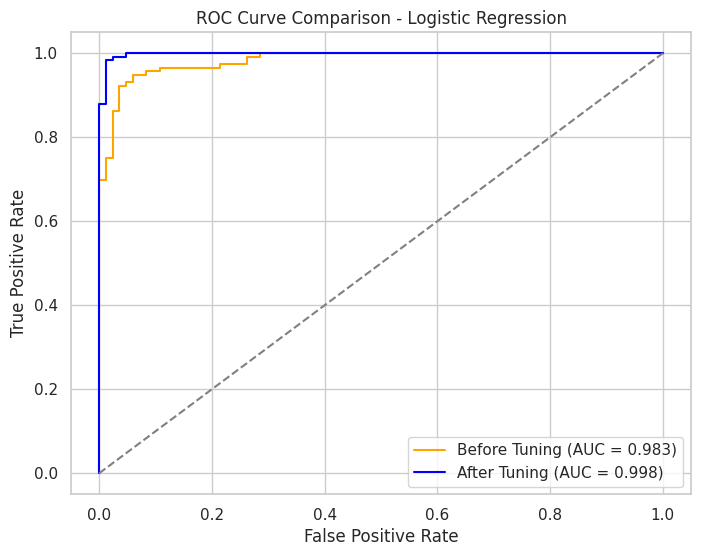

In [ ]:
# 7.6 Compare ROC curves for Logistic Regression (before vs after tuning)
plt.figure(figsize=(8, 6))

# ROC curve before tuning
plt.plot(fpr_lr, tpr_lr, label='Before Tuning (AUC = %.3f)' % roc_auc_lr, color='orange')

# ROC curve after tuning
plt.plot(fpr_lr_best, tpr_lr_best, label='After Tuning (AUC = %.3f)' % roc_auc_lr_best, color='blue')

# Diagonal line for random guess baseline
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')

# Titles, labels, legend, and grid
plt.title("ROC Curve Comparison - Logistic Regression")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


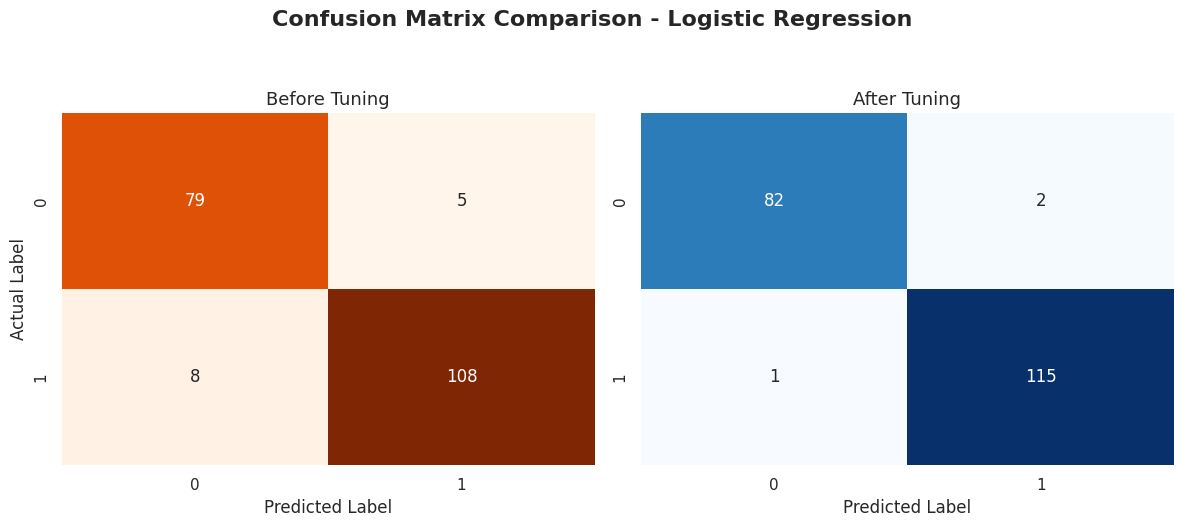

In [ ]:
# 7.7 Compare confusion matrices for Logistic Regression (before vs after tuning)

# Compute confusion matrices
cm_before = confusion_matrix(y_test, y_pred_lr)         # Before tuning
cm_after  = confusion_matrix(y_test, y_pred_best_lr)    # After tuning

# Create side-by-side subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Confusion matrix before tuning
sns.heatmap(cm_before, annot=True, fmt='d', cmap='Oranges', cbar=False, ax=axes[0])
axes[0].set_title("Before Tuning", fontsize=13)
axes[0].set_xlabel("Predicted Label")
axes[0].set_ylabel("Actual Label")

# Confusion matrix after tuning
sns.heatmap(cm_after, annot=True, fmt='d', cmap='Blues', cbar=False, ax=axes[1])
axes[1].set_title("After Tuning", fontsize=13)
axes[1].set_xlabel("Predicted Label")
axes[1].set_ylabel("")

# Shared title and layout adjustments
fig.suptitle("Confusion Matrix Comparison - Logistic Regression", fontsize=16, fontweight='bold', y=1.05)
plt.tight_layout()
plt.show()


                    Feature  Coefficient
10                 st_slope     4.615323
9             st_depression    -1.179924
2           chest_pain_type     0.918947
1                       sex     0.899666
3    resting_blood_pressure     0.866066
6                  rest_ecg     0.783981
7   max_heart_rate_achieved     0.391165
5       fasting_blood_sugar     0.389914
11        num_major_vessels     0.149267
0                       age    -0.107398
4               cholesterol     0.031019
8   exercise_induced_angina    -0.016437


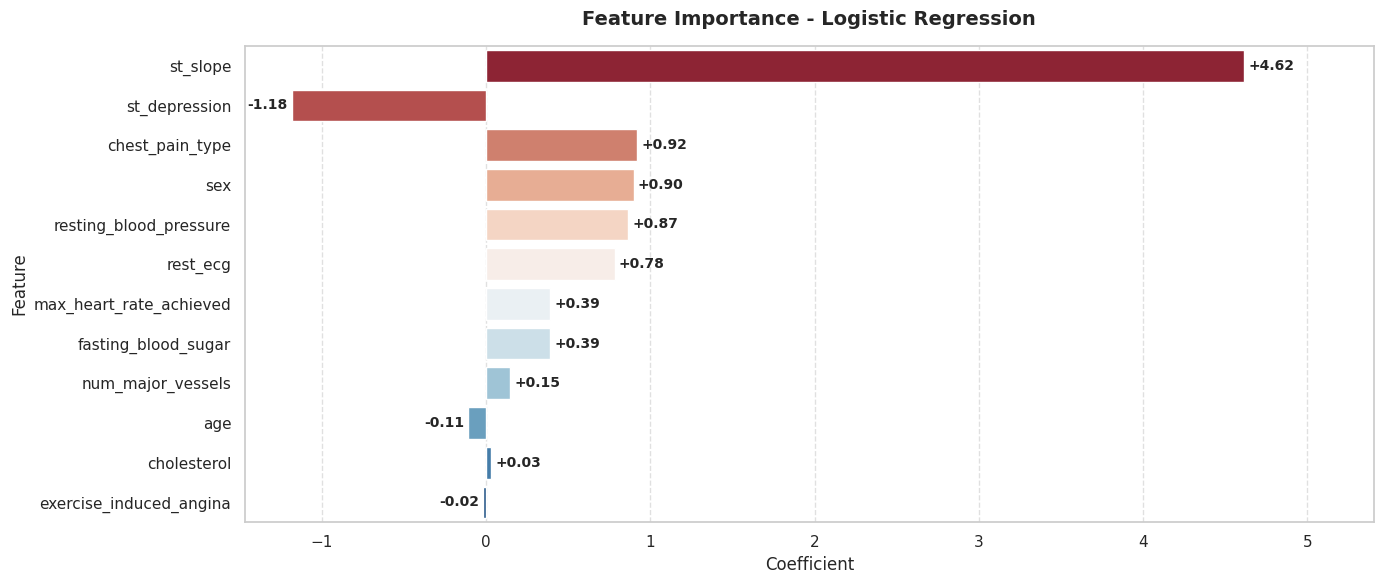

In [ ]:
# 7.8 Plot feature importance using Logistic Regression coefficients

# Get numeric features used during scaling
X_train_num = X_train.select_dtypes(include='number')
feature_names = X_train_num.columns

# Extract coefficients from the tuned Logistic Regression model
coefs = best_logreg.coef_[0]

# Combine feature names with their coefficients
feature_importance = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefs
}).sort_values(by='Coefficient', key=abs, ascending=False)

# Print sorted feature importance
print(feature_importance)

# Plot feature importance
plt.figure(figsize=(14, 6))
ax = sns.barplot(
    data=feature_importance,
    x='Coefficient',
    y='Feature',
    palette='RdBu'
)

# Add coefficient values to each bar
for container in ax.containers:
    ax.bar_label(
        container,
        labels=[f'{v.get_width():+.2f}' for v in container],
        label_type='edge',
        fontsize=10,
        padding=3,
        fontweight='bold'
    )

# Extend x-axis slightly to fit labels
ax.set_xlim(ax.get_xlim()[0], ax.get_xlim()[1] + 0.5)

# Title and grid formatting
plt.title("Feature Importance - Logistic Regression", fontsize=14, fontweight='bold', pad=15)
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


## Feature Insight: What is `st_slope` ?

The `st_slope` feature represents the **slope of the ST segment** observed during peak exercise on an electrocardiogram (ECG). It captures the **direction of the ST segment**, which is a critical clinical marker used to assess **myocardial ischemia** — a condition involving reduced blood flow to the heart muscle.

This feature is typically encoded as:
- `0` = **Upsloping**
- `1` = **Flat**
- `2` = **Downsloping**

An **upsloping ST segment** may appear in healthy or younger individuals and is often considered normal. A **flat ST segment** suggests potential ischemia and requires further evaluation. A **downsloping ST segment** is clinically significant and strongly associated with a high risk of **coronary artery disease**, often indicating more severe cardiac stress or underlying pathology.

---

###  Example:
*A 58-year-old male undergoes a treadmill ECG stress test. During peak exercise, his ST segment shows a **downsloping pattern** (`st_slope = 2`). Combined with other risk factors like high blood pressure and elevated cholesterol, the downsloping ST segment significantly increases the model’s prediction probability for heart disease.*

---

In the context of machine learning models for heart disease prediction, `st_slope` consistently emerges as a **highly predictive feature** due to its strong correlation with cardiac abnormalities revealed during stress testing.


# **Model- 2 K-Nearest Neighbors**

K-Nearest Neighbors (KNN) is a supervised machine learning algorithm generally used for classification but can also be used for regression tasks. It works by finding the "k" closest data points (neighbors) to a given input and makesa predictions based on the majority class (for classification) or the average value (for regression). Since KNN makes no assumptions about the underlying data distribution it makes it a non-parametric and instance-based learning method.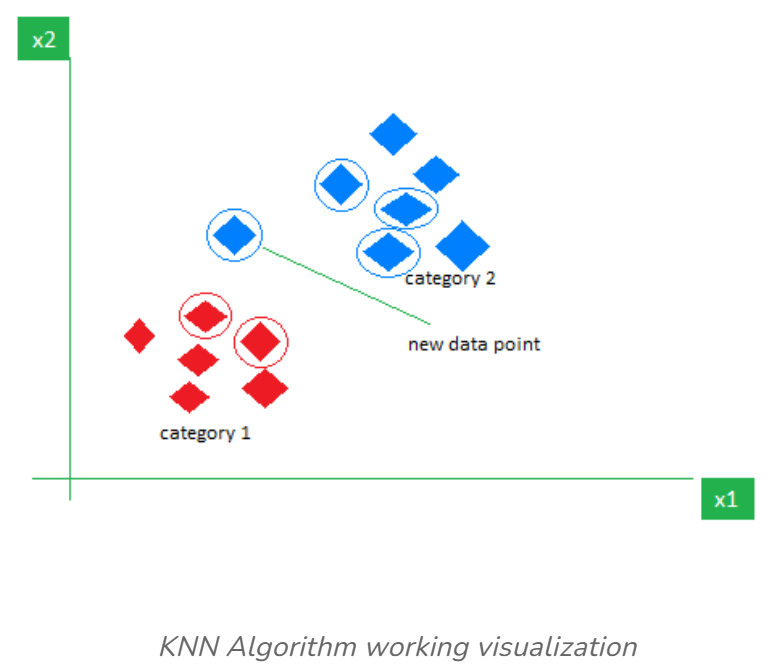

In [ ]:
# 7.1 Train k-NN with default settings (k=5) before tuning

# Create and fit k-NN model (default neighbours = 5)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

# Predict on test data
y_pred_knn = knn.predict(X_test_scaled)

# Evaluate baseline k-NN model
print("Evaluation Before Tuning (k=5):")
print(classification_report(y_test, y_pred_knn, digits=3))
print("Accuracy:", format(accuracy_score(y_test, y_pred_knn), ".3f"))


Evaluation Before Tuning (k=5):
              precision    recall  f1-score   support

           0      0.895     0.917     0.906        84
           1      0.939     0.922     0.930       116

    accuracy                          0.920       200
   macro avg      0.917     0.920     0.918       200
weighted avg      0.920     0.920     0.920       200

Accuracy: 0.920


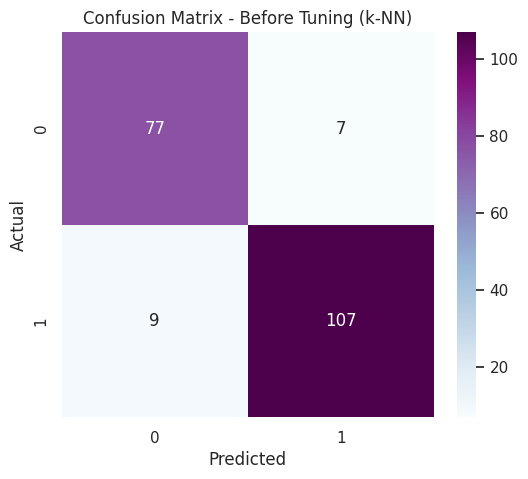

In [ ]:
# 7.2 Plot confusion matrix for k-NN before tuning

# Compute confusion matrix
cm_knn = confusion_matrix(y_test, y_pred_knn)

# Plot heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='BuPu')
plt.title("Confusion Matrix - Before Tuning (k-NN)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


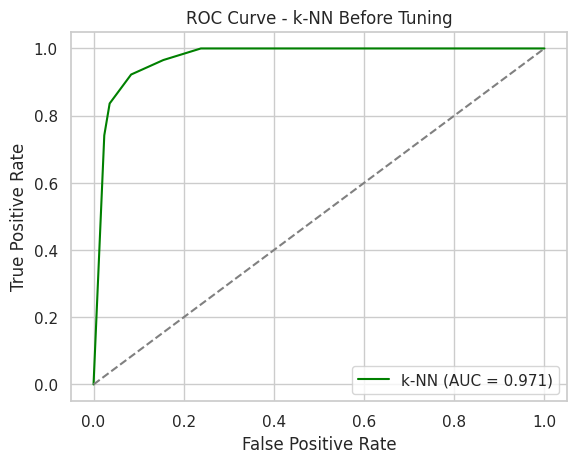

In [ ]:
# 7.3 Plot ROC curve for k-NN before tuning

# Predict probabilities for ROC analysis
y_proba_knn = knn.predict_proba(X_test_scaled)[:, 1]

# Compute ROC curve and AUC score
fpr_knn, tpr_knn, _ = roc_curve(y_test, y_proba_knn)
roc_auc_knn = auc(fpr_knn, tpr_knn)

# Plot ROC curve
plt.figure()
plt.plot(fpr_knn, tpr_knn, label='k-NN (AUC = %.3f)' % roc_auc_knn, color='green')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.title("ROC Curve - k-NN Before Tuning")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


In [ ]:
# 7.4 Hyperparameter tuning for k-NN with 5-fold cross-validation

# Define search grid for k-NN
param_grid_knn = {
    'n_neighbors': list(range(2, 15)),      # Number of neighbours to test
    'weights': ['uniform', 'distance'],     # Voting strategy
    'metric': ['euclidean', 'manhattan']    # Distance metrics
}

# Set up GridSearchCV
grid_knn = GridSearchCV(
    estimator=KNeighborsClassifier(),
    param_grid=param_grid_knn,
    cv=5,
    scoring='accuracy',
    verbose=1,
    n_jobs=-1
)

# Fit on training data
grid_knn.fit(X_train_scaled, y_train)

# Show best hyperparameters and CV score
print("Best Parameters (k-NN):", grid_knn.best_params_)
print("Best CV Score (k-NN):", format(grid_knn.best_score_, ".4f"))


Fitting 5 folds for each of 52 candidates, totalling 260 fits
Best Parameters (k-NN): {'metric': 'manhattan', 'n_neighbors': 9, 'weights': 'distance'}
Best CV Score (k-NN): 0.9637


Evaluation After Hyperparameter Tuning (k-NN):
Best Parameters: {'metric': 'manhattan', 'n_neighbors': 9, 'weights': 'distance'}
Best CV Score: 0.9637
              precision    recall  f1-score   support

           0      0.930     0.952     0.941        84
           1      0.965     0.948     0.957       116

    accuracy                          0.950       200
   macro avg      0.948     0.950     0.949       200
weighted avg      0.950     0.950     0.950       200

Accuracy: 0.950


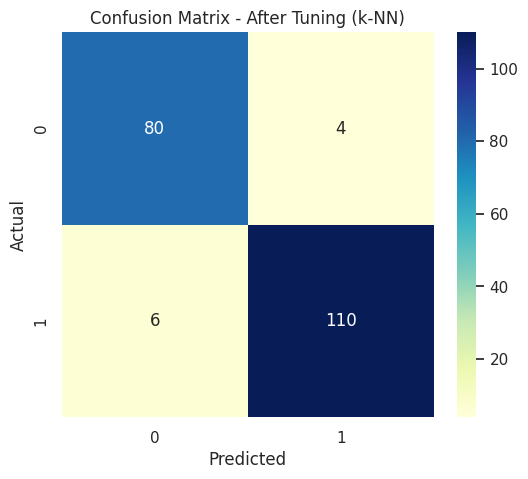

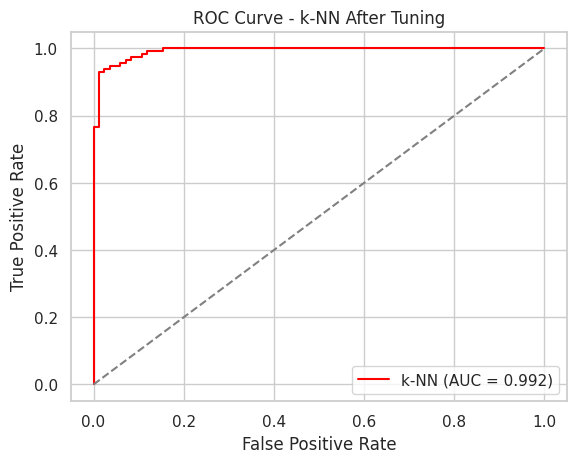

In [ ]:
# 7.5 Final evaluation of k-NN after hyperparameter tuning

# Best k-NN model from GridSearchCV
best_knn = grid_knn.best_estimator_

# Predict on test set
y_pred_knn_best = best_knn.predict(X_test_scaled)
y_proba_knn_best = best_knn.predict_proba(X_test_scaled)[:, 1]

# Show evaluation metrics
print("Evaluation After Hyperparameter Tuning (k-NN):")
print("Best Parameters:", grid_knn.best_params_)
print("Best CV Score:", format(grid_knn.best_score_, ".4f"))
print(classification_report(y_test, y_pred_knn_best, digits=3))
print("Accuracy:", format(accuracy_score(y_test, y_pred_knn_best), ".3f"))

# Confusion matrix after tuning
cm_knn_best = confusion_matrix(y_test, y_pred_knn_best)
plt.figure(figsize=(6, 5))
sns.heatmap(cm_knn_best, annot=True, fmt='d', cmap='YlGnBu')
plt.title("Confusion Matrix - After Tuning (k-NN)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# ROC curve after tuning
fpr_knn_best, tpr_knn_best, _ = roc_curve(y_test, y_proba_knn_best)
roc_auc_knn_best = auc(fpr_knn_best, tpr_knn_best)

plt.figure()
plt.plot(fpr_knn_best, tpr_knn_best, label='k-NN (AUC = %.3f)' % roc_auc_knn_best, color='red')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.title("ROC Curve - k-NN After Tuning")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


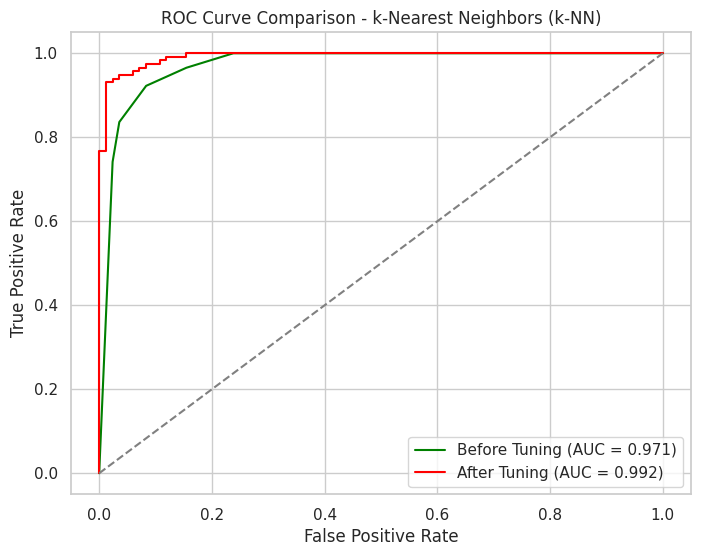

In [ ]:
# 7.6 Compare ROC curves for k-NN (before vs after tuning)

plt.figure(figsize=(8, 6))

# ROC curve before tuning (default k=5)
plt.plot(fpr_knn, tpr_knn, label='Before Tuning (AUC = %.3f)' % roc_auc_knn, color='green')

# ROC curve after tuning (best k and best parameters)
plt.plot(fpr_knn_best, tpr_knn_best, label='After Tuning (AUC = %.3f)' % roc_auc_knn_best, color='red')

# Diagonal line for random baseline
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')

# Add title, axis labels, legend, and grid
plt.title("ROC Curve Comparison - k-Nearest Neighbors (k-NN)")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


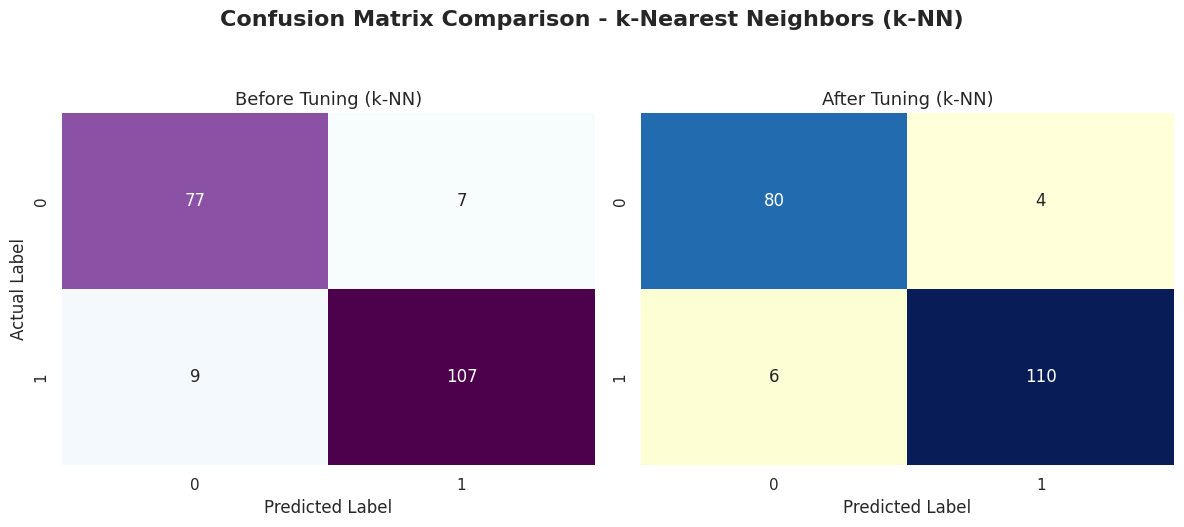

In [ ]:
# 7.7 Compare confusion matrices for k-NN (before vs after tuning)

# Compute confusion matrices
cm_knn = confusion_matrix(y_test, y_pred_knn)           # Before tuning
cm_knn_best = confusion_matrix(y_test, y_pred_knn_best) # After tuning

# Create side-by-side plots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Confusion matrix before tuning
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='BuPu', cbar=False, ax=axes[0])
axes[0].set_title("Before Tuning (k-NN)", fontsize=13)
axes[0].set_xlabel("Predicted Label")
axes[0].set_ylabel("Actual Label")

# Confusion matrix after tuning
sns.heatmap(cm_knn_best, annot=True, fmt='d', cmap='YlGnBu', cbar=False, ax=axes[1])
axes[1].set_title("After Tuning (k-NN)", fontsize=13)
axes[1].set_xlabel("Predicted Label")
axes[1].set_ylabel("")

# Shared title and layout
fig.suptitle("Confusion Matrix Comparison - k-Nearest Neighbors (k-NN)", fontsize=16, fontweight='bold', y=1.05)
plt.tight_layout()
plt.show()


                    Feature  Importance
10                 st_slope    0.079500
3    resting_blood_pressure    0.042833
2           chest_pain_type    0.027667
1                       sex    0.014333
11        num_major_vessels    0.008833
6                  rest_ecg    0.008167
9             st_depression    0.006333
4               cholesterol    0.000333
5       fasting_blood_sugar   -0.007000
7   max_heart_rate_achieved   -0.011333
0                       age   -0.012000
8   exercise_induced_angina   -0.012500


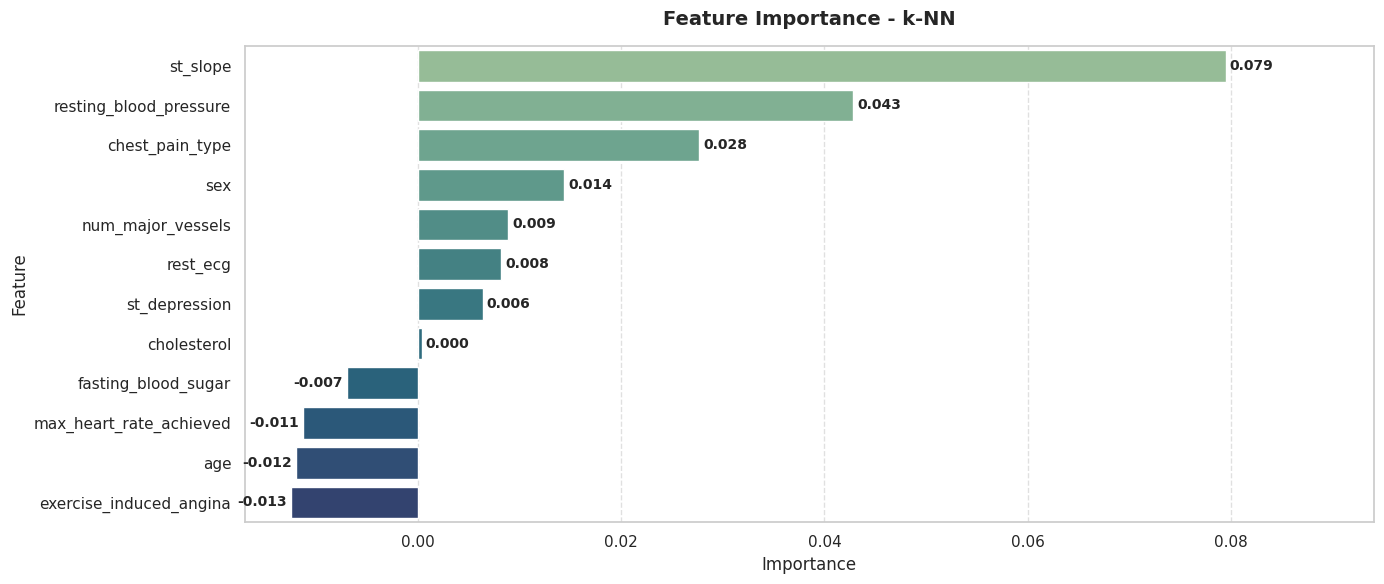

In [ ]:
# 7.8 Compute permutation feature importance for k-NN on the test set
result = permutation_importance(best_knn, X_test_scaled, y_test, n_repeats=30, random_state=42)

# Create DataFrame with features and their average importance scores
feature_importance_knn = pd.DataFrame({
    'Feature': X_train.select_dtypes(include='number').columns,
    'Importance': result.importances_mean
}).sort_values(by='Importance', ascending=False)

# Display ranked features
print(feature_importance_knn)

# Plot feature importance
plt.figure(figsize=(14, 6))
ax = sns.barplot(
    data=feature_importance_knn,
    x='Importance',
    y='Feature',
    palette='crest'
)

# Add importance values to each bar
for container in ax.containers:
    ax.bar_label(
        container,
        labels=[f'{v.get_width():.3f}' for v in container],
        label_type='edge',
        fontsize=10,
        padding=3,
        fontweight='bold'
    )

# Slightly extend x-axis to fit labels
ax.set_xlim(ax.get_xlim()[0], ax.get_xlim()[1] + 0.01)

# Title and grid formatting
plt.title("Feature Importance - k-NN", fontsize=14, fontweight='bold', pad=15)
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


## **Model- 3 Decision Tree**

### Decision Tree (DT) is a supervised machine learning algorithm used for both classification and regression tasks. It works by recursively splitting the data into subsets based on feature values that best separate the target classes. Each internal node represents a condition on a feature, each branch is an outcome of that condition, and each leaf node represents a final prediction. Decision Trees are non-parametric models that make no assumptions about data distribution, making them highly interpretable and effective for capturing nonlinear relationships.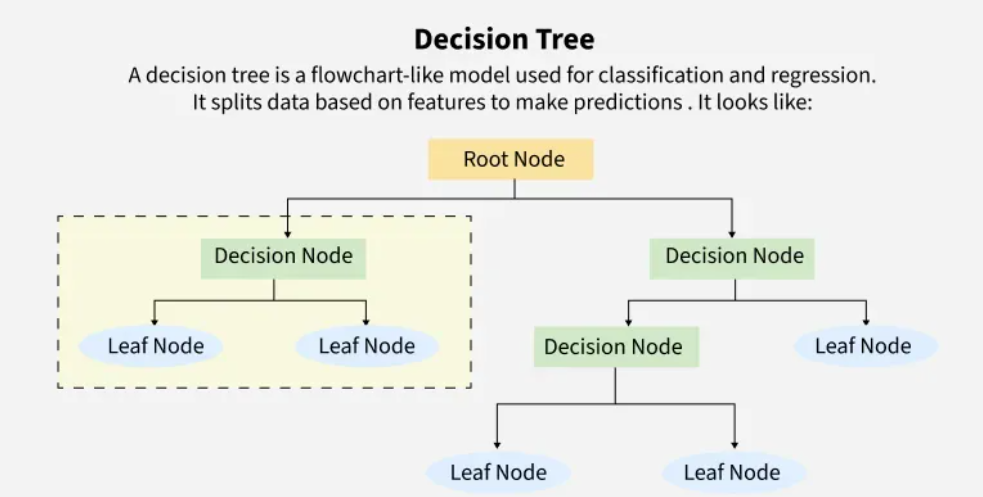

In [ ]:
# 7.1 Train a baseline Decision Tree before tuning

# Set up Decision Tree with simple constraints to avoid overfitting
dtree = DecisionTreeClassifier(
    max_depth=1,
    min_samples_split=50,
    min_samples_leaf=30,
    criterion='gini',
    splitter='best'
)

# Train the model on training data
dtree.fit(X_train, y_train)

# Predict on test data
y_pred_dtree = dtree.predict(X_test)

# Evaluate baseline Decision Tree
print("Evaluation Before Tuning (Decision Tree):")
print(classification_report(y_test, y_pred_dtree, digits=3))
print("Accuracy:", format(accuracy_score(y_test, y_pred_dtree), ".3f"))


Evaluation Before Tuning (Decision Tree):
              precision    recall  f1-score   support

           0      0.891     0.976     0.932        84
           1      0.981     0.914     0.946       116

    accuracy                          0.940       200
   macro avg      0.936     0.945     0.939       200
weighted avg      0.944     0.940     0.940       200

Accuracy: 0.940


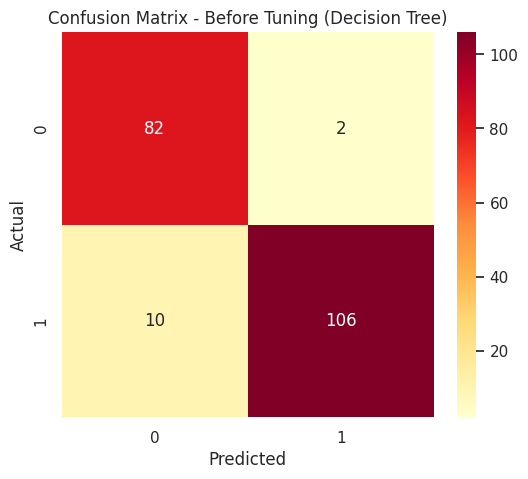

In [ ]:
# 7.2 Plot confusion matrix for Decision Tree before tuning

# Compute confusion matrix
cm_dtree = confusion_matrix(y_test, y_pred_dtree)

# Plot heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(cm_dtree, annot=True, fmt='d', cmap='YlOrRd')
plt.title("Confusion Matrix - Before Tuning (Decision Tree)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


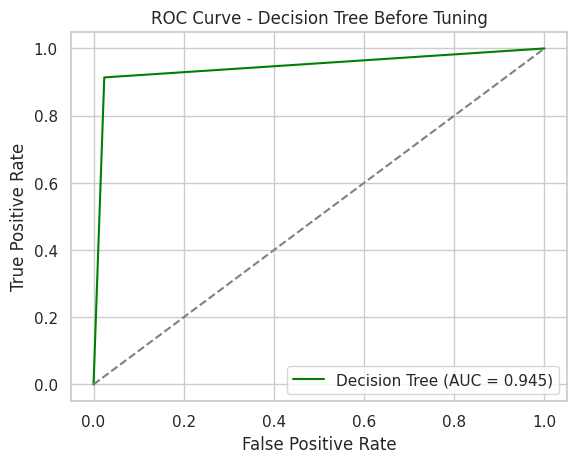

In [ ]:
# 7.3 Plot ROC curve for Decision Tree before tuning

# Get predicted probabilities for the positive class (heart disease = 1)
y_proba_dtree = dtree.predict_proba(X_test)[:, 1]

# Compute false positive rate, true positive rate, and AUC
fpr_dtree, tpr_dtree, _ = roc_curve(y_test, y_proba_dtree)
roc_auc_dtree = auc(fpr_dtree, tpr_dtree)

# Plot ROC curve
plt.figure()
plt.plot(fpr_dtree, tpr_dtree, label='Decision Tree (AUC = %0.3f)' % roc_auc_dtree, color='green')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # Baseline diagonal
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Decision Tree Before Tuning')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
# 7.4 Hyperparameter tuning for Decision Tree with 5-fold cross-validation

# Define the grid of hyperparameters to search
param_grid_dtree = {
    'criterion': ['gini', 'entropy'],          # Splitting criteria
    'max_depth': [1, 2, 3, 4, 5, 6, 8, 10],   # Tree depth options
    'min_samples_split': [2, 5, 10, 20],      # Minimum samples to split a node
    'min_samples_leaf': [1, 5, 10, 20],       # Minimum samples at a leaf node
    'splitter': ['best', 'random']            # Splitting strategy
}

# Set up GridSearchCV with Decision Tree
grid_dtree = GridSearchCV(
    estimator=DecisionTreeClassifier(random_state=42),
    param_grid=param_grid_dtree,
    cv=5,
    scoring='accuracy',
    verbose=1,
    n_jobs=-1
)

# Fit on training data (Decision Trees don’t require feature scaling)
grid_dtree.fit(X_train, y_train)

# Show best hyperparameters and best cross-validation score
print("Best Parameters (Decision Tree):", grid_dtree.best_params_)
print("Best CV Score (Decision Tree):", format(grid_dtree.best_score_, ".4f"))


Fitting 5 folds for each of 512 candidates, totalling 2560 fits
Best Parameters (Decision Tree): {'criterion': 'gini', 'max_depth': 6, 'min_samples_leaf': 1, 'min_samples_split': 5, 'splitter': 'best'}
Best CV Score (Decision Tree): 0.9613


Evaluation After Hyperparameter Tuning (Decision Tree):
Best Parameters: {'criterion': 'gini', 'max_depth': 6, 'min_samples_leaf': 1, 'min_samples_split': 5, 'splitter': 'best'}
Best CV Score: 0.9613
              precision    recall  f1-score   support

           0      0.953     0.964     0.959        84
           1      0.974     0.966     0.970       116

    accuracy                          0.965       200
   macro avg      0.963     0.965     0.964       200
weighted avg      0.965     0.965     0.965       200

Accuracy: 0.965


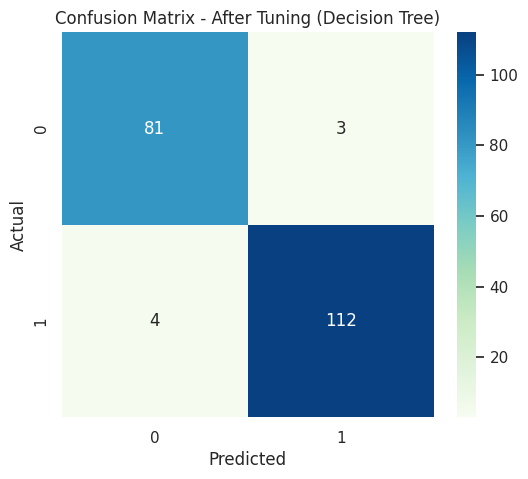

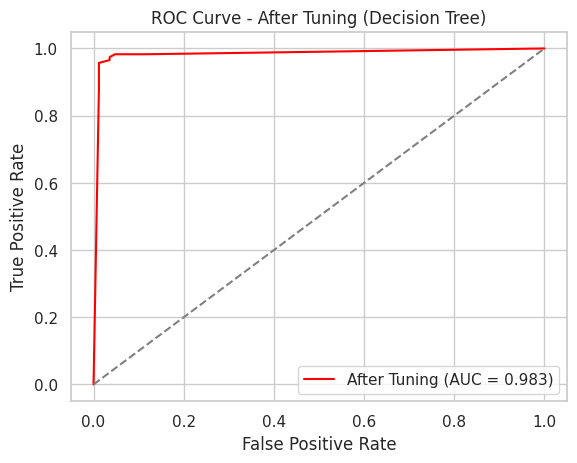

In [ ]:
# 7.5 Final evaluation of Decision Tree after hyperparameter tuning

# Use the best Decision Tree model from GridSearchCV
best_dtree = grid_dtree.best_estimator_

# Make predictions on the test set
y_pred_dtree_best = best_dtree.predict(X_test)
y_proba_dtree_best = best_dtree.predict_proba(X_test)[:, 1]

# Show evaluation metrics for tuned Decision Tree
print("Evaluation After Hyperparameter Tuning (Decision Tree):")
print("Best Parameters:", grid_dtree.best_params_)
print("Best CV Score:", format(grid_dtree.best_score_, ".4f"))
print(classification_report(y_test, y_pred_dtree_best, digits=3))
print("Accuracy:", format(accuracy_score(y_test, y_pred_dtree_best), ".3f"))

# Confusion matrix after tuning
cm_dtree_best = confusion_matrix(y_test, y_pred_dtree_best)
plt.figure(figsize=(6, 5))
sns.heatmap(cm_dtree_best, annot=True, fmt='d', cmap='GnBu')
plt.title("Confusion Matrix - After Tuning (Decision Tree)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# ROC curve after tuning
fpr_dtree_best, tpr_dtree_best, _ = roc_curve(y_test, y_proba_dtree_best)
roc_auc_dtree_best = auc(fpr_dtree_best, tpr_dtree_best)

plt.figure()
plt.plot(fpr_dtree_best, tpr_dtree_best, label='After Tuning (AUC = %.3f)' % roc_auc_dtree_best, color='red')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.title("ROC Curve - After Tuning (Decision Tree)")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid(True)
plt.show()


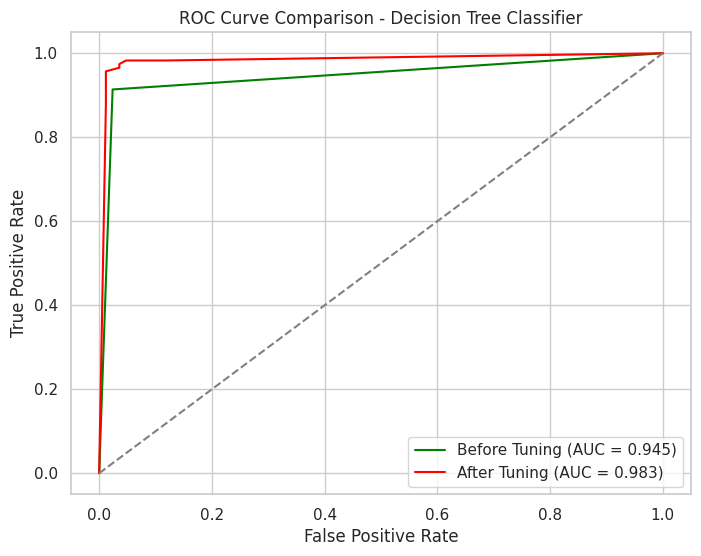

In [ ]:
# 7.6 Compare ROC curves for Decision Tree before vs after tuning

plt.figure(figsize=(8, 6))

# ROC curve before tuning
plt.plot(fpr_dtree, tpr_dtree, label='Before Tuning (AUC = %.3f)' % roc_auc_dtree, color='green')

# ROC curve after tuning
plt.plot(fpr_dtree_best, tpr_dtree_best, label='After Tuning (AUC = %.3f)' % roc_auc_dtree_best, color='red')

# Diagonal line for random baseline
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')

# Add title, labels, legend, and grid
plt.title("ROC Curve Comparison - Decision Tree Classifier")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


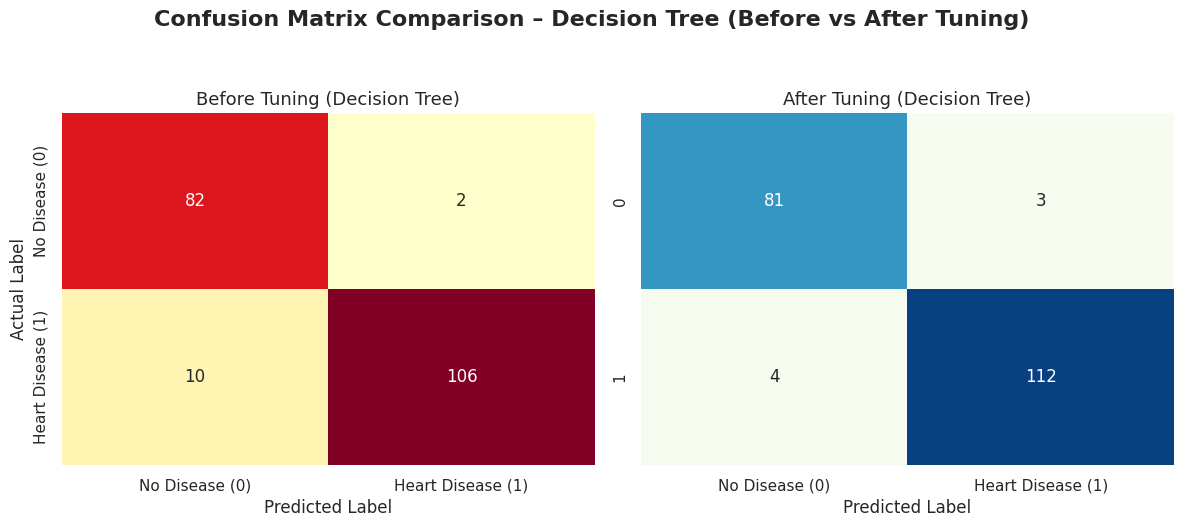

In [ ]:
# 7.7 Compare confusion matrices for Decision Tree (before vs after tuning)

# Compute confusion matrices
cm_dtree = confusion_matrix(y_test, y_pred_dtree)           # Before tuning
cm_dtree_best = confusion_matrix(y_test, y_pred_dtree_best) # After tuning

# Create side-by-side plots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Confusion matrix before tuning
sns.heatmap(cm_dtree, annot=True, fmt='d', cmap='YlOrRd', cbar=False, ax=axes[0])
axes[0].set_title("Before Tuning (Decision Tree)", fontsize=13)
axes[0].set_xlabel("Predicted Label")
axes[0].set_ylabel("Actual Label")
axes[0].set_xticklabels(['No Disease (0)', 'Heart Disease (1)'])
axes[0].set_yticklabels(['No Disease (0)', 'Heart Disease (1)'])

# Confusion matrix after tuning
sns.heatmap(cm_dtree_best, annot=True, fmt='d', cmap='GnBu', cbar=False, ax=axes[1])
axes[1].set_title("After Tuning (Decision Tree)", fontsize=13)
axes[1].set_xlabel("Predicted Label")
axes[1].set_ylabel("")  # Hide redundant y-label
axes[1].set_xticklabels(['No Disease (0)', 'Heart Disease (1)'])

# Shared title and layout
fig.suptitle("Confusion Matrix Comparison – Decision Tree (Before vs After Tuning)",
             fontsize=16, fontweight='bold', y=1.05)

plt.tight_layout()
plt.show()


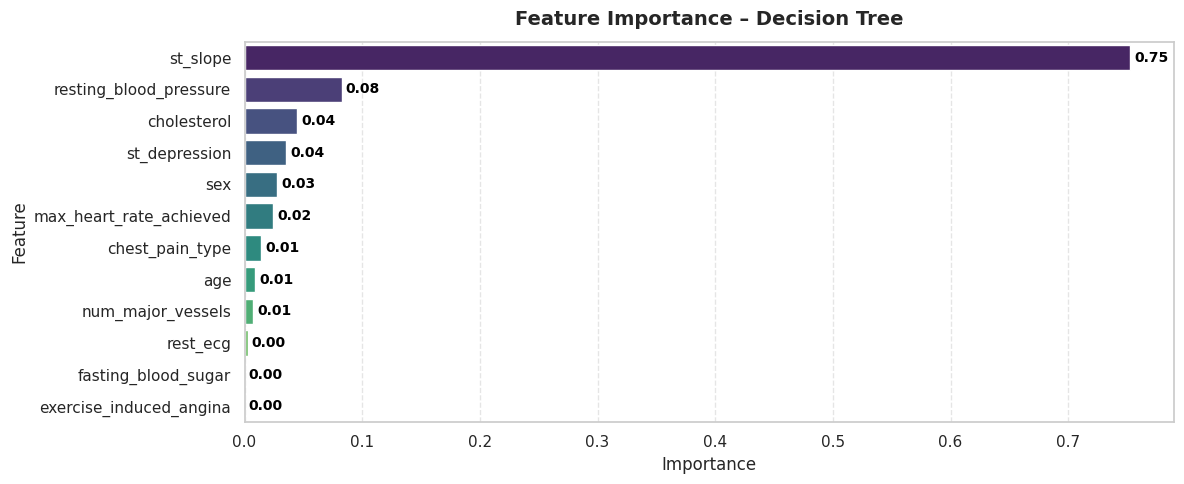

In [ ]:
# 7.8 Feature importance for Decision Tree

# Create DataFrame of features and their importance scores
dt_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': best_dtree.feature_importances_
}).sort_values(by='Importance', ascending=False).reset_index(drop=True)

# Add rank column for clearer ordering
dt_importance.index += 1
dt_importance.reset_index(inplace=True)
dt_importance.columns = ['Rank', 'Feature', 'Importance']

# Plot feature importance
plt.figure(figsize=(12, 5))  # Match style with LR and k-NN
ax = sns.barplot(data=dt_importance, x='Importance', y='Feature', palette='viridis')

# Add importance values (rounded to 2 decimals) next to each bar
for container in ax.containers:
    ax.bar_label(
        container,
        labels=[f"{np.round(v.get_width(), 2):.2f}" for v in container],
        padding=3,
        fontsize=10,
        color='black',
        fontweight='bold'
    )

# Styling and layout
plt.title('Feature Importance – Decision Tree', fontsize=14, fontweight='bold', pad=12)
plt.xlabel("Importance", fontsize=12)
plt.ylabel("Feature", fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


## **Model - 4 Random Forest (RF)**

### Random Forest is a machine learning algorithm that uses many decision trees to make better predictions. Each tree looks at different random parts of the data and their results are combined by voting for classification or averaging for regression. This helps in improving accuracy and reducing errors.

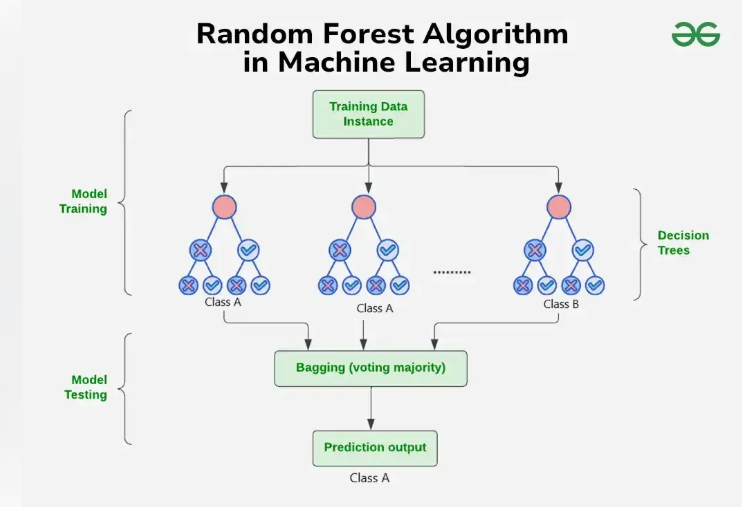

In [ ]:
# 7.1 Train a baseline Random Forest before tuning

# Initialise Random Forest with limited depth and estimators to avoid overfitting
rf_model = RandomForestClassifier(
    n_estimators=50, max_depth=2, min_samples_split=20,
    min_samples_leaf=10, max_features='sqrt', bootstrap=True,
    random_state=42
)

# Train the model
rf_model.fit(X_train, y_train)

# Predict on test set
y_pred_rf = rf_model.predict(X_test)

# Evaluate baseline Random Forest
print("Evaluation Before Tuning (Random Forest):")
print(classification_report(y_test, y_pred_rf))
print("Accuracy:", accuracy_score(y_test, y_pred_rf))


Evaluation Before Tuning (Random Forest):
              precision    recall  f1-score   support

           0       0.95      0.94      0.95        84
           1       0.96      0.97      0.96       116

    accuracy                           0.95       200
   macro avg       0.95      0.95      0.95       200
weighted avg       0.95      0.95      0.95       200

Accuracy: 0.955


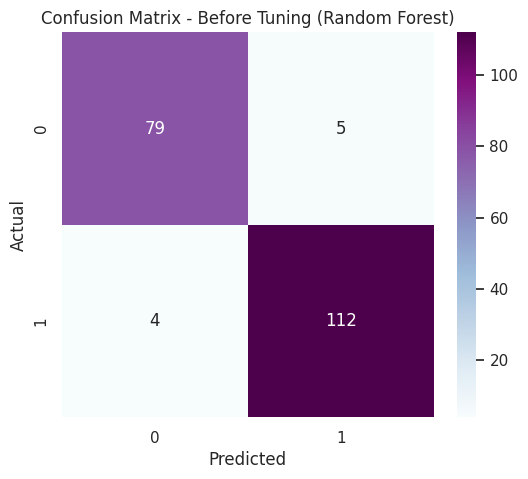

In [ ]:
# 7.2 Plot confusion matrix for Random Forest before tuning

# Generate confusion matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)

# Plot heatmap of confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='BuPu')
plt.title("Confusion Matrix - Before Tuning (Random Forest)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


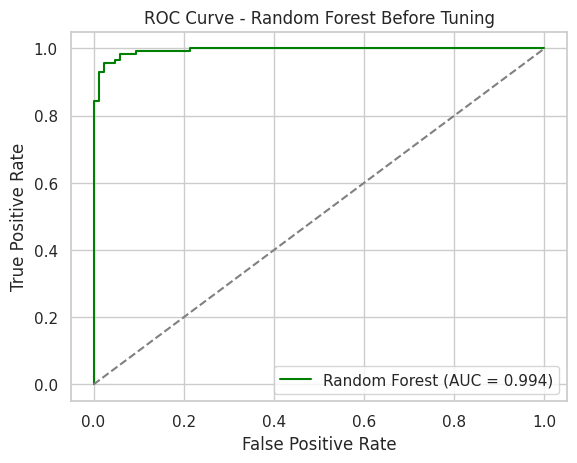

In [ ]:
# 7.3 Plot ROC curve for Random Forest before tuning

# Get predicted probabilities for the positive class
y_proba_rf = rf_model.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC score
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_proba_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

# Plot ROC curve
plt.figure()
plt.plot(fpr_rf, tpr_rf, label='Random Forest (AUC = %.3f)' % roc_auc_rf, color='green')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # Baseline diagonal
plt.title("ROC Curve - Random Forest Before Tuning")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


In [ ]:
# 7.4 Hyperparameter tuning for Random Forest with 5-fold cross-validation

# Define grid of hyperparameters to search
param_grid_rf = {
    'n_estimators': [50, 100, 200],          # Number of trees
    'max_depth': [2, 4, 6, 10, None],        # Maximum depth of trees
    'min_samples_split': [2, 5, 10, 20],     # Min samples needed to split a node
    'min_samples_leaf': [1, 2, 5, 10],       # Min samples required at a leaf
    'max_features': ['sqrt', 'log2'],        # Features considered at each split
    'bootstrap': [True, False]               # Whether to use bootstrapping
}

# Run GridSearchCV on Random Forest
grid_rf = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grid_rf,
    cv=5,
    scoring='accuracy',
    verbose=1,
    n_jobs=-1
)

# Fit on training data
grid_rf.fit(X_train, y_train)

# Print best parameters and CV score
print("Best Parameters (Random Forest):", grid_rf.best_params_)
print("Best CV Score (Random Forest):", format(grid_rf.best_score_, ".4f"))


Fitting 5 folds for each of 960 candidates, totalling 4800 fits
Best Parameters (Random Forest): {'bootstrap': False, 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best CV Score (Random Forest): 0.9825


Evaluation After Hyperparameter Tuning (Random Forest):
Best Parameters: {'bootstrap': False, 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best CV Score: 0.9824999999999999
              precision    recall  f1-score   support

           0       0.99      1.00      0.99        84
           1       1.00      0.99      1.00       116

    accuracy                           0.99       200
   macro avg       0.99      1.00      0.99       200
weighted avg       1.00      0.99      1.00       200

Accuracy: 0.995


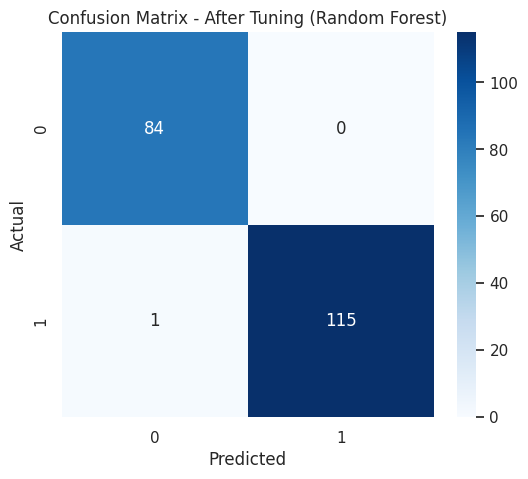

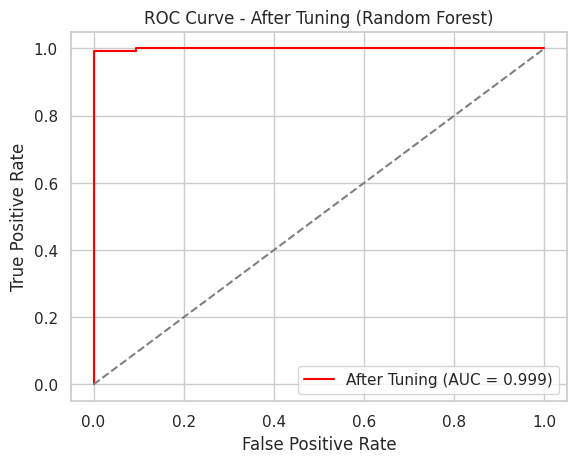

In [ ]:
# 7.5 Final evaluation of Random Forest after hyperparameter tuning

# Best Random Forest model from GridSearchCV
best_rf = grid_rf.best_estimator_

# Predict on test data
y_pred_rf_best = best_rf.predict(X_test)
y_proba_rf_best = best_rf.predict_proba(X_test)[:, 1]

# Show evaluation metrics
print("Evaluation After Hyperparameter Tuning (Random Forest):")
print("Best Parameters:", grid_rf.best_params_)
print("Best CV Score:", grid_rf.best_score_)
print(classification_report(y_test, y_pred_rf_best))
print("Accuracy:", accuracy_score(y_test, y_pred_rf_best))

# Confusion matrix after tuning
cm_rf_best = confusion_matrix(y_test, y_pred_rf_best)
plt.figure(figsize=(6, 5))
sns.heatmap(cm_rf_best, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - After Tuning (Random Forest)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# ROC curve after tuning
fpr_rf_best, tpr_rf_best, _ = roc_curve(y_test, y_proba_rf_best)
roc_auc_rf_best = auc(fpr_rf_best, tpr_rf_best)

plt.figure()
plt.plot(fpr_rf_best, tpr_rf_best, label='After Tuning (AUC = %.3f)' % roc_auc_rf_best, color='red')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.title("ROC Curve - After Tuning (Random Forest)")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


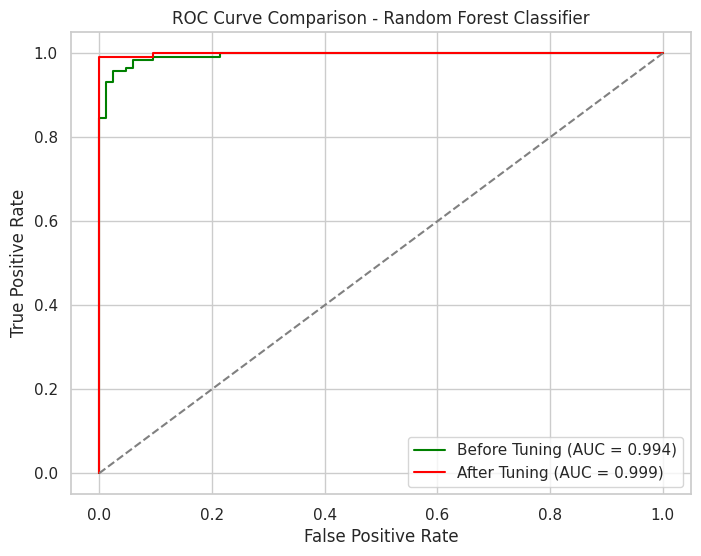

In [ ]:
# 7.6 Compare ROC curves for Random Forest before vs after tuning

plt.figure(figsize=(8, 6))

# ROC curve before tuning
plt.plot(fpr_rf, tpr_rf, label='Before Tuning (AUC = %.3f)' % roc_auc_rf, color='green')

# ROC curve after tuning
plt.plot(fpr_rf_best, tpr_rf_best, label='After Tuning (AUC = %.3f)' % roc_auc_rf_best, color='red')

# Baseline diagonal for random guessing
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')

# Add title, labels, legend, and grid
plt.title("ROC Curve Comparison - Random Forest Classifier")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


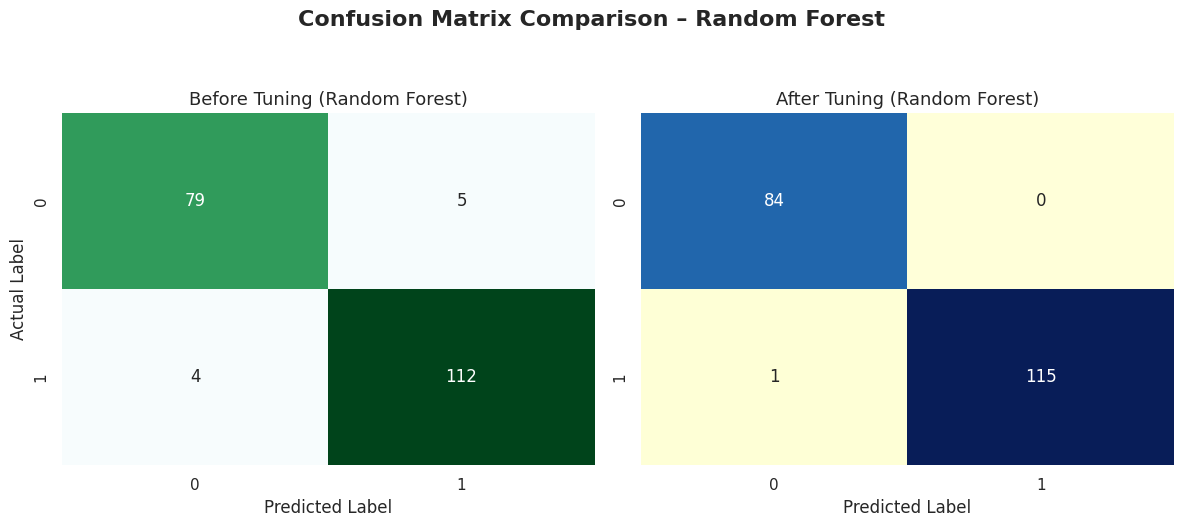

In [ ]:
# 7.7 Compare confusion matrices for Random Forest (before vs after tuning)

# Compute confusion matrices
cm_rf = confusion_matrix(y_test, y_pred_rf)           # Before tuning
cm_rf_best = confusion_matrix(y_test, y_pred_rf_best) # After tuning

# Create side-by-side plots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Confusion matrix before tuning
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='BuGn', cbar=False, ax=axes[0])
axes[0].set_title("Before Tuning (Random Forest)", fontsize=13)
axes[0].set_xlabel("Predicted Label")
axes[0].set_ylabel("Actual Label")

# Confusion matrix after tuning
sns.heatmap(cm_rf_best, annot=True, fmt='d', cmap='YlGnBu', cbar=False, ax=axes[1])
axes[1].set_title("After Tuning (Random Forest)", fontsize=13)
axes[1].set_xlabel("Predicted Label")
axes[1].set_ylabel("")  # Hide redundant label

# Shared title and layout
fig.suptitle("Confusion Matrix Comparison – Random Forest", fontsize=16, fontweight='bold', y=1.05)
plt.tight_layout()
plt.show()


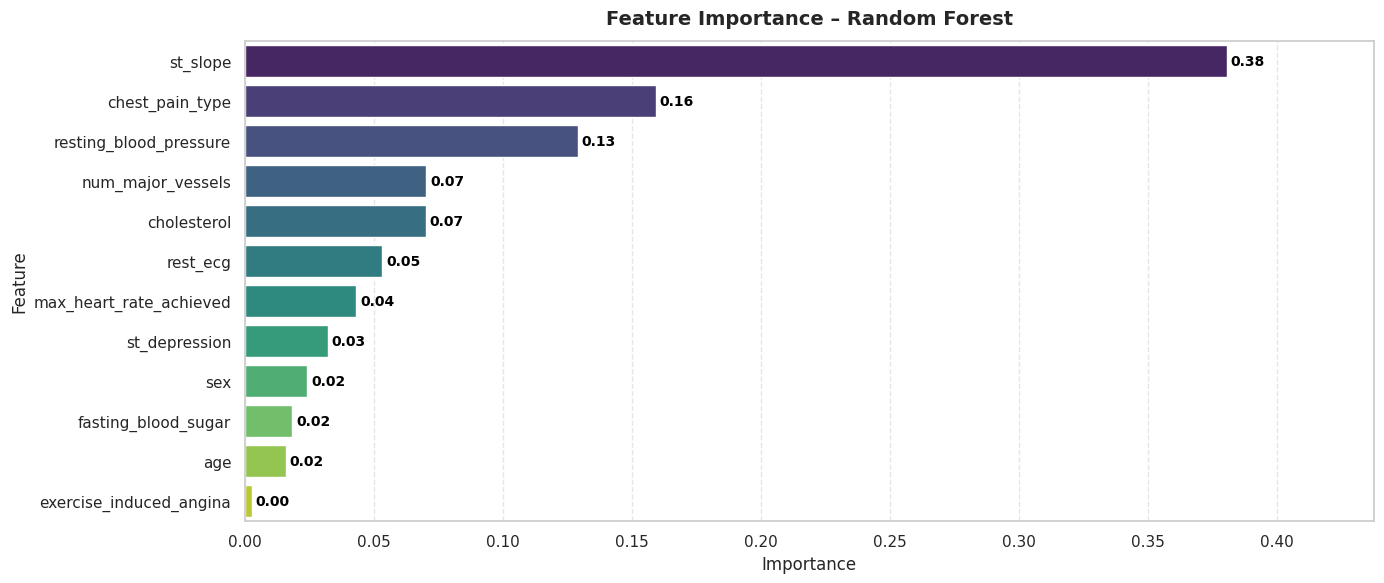

In [ ]:
# 7.8 Feature importance for Random Forest

# Create DataFrame of features and their importance scores
rf_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': best_rf.feature_importances_
}).sort_values(by='Importance', ascending=False).reset_index(drop=True)

# Add rank column for clearer ordering
rf_importance.index += 1
rf_importance.reset_index(inplace=True)
rf_importance.columns = ['Rank', 'Feature', 'Importance']

# Plot feature importance
plt.figure(figsize=(14, 6))  # Wider figure for readability
ax = sns.barplot(data=rf_importance, x='Importance', y='Feature', palette='viridis')

# Add importance values (rounded to 2 decimals) on bars
for container in ax.containers:
    ax.bar_label(
        container,
        labels=[f"{np.round(v.get_width(), 2):.2f}" for v in container],
        padding=3,
        fontsize=10,
        color='black',
        fontweight='bold'
    )

# Style adjustments
plt.title('Feature Importance – Random Forest', fontsize=14, fontweight='bold', pad=12)
plt.xlabel("Importance", fontsize=12)
plt.ylabel("Feature", fontsize=12)

# Extend x-axis slightly to prevent label cutoff
plt.xlim(0, rf_importance['Importance'].max() * 1.15)

plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


# **Model -5. EXtreme Gradient Boosting (XGBoost)**



---

Traditional machine learning models like decision trees and random forests are easy to interpret but often struggle with accuracy on complex datasets. XGBoost short form for eXtreme Gradient Boosting is an advanced machine learning algorithm designed for efficiency, speed and high performance.


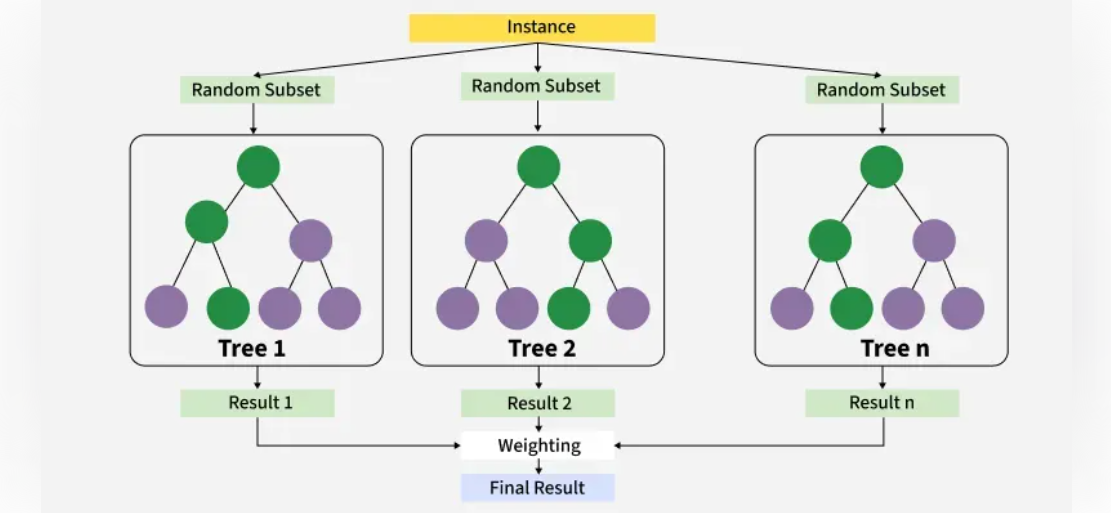


In [ ]:
# 7.1 Train a baseline XGBoost model before tuning

# Set up XGBoost with shallow trees, fewer estimators, and stronger regularisation
xgb_model = XGBClassifier(
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42,
    n_estimators=50,       # Fewer trees
    max_depth=2,           # Very shallow trees
    learning_rate=0.05,    # Smaller learning rate
    subsample=0.7,         # Use 70% of data per tree
    colsample_bytree=0.7,  # Use 70% of features per tree
    reg_lambda=5           # Stronger L2 regularisation
)

# Train the model
xgb_model.fit(X_train, y_train)

# Predict on test set
y_pred_xgb = xgb_model.predict(X_test)
y_proba_xgb = xgb_model.predict_proba(X_test)[:, 1]

# Evaluate baseline XGBoost
print("Evaluation Before Tuning (XGBoost):")
print(classification_report(y_test, y_pred_xgb, digits=3))
print("Accuracy:", format(accuracy_score(y_test, y_pred_xgb), ".3f"))


Evaluation Before Tuning (XGBoost):
              precision    recall  f1-score   support

           0      0.953     0.976     0.965        84
           1      0.982     0.966     0.974       116

    accuracy                          0.970       200
   macro avg      0.968     0.971     0.969       200
weighted avg      0.970     0.970     0.970       200

Accuracy: 0.970


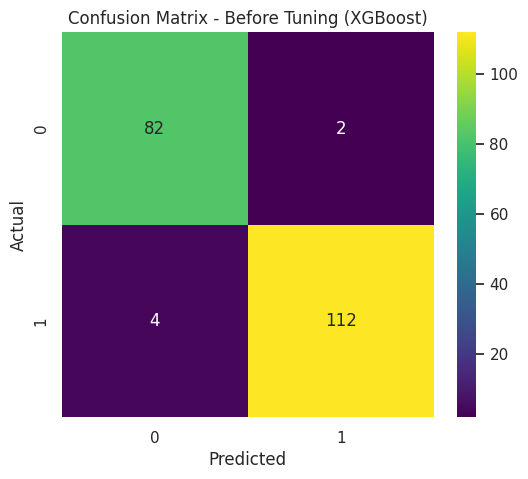

In [ ]:
# 7.2 Plot confusion matrix for XGBoost before tuning

# Compute confusion matrix
cm_xgb = confusion_matrix(y_test, y_pred_xgb)

# Plot heatmap of confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='viridis')
plt.title("Confusion Matrix - Before Tuning (XGBoost)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


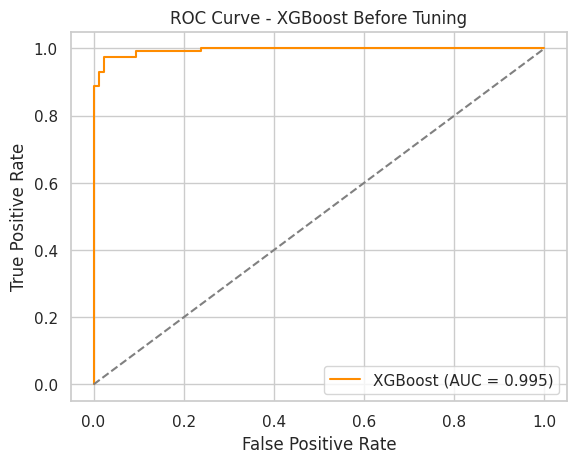

In [ ]:
# 7.3 Plot ROC curve for XGBoost before tuning

# Compute ROC curve and AUC using predicted probabilities
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_proba_xgb)
roc_auc_xgb = auc(fpr_xgb, tpr_xgb)

# Plot ROC curve
plt.figure()
plt.plot(fpr_xgb, tpr_xgb, label='XGBoost (AUC = %.3f)' % roc_auc_xgb, color='darkorange')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # Baseline diagonal
plt.title("ROC Curve - XGBoost Before Tuning")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


In [ ]:
# 7.4 Hyperparameter tuning for XGBoost with 5-fold cross-validation

# Define parameter grid to search
param_grid_xgb = {
    'n_estimators': [50, 100, 200],      # Number of trees
    'max_depth': [2, 4, 6],              # Depth of trees
    'learning_rate': [0.01, 0.05, 0.1],  # Learning rate
    'subsample': [0.6, 0.8, 1.0],        # Row sampling per tree
    'colsample_bytree': [0.6, 0.8, 1.0], # Feature sampling per tree
    'reg_lambda': [0, 1, 5]              # L2 regularisation
}

# Create base XGBoost model
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# Run GridSearchCV with 5-fold CV
grid_xgb = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid_xgb,
    cv=5,
    scoring='accuracy',
    verbose=1,
    n_jobs=-1
)

# Fit on training data
grid_xgb.fit(X_train, y_train)

# Print best parameters and CV score
print("Best Parameters (XGBoost):", grid_xgb.best_params_)
print("Best CV Score (XGBoost):", format(grid_xgb.best_score_, ".4f"))


Fitting 5 folds for each of 729 candidates, totalling 3645 fits
Best Parameters (XGBoost): {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 100, 'reg_lambda': 0, 'subsample': 1.0}
Best CV Score (XGBoost): 0.9825


In [ ]:
# 7.5 Final evaluation of XGBoost after hyperparameter tuning

# Get the best XGBoost model from GridSearchCV
best_xgb = grid_xgb.best_estimator_

# Predict on test data
y_pred_xgb_best = best_xgb.predict(X_test)
y_proba_xgb_best = best_xgb.predict_proba(X_test)[:, 1]

# Show evaluation metrics
print("Evaluation After Hyperparameter Tuning (XGBoost):")
print("Best Parameters:", grid_xgb.best_params_)
print("Best CV Score:", grid_xgb.best_score_)
print(classification_report(y_test, y_pred_xgb_best))
print("Accuracy:", accuracy_score(y_test, y_pred_xgb_best))


Evaluation After Hyperparameter Tuning (XGBoost):
Best Parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 100, 'reg_lambda': 0, 'subsample': 1.0}
Best CV Score: 0.9824999999999999
              precision    recall  f1-score   support

           0       1.00      0.99      0.99        84
           1       0.99      1.00      1.00       116

    accuracy                           0.99       200
   macro avg       1.00      0.99      0.99       200
weighted avg       1.00      0.99      0.99       200

Accuracy: 0.995


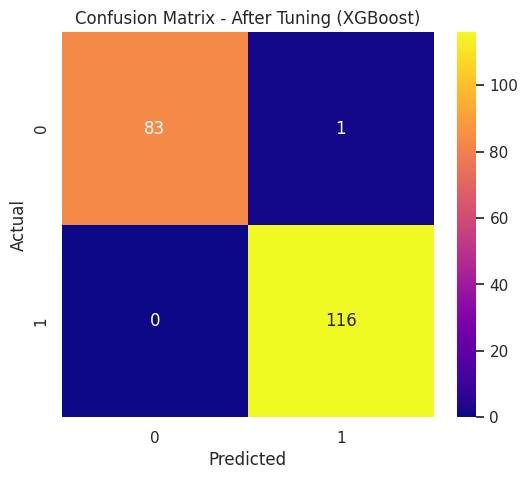

In [ ]:
# 7.6 Plot confusion matrix for XGBoost after tuning

# Compute confusion matrix
cm_xgb_best = confusion_matrix(y_test, y_pred_xgb_best)

# Plot heatmap of confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm_xgb_best, annot=True, fmt='d', cmap='plasma')
plt.title("Confusion Matrix - After Tuning (XGBoost)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


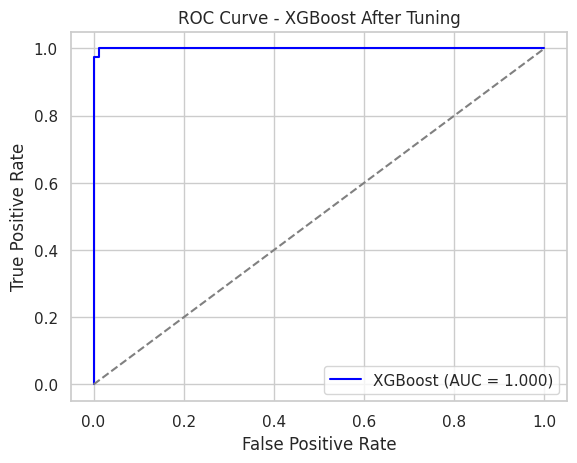

In [ ]:
# 7.7 Plot ROC curve for XGBoost after tuning

# Compute ROC curve and AUC for tuned XGBoost
fpr_xgb_best, tpr_xgb_best, _ = roc_curve(y_test, y_proba_xgb_best)
roc_auc_xgb_best = auc(fpr_xgb_best, tpr_xgb_best)

# Plot ROC curve
plt.figure()
plt.plot(fpr_xgb_best, tpr_xgb_best, label='XGBoost (AUC = %.3f)' % roc_auc_xgb_best, color='blue')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # Baseline diagonal
plt.title("ROC Curve - XGBoost After Tuning")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


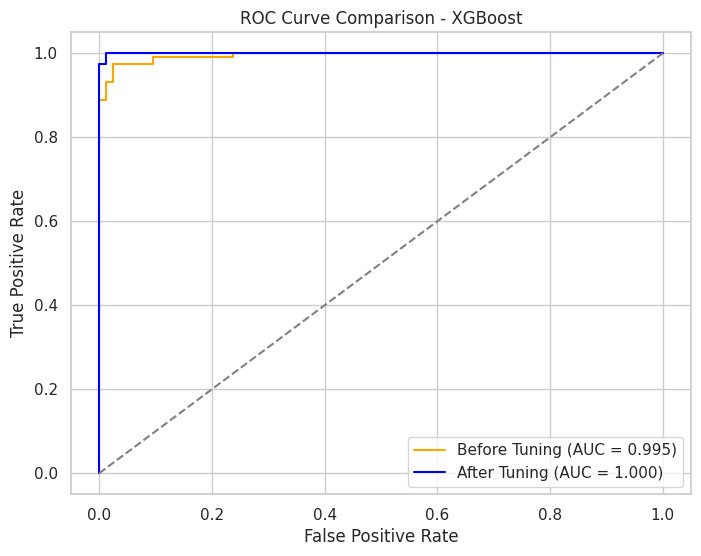

In [ ]:
# 7.8 Compare ROC curves for XGBoost before vs after tuning

plt.figure(figsize=(8, 6))

# ROC curve before tuning
plt.plot(fpr_xgb, tpr_xgb, label='Before Tuning (AUC = %.3f)' % roc_auc_xgb, color='orange')

# ROC curve after tuning
plt.plot(fpr_xgb_best, tpr_xgb_best, label='After Tuning (AUC = %.3f)' % roc_auc_xgb_best, color='blue')

# Random baseline diagonal
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')

# Titles, labels, and legend
plt.title("ROC Curve Comparison - XGBoost")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


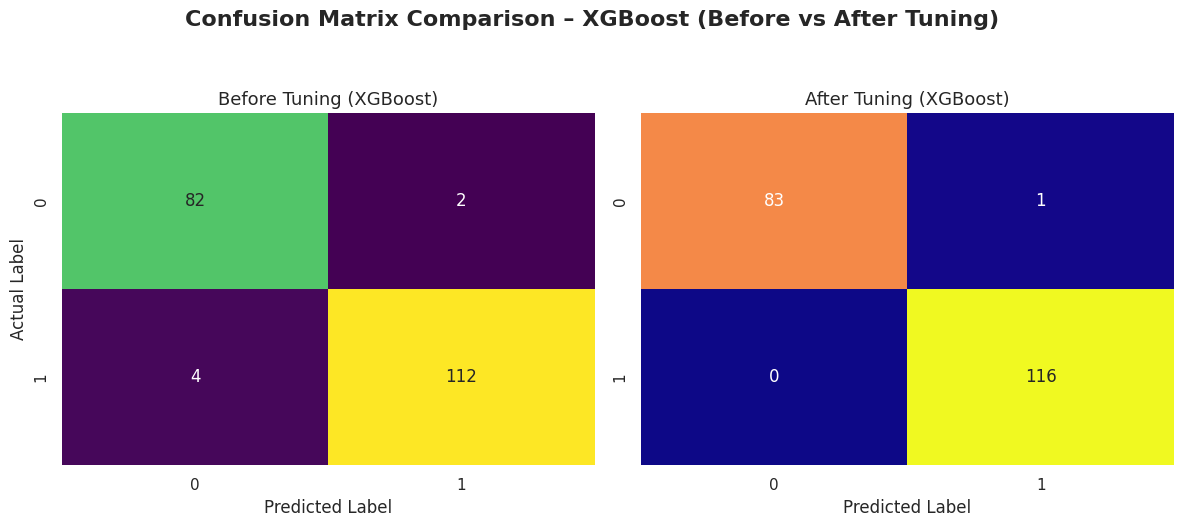

In [ ]:
# 7.9 Compare confusion matrices for XGBoost (before vs after tuning)

# Compute confusion matrices
cm_xgb = confusion_matrix(y_test, y_pred_xgb)           # Before tuning
cm_xgb_best = confusion_matrix(y_test, y_pred_xgb_best) # After tuning

# Create side-by-side plots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Confusion matrix before tuning
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='viridis', cbar=False, ax=axes[0])
axes[0].set_title("Before Tuning (XGBoost)", fontsize=13)
axes[0].set_xlabel("Predicted Label")
axes[0].set_ylabel("Actual Label")

# Confusion matrix after tuning
sns.heatmap(cm_xgb_best, annot=True, fmt='d', cmap='plasma', cbar=False, ax=axes[1])
axes[1].set_title("After Tuning (XGBoost)", fontsize=13)
axes[1].set_xlabel("Predicted Label")
axes[1].set_ylabel("")  # Hide redundant label

# Shared title for comparison
fig.suptitle("Confusion Matrix Comparison – XGBoost (Before vs After Tuning)",
             fontsize=16, fontweight='bold', y=1.05)

plt.tight_layout()
plt.show()


XGBoost Feature Importance (Gain-Based):
 Rank                 Feature  Importance
    1                st_slope    0.479838
    2         chest_pain_type    0.154315
    3  resting_blood_pressure    0.054289
    4                     sex    0.054046
    5       num_major_vessels    0.052628
    6                rest_ecg    0.046359
    7             cholesterol    0.043813
    8     fasting_blood_sugar    0.036291
    9           st_depression    0.034666
   10 max_heart_rate_achieved    0.027390
   11                     age    0.009796
   12 exercise_induced_angina    0.006570


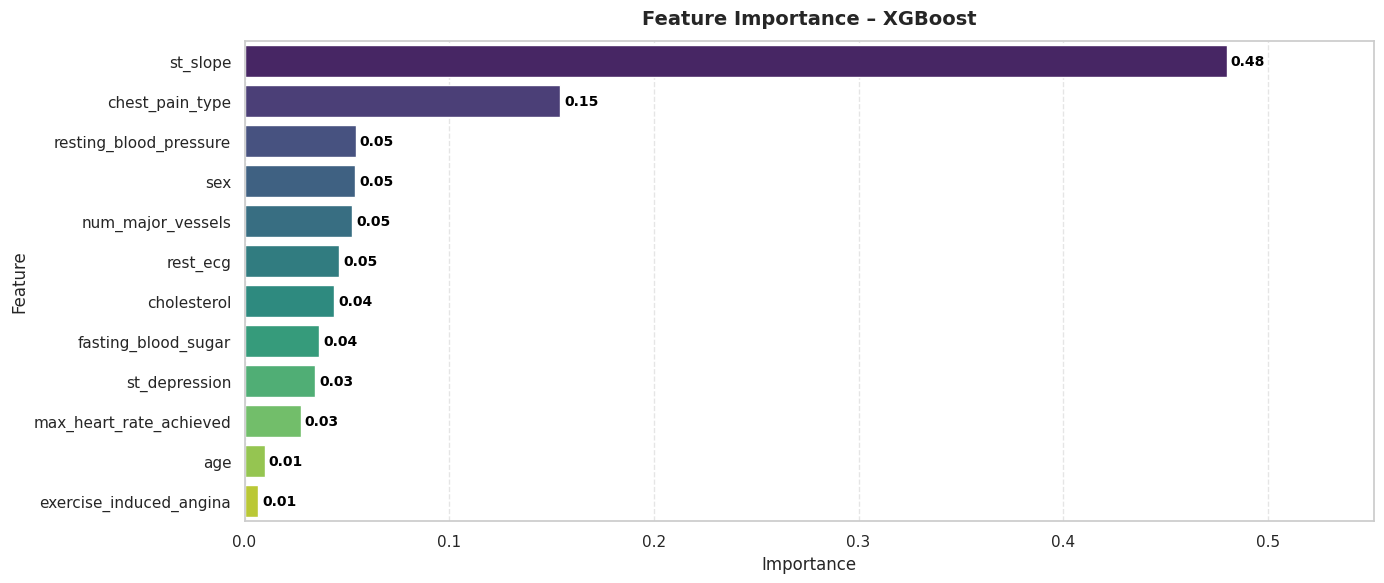

In [ ]:
# 7.10 Feature importance for XGBoost

# Create DataFrame of features with their importance scores
xgb_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': best_xgb.feature_importances_
}).sort_values(by='Importance', ascending=False).reset_index(drop=True)

# Add rank column for easier interpretation
xgb_importance.index += 1
xgb_importance.reset_index(inplace=True)
xgb_importance.columns = ['Rank', 'Feature', 'Importance']

# Print ranked feature importance table
print("XGBoost Feature Importance (Gain-Based):")
print(xgb_importance.to_string(index=False))

# Plot feature importance (style consistent with Random Forest)
plt.figure(figsize=(14, 6))
ax = sns.barplot(data=xgb_importance, x='Importance', y='Feature', palette='viridis')

# Add importance values on bars
for container in ax.containers:
    ax.bar_label(
        container,
        labels=[f"{np.round(v.get_width(), 2):.2f}" for v in container],
        padding=3,
        fontsize=10,
        color='black',
        fontweight='bold'
    )

# Styling for clarity
plt.title('Feature Importance – XGBoost', fontsize=14, fontweight='bold', pad=12)
plt.xlabel("Importance", fontsize=12)
plt.ylabel("Feature", fontsize=12)

# Extend x-axis slightly to avoid label cutoff
plt.xlim(0, xgb_importance['Importance'].max() * 1.15)

plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


# **Model- 6. Multi-Layer Perceptron (MLP)**



---
### Multi-Layer Perceptron (MLP) consists of fully connected dense layers that transform input data from one dimension to another. It is called multi-layer because it contains an input layer, one or more hidden layers and an output layer. The purpose of an MLP is to model complex relationships between inputs and outputs.
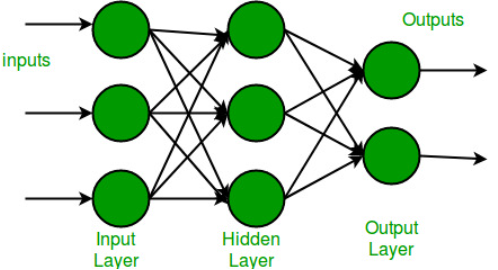

In [ ]:
# 7.1 Build and train a baseline MLP model (before tuning)

# Define sequential model
model = Sequential()

# Add hidden layer with 64 neurons and ReLU activation
model.add(Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)))

# Add output layer with sigmoid activation for binary classification
model.add(Dense(1, activation='sigmoid'))

# Compile the model with Adam optimiser and binary crossentropy loss
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the baseline MLP for 100 epochs with batch size of 32
history = model.fit(X_train_scaled, y_train,
                    validation_data=(X_test_scaled, y_test),
                    epochs=100,
                    batch_size=32,
                    verbose=1)


Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - accuracy: 0.6269 - loss: 0.6254 - val_accuracy: 0.8750 - val_loss: 0.4818
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8928 - loss: 0.4487 - val_accuracy: 0.9100 - val_loss: 0.3606
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9322 - loss: 0.3346 - val_accuracy: 0.9100 - val_loss: 0.2893
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9396 - loss: 0.2807 - val_accuracy: 0.9200 - val_loss: 0.2472
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9381 - loss: 0.2327 - val_accuracy: 0.9300 - val_loss: 0.2192
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9455 - loss: 0.2068 - val_accuracy: 0.9300 - val_loss: 0.2003
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9477 - loss: 0.1742 - val_accuracy: 0.9400 - val_loss: 0.1855
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9277 - loss: 0.2031 - val_accuracy: 0.9450 - 

In [ ]:
# 7.2 Evaluate baseline MLP performance before tuning

# Predict probabilities for the test set
y_proba_mlp = model.predict(X_test_scaled, verbose=0).flatten()

# Convert probabilities to class labels
y_pred_mlp = (y_proba_mlp > 0.85).astype("int32")

# Print evaluation metrics
print("Evaluation Before Tuning (MLP – 2 layers):")
print(classification_report(y_test.ravel(), y_pred_mlp, digits=3))
print("Accuracy:", format(accuracy_score(y_test.ravel(), y_pred_mlp), ".3f"))


Evaluation Before Tuning (MLP – 2 layers):
              precision    recall  f1-score   support

           0      0.922     0.988     0.954        84
           1      0.991     0.940     0.965       116

    accuracy                          0.960       200
   macro avg      0.957     0.964     0.959       200
weighted avg      0.962     0.960     0.960       200

Accuracy: 0.960


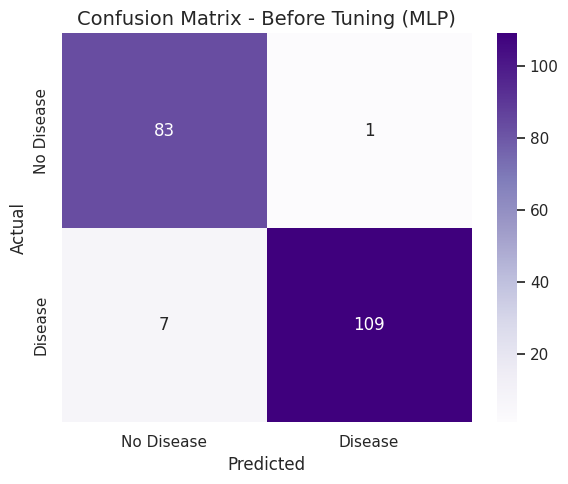

In [ ]:
# 7.3 Plot confusion matrix for MLP before tuning

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred_mlp)

# Plot heatmap of confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Purples',
            xticklabels=['No Disease', 'Disease'],
            yticklabels=['No Disease', 'Disease'])

# Add titles and axis labels
plt.title("Confusion Matrix - Before Tuning (MLP)", fontsize=14)
plt.xlabel("Predicted", fontsize=12)
plt.ylabel("Actual", fontsize=12)
plt.tight_layout()
plt.show()


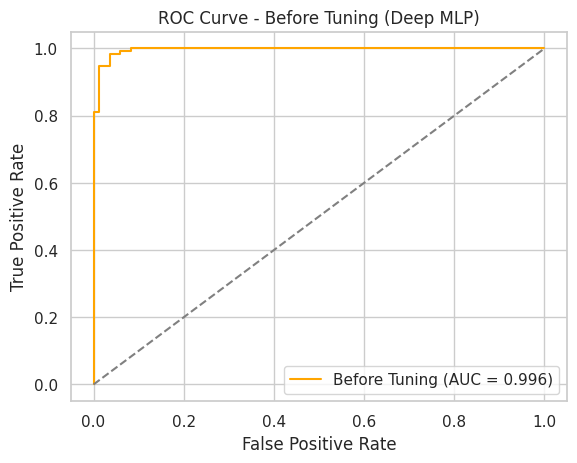

In [ ]:
# 7.4 Plot ROC curve for MLP before tuning

# Compute ROC curve and AUC for predicted probabilities
fpr_mlp, tpr_mlp, _ = roc_curve(y_test, y_proba_mlp)
roc_auc_mlp = auc(fpr_mlp, tpr_mlp)

# Plot ROC curve
plt.figure()
plt.plot(fpr_mlp, tpr_mlp, label='Before Tuning (AUC = %.3f)' % roc_auc_mlp, color='orange')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # Baseline diagonal
plt.title("ROC Curve - Before Tuning (Deep MLP)")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


In [ ]:
# 7.5 Build and evaluate a tuned MLP model (1 hidden layer + dropout)

# Define tuned MLP architecture
def create_mlp_tuned(input_dim):
    model = Sequential()
    model.add(Dense(128, activation='relu', input_shape=(input_dim,)))  # Hidden layer with 128 neurons
    model.add(Dropout(0.3))                                             # Dropout for regularisation
    model.add(Dense(1, activation='sigmoid'))                           # Output layer for binary classification
    model.compile(optimizer=Adam(learning_rate=0.0005),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    return model

# Train final tuned MLP model with early stopping
model_tuned = create_mlp_tuned(X_train_scaled.shape[1])
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True, verbose=0)

history_tuned = model_tuned.fit(
    X_train_scaled, y_train,
    validation_data=(X_test_scaled, y_test),
    epochs=100,
    batch_size=32,
    callbacks=[early_stop],
    verbose=1
)

# Predictions and evaluation after tuning
y_proba_tuned = model_tuned.predict(X_test_scaled, verbose=0).flatten()
y_pred_tuned  = (y_proba_tuned > 0.5).astype(int)

print("Evaluation After Tuning (MLP):")
print(classification_report(y_test.ravel(), y_pred_tuned, digits=3))
print("Accuracy:", format(accuracy_score(y_test.ravel(), y_pred_tuned), ".3f"))

# Compute ROC curve and AUC for tuned model
fpr_mlp_best, tpr_mlp_best, _ = roc_curve(y_test.ravel(), y_proba_tuned)
roc_auc_mlp_best = auc(fpr_mlp_best, tpr_mlp_best)

# Perform 5-fold cross-validation for robustness
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = []

for fold, (tr_idx, va_idx) in enumerate(cv.split(X_train_scaled, y_train), start=1):
    X_tr, X_va = X_train_scaled[tr_idx], X_train_scaled[va_idx]
    y_tr = y_train.iloc[tr_idx].values.ravel()
    y_va = y_train.iloc[va_idx].values.ravel()

    model_cv = create_mlp_tuned(X_train_scaled.shape[1])
    early_stop_cv = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True, verbose=0)

    model_cv.fit(
        X_tr, y_tr,
        validation_data=(X_va, y_va),
        epochs=100,
        batch_size=32,
        callbacks=[early_stop_cv],
        verbose=0
    )

    y_proba_va = model_cv.predict(X_va, verbose=0).flatten()
    y_pred_va  = (y_proba_va > 0.5).astype(int)
    acc = accuracy_score(y_va, y_pred_va)
    cv_scores.append(acc)
    print(f"Fold {fold} Accuracy: {acc:.4f}")

# Report cross-validation results
best_fold = int(np.argmax(cv_scores)) + 1
best_cv   = cv_scores[best_fold - 1]

print("\n5-Fold CV Scores:", [f"{s:.4f}" for s in cv_scores])
print("Mean CV Accuracy:", f"{np.mean(cv_scores):.4f}")
print("Std CV Accuracy :", f"{np.std(cv_scores):.4f}")
print(f"Best CV Accuracy: {best_cv:.4f} (Fold {best_fold})")


Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.7557 - loss: 0.5886 - val_accuracy: 0.9250 - val_loss: 0.4646
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8629 - loss: 0.4662 - val_accuracy: 0.9300 - val_loss: 0.3780
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9157 - loss: 0.3940 - val_accuracy: 0.9550 - val_loss: 0.3189
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9114 - loss: 0.3267 - val_accuracy: 0.9450 - val_loss: 0.2775
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9405 - loss: 0.2771 - val_accuracy: 0.9450 - val_loss: 0.2485
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9415 - loss: 0.2552 - val_accuracy: 0.9500 - val_loss: 0.2265
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9401 - loss: 0.2379 - val_accuracy: 0.9500 - val_loss: 0.2097
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9422 - loss: 0.2073 - val_accuracy: 0.9500 - 

Fold 1 Accuracy: 0.9500
Fold 2 Accuracy: 0.9875
Fold 3 Accuracy: 0.9812
Fold 4 Accuracy: 0.9625
Fold 5 Accuracy: 0.9375

5-Fold CV Scores: ['0.9500', '0.9875', '0.9812', '0.9625', '0.9375']
Mean CV Accuracy: 0.9637
Std CV Accuracy : 0.0187
Best CV Accuracy: 0.9875 (Fold 2)


In [ ]:
# 7.6 Evaluate tuned MLP on the test set

# Predict class labels and probabilities
y_pred_tuned = (model_tuned.predict(X_test_scaled) > 0.5).astype("int32").flatten()
y_proba_tuned = model_tuned.predict(X_test_scaled).flatten()

# Print evaluation metrics
print("Evaluation After Tuning (Deep MLP):")
print(classification_report(y_test, y_pred_tuned))
print("Accuracy:", accuracy_score(y_test, y_pred_tuned))


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
Evaluation After Tuning (Deep MLP):
              precision    recall  f1-score   support

           0       0.98      0.96      0.97        84
           1       0.97      0.98      0.98       116

    accuracy                           0.97       200
   macro avg       0.98      0.97      0.97       200
weighted avg       0.98      0.97      0.97       200

Accuracy: 0.975


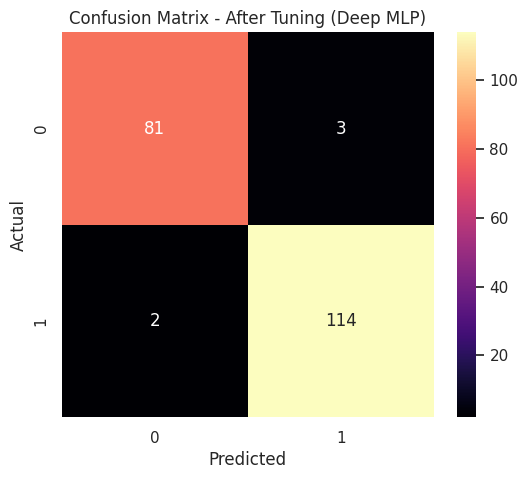

In [ ]:
# 7.7 Plot confusion matrix for tuned MLP

# Compute confusion matrix
cm_tuned = confusion_matrix(y_test, y_pred_tuned)

# Plot heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(cm_tuned, annot=True, fmt='d', cmap='magma')
plt.title("Confusion Matrix - After Tuning (Deep MLP)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


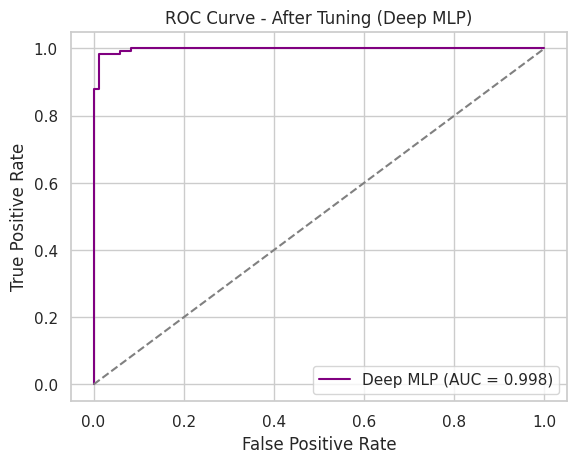

In [ ]:
# 7.8 Plot ROC curve for tuned MLP

# Compute ROC curve and AUC
fpr_mlp_best, tpr_mlp_best, _ = roc_curve(y_test, y_proba_tuned)
roc_auc_mlp_best = auc(fpr_mlp_best, tpr_mlp_best)

# Plot ROC curve
plt.figure()
plt.plot(fpr_mlp_best, tpr_mlp_best, label='Deep MLP (AUC = %.3f)' % roc_auc_mlp_best, color='purple')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # Baseline diagonal
plt.title("ROC Curve - After Tuning (Deep MLP)")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


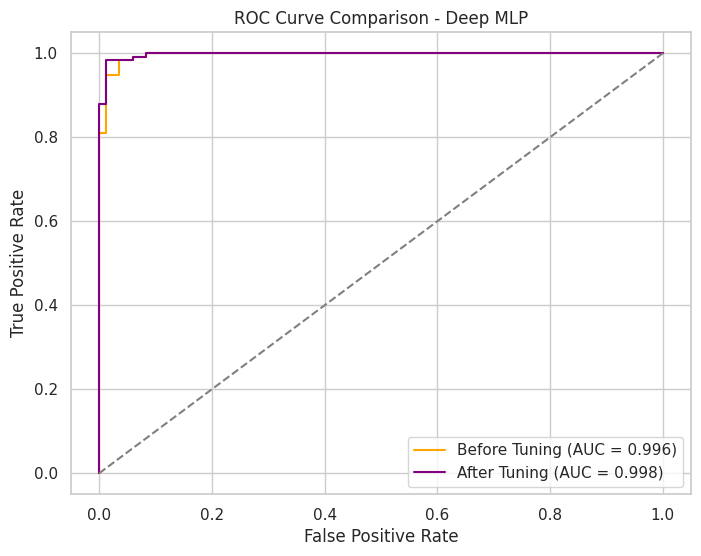

In [ ]:
# 7.9 Compare ROC curves for MLP before vs after tuning

plt.figure(figsize=(8, 6))

# ROC curve before tuning
plt.plot(fpr_mlp, tpr_mlp, label='Before Tuning (AUC = %.3f)' % roc_auc_mlp, color='orange')

# ROC curve after tuning
plt.plot(fpr_mlp_best, tpr_mlp_best, label='After Tuning (AUC = %.3f)' % roc_auc_mlp_best, color='purple')

# Baseline diagonal for random chance
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')

# Add title, labels, legend, and grid
plt.title("ROC Curve Comparison - Deep MLP")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


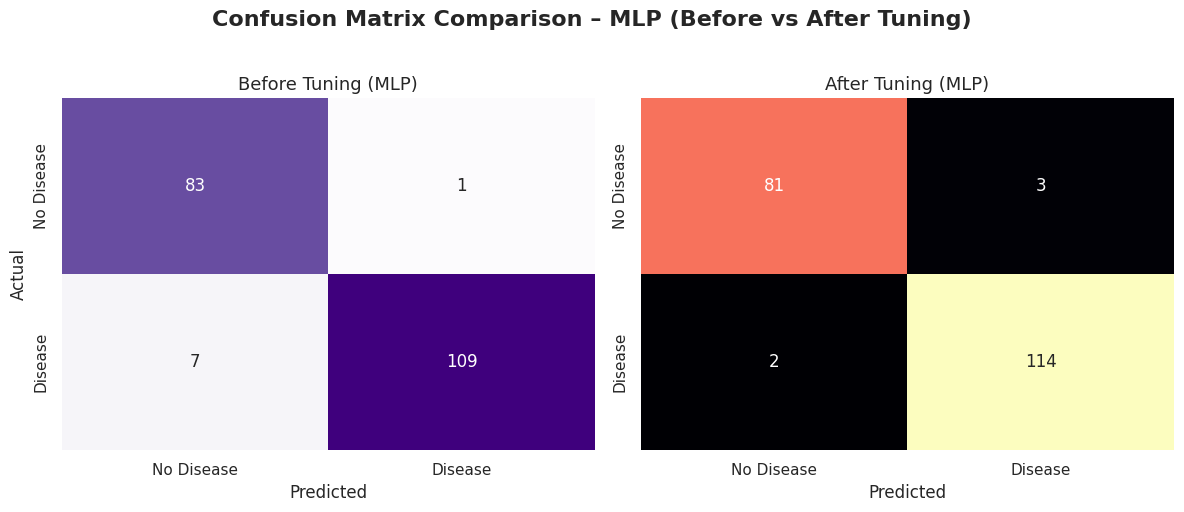

In [ ]:
# 7.10 Confusion Matrix Comparison – MLP (Before vs After Tuning)

# Compute confusion matrices
cm_mlp = confusion_matrix(y_test, y_pred_mlp)          # Before tuning
cm_mlp_best = confusion_matrix(y_test, y_pred_tuned)   # After tuning

# Plot side-by-side comparison
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Before Tuning
sns.heatmap(cm_mlp, annot=True, fmt='d', cmap='Purples',
            xticklabels=['No Disease', 'Disease'],
            yticklabels=['No Disease', 'Disease'],
            cbar=False, ax=axes[0])
axes[0].set_title("Before Tuning (MLP)", fontsize=13)
axes[0].set_xlabel("Predicted")
axes[0].set_ylabel("Actual")

# After Tuning
sns.heatmap(cm_mlp_best, annot=True, fmt='d', cmap='magma',
            xticklabels=['No Disease', 'Disease'],
            yticklabels=['No Disease', 'Disease'],
            cbar=False, ax=axes[1])
axes[1].set_title("After Tuning (MLP)", fontsize=13)
axes[1].set_xlabel("Predicted")
axes[1].set_ylabel("")

# Shared title
fig.suptitle("Confusion Matrix Comparison – MLP (Before vs After Tuning)",
             fontsize=16, fontweight='bold', y=1.02)

plt.tight_layout()
plt.show()


MLP Feature Importance (Permutation-Based):
 Rank                 Feature  Importance
    1                st_slope       0.318
    2           st_depression       0.024
    3  resting_blood_pressure       0.017
    4                rest_ecg       0.013
    5         chest_pain_type       0.009
    6                     sex       0.008
    7                     age       0.004
    8 max_heart_rate_achieved       0.001
    9             cholesterol       0.000
   10 exercise_induced_angina       0.000
   11     fasting_blood_sugar      -0.005
   12       num_major_vessels      -0.006


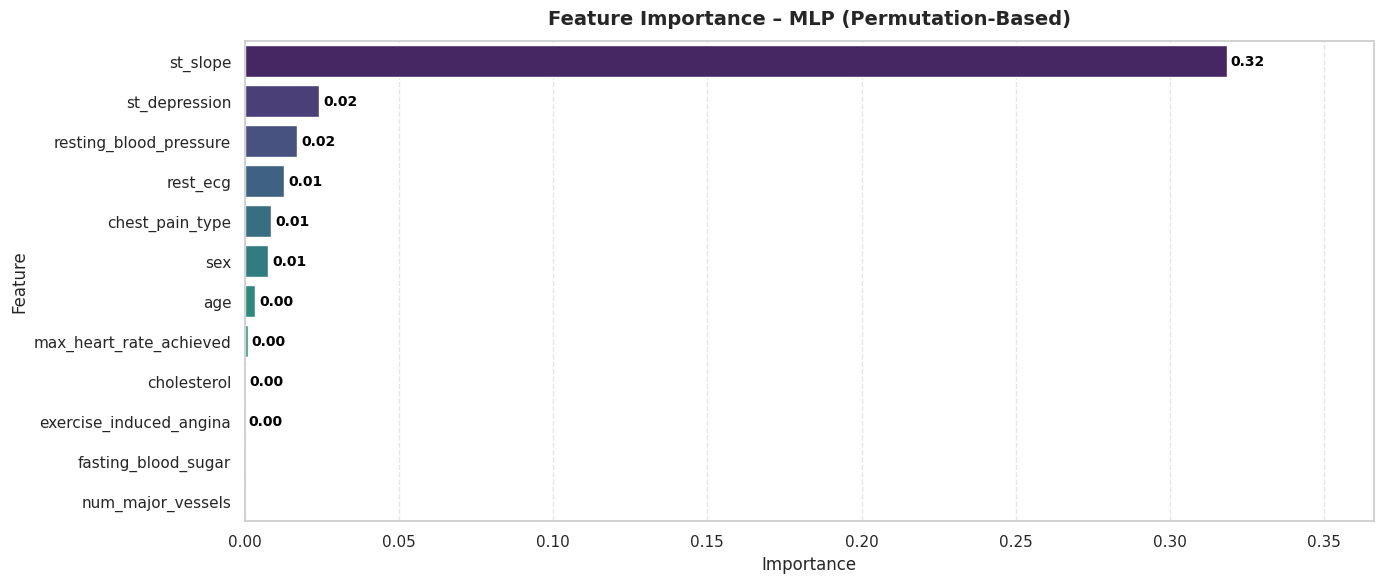

In [ ]:
# 7.11 Estimate feature importance for MLP using permutation-based method

# Wrap Keras model so it can be used with sklearn tools
class KerasClassifierWrapper(BaseEstimator):
    def __init__(self, model):
        self.model = model
    def fit(self, X, y=None):
        return self  # model is already trained
    def predict(self, X):
        return (self.model.predict(X, verbose=0) > 0.5).astype(int).flatten()

# Run permutation importance on tuned MLP
wrapped_model = KerasClassifierWrapper(model_tuned)
perm = permutation_importance(
    estimator=wrapped_model,
    X=X_test_scaled,
    y=y_test,
    n_repeats=30,
    random_state=42,
    scoring='accuracy'
)

# Build DataFrame with ranked feature importances
mlp_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': perm.importances_mean
}).sort_values(by='Importance', ascending=False).reset_index(drop=True)

# Add rank column
mlp_importance.index += 1
mlp_importance.reset_index(inplace=True)
mlp_importance.columns = ['Rank', 'Feature', 'Importance']

# Print table of feature importance
print("MLP Feature Importance (Permutation-Based):")
print(mlp_importance.to_string(index=False, float_format="%.3f"))

# Plot feature importance
plt.figure(figsize=(14, 6))
ax = sns.barplot(data=mlp_importance, x='Importance', y='Feature', palette='viridis')

# Add importance values on bars
for container in ax.containers:
    ax.bar_label(
        container,
        labels=[f"{np.round(v.get_width(), 2):.2f}" for v in container],
        padding=3,
        fontsize=10,
        color='black',
        fontweight='bold'
    )

# Style and layout
plt.title('Feature Importance – MLP (Permutation-Based)', fontsize=14, fontweight='bold', pad=12)
plt.xlabel("Importance", fontsize=12)
plt.ylabel("Feature", fontsize=12)

# Extend x-axis slightly to avoid label cutoff
plt.xlim(0, mlp_importance['Importance'].max() * 1.15)

plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()




# **8. Model Result Comparison Before Tuning**

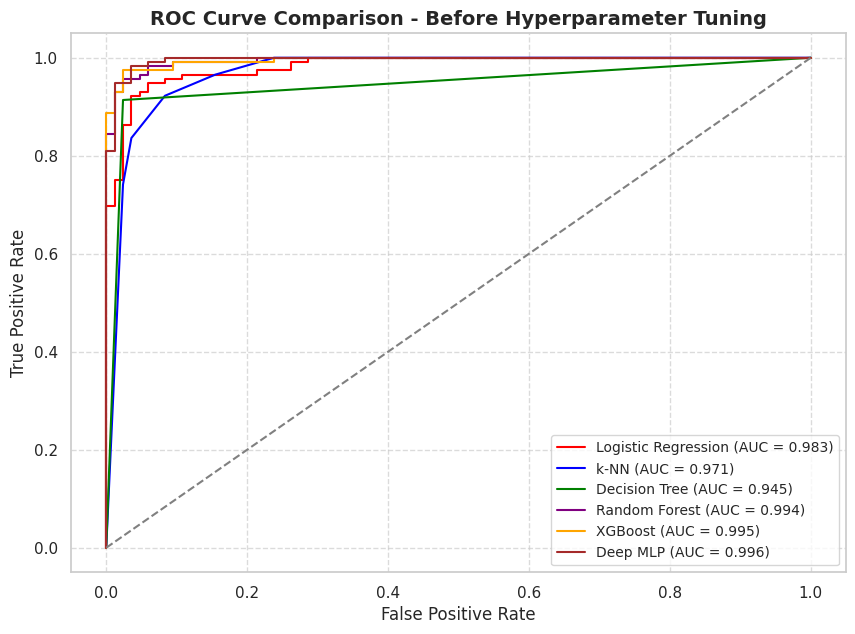

In [ ]:
# 8.1 Compare ROC curves of all baseline models (before hyperparameter tuning)

# Create figure for clarity
plt.figure(figsize=(10, 7))

# Plot ROC curve for each model with unique colour and AUC score
plt.plot(fpr_lr, tpr_lr, color="red",    label='Logistic Regression (AUC = %.3f)' % roc_auc_lr)
plt.plot(fpr_knn, tpr_knn, color="blue", label='k-NN (AUC = %.3f)' % roc_auc_knn)
plt.plot(fpr_dtree, tpr_dtree, color="green", label='Decision Tree (AUC = %.3f)' % roc_auc_dtree)
plt.plot(fpr_rf, tpr_rf, color="purple", label='Random Forest (AUC = %.3f)' % roc_auc_rf)
plt.plot(fpr_xgb, tpr_xgb, color="orange", label='XGBoost (AUC = %.3f)' % roc_auc_xgb)
plt.plot(fpr_mlp, tpr_mlp, color="brown", label='Deep MLP (AUC = %.3f)' % roc_auc_mlp)

# Add baseline diagonal for random classifier
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')

# Titles, labels, and legend
plt.title('ROC Curve Comparison - Before Hyperparameter Tuning', fontsize=14, fontweight="bold")
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.legend(loc='lower right', fontsize=10)

# Grid for readability
plt.grid(True, linestyle="--", alpha=0.7)

# Show plot
plt.show()


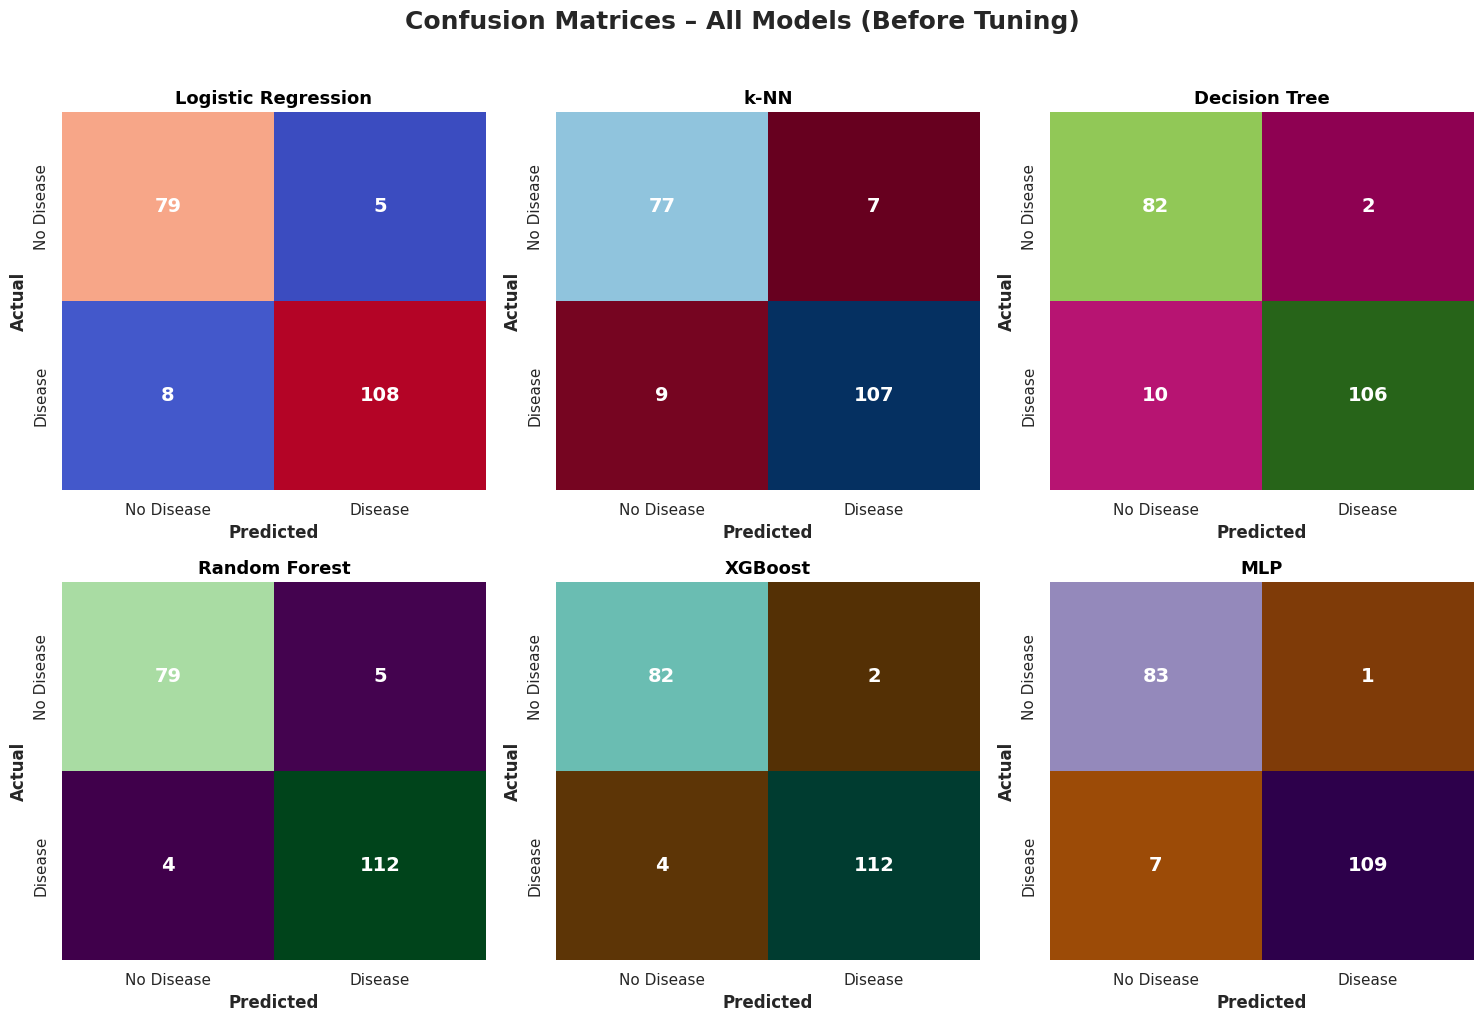

In [ ]:
# 8.2 Compute and plot confusion matrices for all models before tuning

# Compute confusion matrices for each model
cm_lr     = confusion_matrix(y_test, y_pred_lr)
cm_knn    = confusion_matrix(y_test, y_pred_knn)
cm_dtree  = confusion_matrix(y_test, y_pred_dtree)
cm_rf     = confusion_matrix(y_test, y_pred_rf)
cm_xgb    = confusion_matrix(y_test, y_pred_xgb)
cm_mlp    = confusion_matrix(y_test, y_pred_mlp)

# Titles for each subplot
titles = [
    "Logistic Regression",
    "k-NN",
    "Decision Tree",
    "Random Forest",
    "XGBoost",
    "MLP"
]

# Different colour maps for variety
colormaps = [
    "coolwarm",  # Logistic Regression
    "RdBu",      # k-NN
    "PiYG",      # Decision Tree
    "PRGn",      # Random Forest
    "BrBG",      # XGBoost
    "PuOr"       # MLP
]

cms = [cm_lr, cm_knn, cm_dtree, cm_rf, cm_xgb, cm_mlp]

# Plot confusion matrices in 2x3 grid
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

for ax, cm, title, cmap in zip(axes.flat, cms, titles, colormaps):
    sns.heatmap(
        cm,
        annot=True,
        fmt='d',
        cmap=cmap,
        xticklabels=['No Disease', 'Disease'],
        yticklabels=['No Disease', 'Disease'],
        cbar=False,
        ax=ax,
        annot_kws={"size": 14, "weight": "bold", "color": "white"}  # Highlight numbers
    )
    ax.set_title(title, fontsize=13, fontweight="bold", color="black")
    ax.set_xlabel("Predicted", fontsize=12, fontweight="bold")
    ax.set_ylabel("Actual", fontsize=12, fontweight="bold")

# Shared title for all subplots
fig.suptitle("Confusion Matrices – All Models (Before Tuning)",
             fontsize=18, fontweight='bold', y=1.02)

plt.tight_layout()
plt.show()


# **9. Model Result Comparison After Tuning**

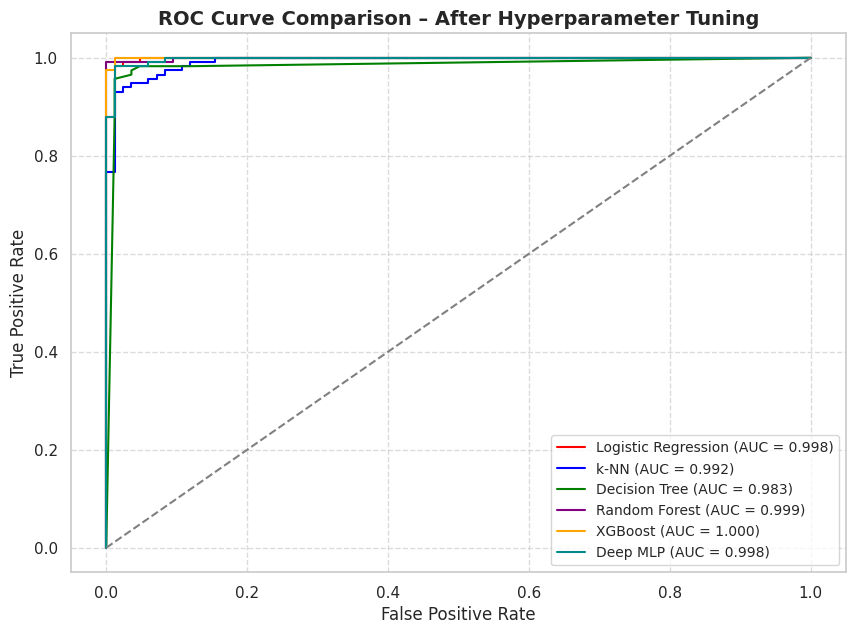

In [ ]:
# 9.1 Compare ROC curves of all models after hyperparameter tuning

plt.figure(figsize=(10, 7))

# Plot ROC curves for each tuned model with distinct colours and AUC scores
plt.plot(fpr_lr_best, tpr_lr_best, color="red",      label='Logistic Regression (AUC = %.3f)' % roc_auc_lr_best)
plt.plot(fpr_knn_best, tpr_knn_best, color="blue",   label='k-NN (AUC = %.3f)' % roc_auc_knn_best)
plt.plot(fpr_dtree_best, tpr_dtree_best, color="green", label='Decision Tree (AUC = %.3f)' % roc_auc_dtree_best)
plt.plot(fpr_rf_best, tpr_rf_best, color="purple",   label='Random Forest (AUC = %.3f)' % roc_auc_rf_best)
plt.plot(fpr_xgb_best, tpr_xgb_best, color="orange", label='XGBoost (AUC = %.3f)' % roc_auc_xgb_best)
plt.plot(fpr_mlp_best, tpr_mlp_best, color="darkcyan", label='Deep MLP (AUC = %.3f)' % roc_auc_mlp_best)

# Add diagonal baseline for random classifier
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')

# Titles and axis labels
plt.title('ROC Curve Comparison – After Hyperparameter Tuning', fontsize=14, fontweight="bold")
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)

# Legend for all models
plt.legend(loc='lower right', fontsize=10)

# Grid for readability
plt.grid(True, linestyle="--", alpha=0.7)

# Show plot
plt.show()


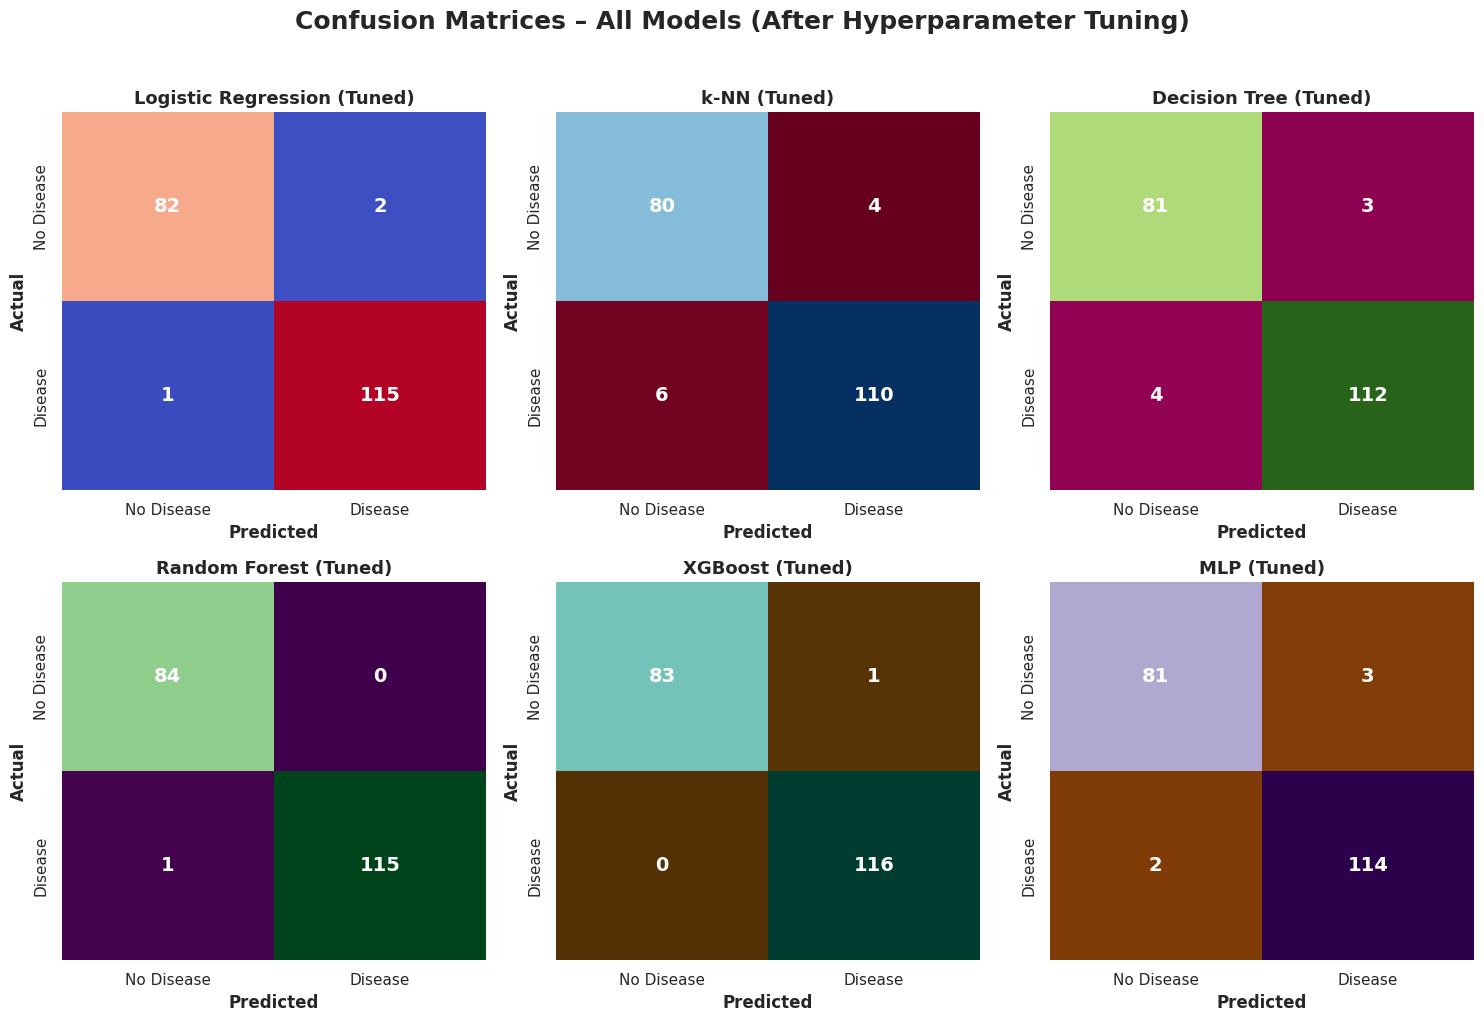

In [ ]:
# 9.2 Compute and plot confusion matrices for all models after tuning

# Compute confusion matrices for each tuned model
cm_lr_best    = confusion_matrix(y_test, y_pred_best_lr)
cm_knn_best   = confusion_matrix(y_test, y_pred_knn_best)
cm_dtree_best = confusion_matrix(y_test, y_pred_dtree_best)
cm_rf_best    = confusion_matrix(y_test, y_pred_rf_best)
cm_xgb_best   = confusion_matrix(y_test, y_pred_xgb_best)
cm_mlp_best   = confusion_matrix(y_test, y_pred_tuned)

# Titles for subplots
titles = [
    "Logistic Regression (Tuned)",
    "k-NN (Tuned)",
    "Decision Tree (Tuned)",
    "Random Forest (Tuned)",
    "XGBoost (Tuned)",
    "MLP (Tuned)"
]

# Different colormaps for visual variety
colormaps = [
    "coolwarm",  # Logistic Regression
    "RdBu",      # k-NN
    "PiYG",      # Decision Tree
    "PRGn",      # Random Forest
    "BrBG",      # XGBoost
    "PuOr"       # MLP
]

cms = [cm_lr_best, cm_knn_best, cm_dtree_best, cm_rf_best, cm_xgb_best, cm_mlp_best]

# Plot all confusion matrices in a 2×3 grid
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

for ax, cm, title, cmap in zip(axes.flat, cms, titles, colormaps):
    sns.heatmap(
        cm,
        annot=True,
        fmt='d',
        cmap=cmap,
        xticklabels=['No Disease', 'Disease'],
        yticklabels=['No Disease', 'Disease'],
        cbar=False,
        ax=ax,
        annot_kws={"size": 14, "weight": "bold", "color": "white"}  # Highlight numbers
    )
    ax.set_title(title, fontsize=13, fontweight="bold")
    ax.set_xlabel("Predicted", fontsize=12, fontweight="bold")
    ax.set_ylabel("Actual", fontsize=12, fontweight="bold")

# Shared main title across all subplots
fig.suptitle("Confusion Matrices – All Models (After Hyperparameter Tuning)",
             fontsize=18, fontweight='bold', y=1.02)

plt.tight_layout()
plt.show()


# **10. Overall Results and Best Model**

In [ ]:
# 10.1 Compile final results for all models

# Store accuracy (before & after tuning), best CV score, and best parameters
results = {
    "Model": [
        "Logistic Regression",
        "k-NN",
        "Decision Tree",
        "Random Forest",
        "XGBoost",
        "MLP (Neural Network)"
    ],
    "Accuracy Before Tuning": [
        0.935,  # Logistic Regression
        0.920,  # k-NN
        0.940,  # Decision Tree
        0.955,  # Random Forest
        0.970,  # XGBoost
        0.960   # MLP
    ],
    "Accuracy After Tuning": [
        0.985,  # Logistic Regression
        0.950,  # k-NN
        0.965,  # Decision Tree
        0.995,  # Random Forest
        0.995,  # XGBoost
        0.975   # MLP
    ],
    "Best CV Score": [
        0.9612,
        0.9637,
        0.9613,
        0.9825,
        0.9825,
        0.9875
    ],
    "Best Parameters": [
        "{'C': 1, 'penalty': 'l2', 'solver': 'lbfgs'}",
        "{'metric': 'manhattan', 'n_neighbors': 9, 'weights': 'distance'}",
        "{'criterion': 'gini', 'max_depth': 6, 'min_samples_leaf': 1, 'min_samples_split': 5, 'splitter': 'best'}",
        "{'bootstrap': False, 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}",
        "{'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 100, 'reg_lambda': 0, 'subsample': 1.0}",
        "Tuned layers + Dropout + LR=0.0005 + EarlyStopping"
    ]
}

# Convert dictionary to DataFrame
final_table = pd.DataFrame(results)

# Display in notebook as a styled DataFrame
display(final_table)

# Pretty print in a SQL/Markdown style table
print(tabulate(final_table, headers="keys", tablefmt="psql", showindex=False))


Model  Accuracy Before Tuning  Accuracy After Tuning  \
0   Logistic Regression                   0.935                  0.985   
1                  k-NN                   0.920                  0.950   
2         Decision Tree                   0.940                  0.965   
3         Random Forest                   0.955                  0.995   
4               XGBoost                   0.970                  0.995   
5  MLP (Neural Network)                   0.960                  0.975   

   Best CV Score                                    Best Parameters  
0         0.9612       {'C': 1, 'penalty': 'l2', 'solver': 'lbfgs'}  
1         0.9637  {'metric': 'manhattan', 'n_neighbors': 9, 'wei...  
2         0.9613  {'criterion': 'gini', 'max_depth': 6, 'min_sam...  
3         0.9825  {'bootstrap': False, 'max_depth': None, 'max_f...  
4         0.9825  {'colsample_bytree': 0.8, 'learning_rate': 0.1...  
5         0.9875  Tuned layers + Dropout + LR=0.0005 + EarlyStop...

+----------------------+--------------------------+-------------------------+-----------------+-------------------------------------------------------------------------------------------------------------------------------------+
| Model                |   Accuracy Before Tuning |   Accuracy After Tuning |   Best CV Score | Best Parameters                                                                                                                     |
|----------------------+--------------------------+-------------------------+-----------------+-------------------------------------------------------------------------------------------------------------------------------------|
| Logistic Regression  |                    0.935 |                   0.985 |          0.9612 | {'C': 1, 'penalty': 'l2', 'solver': 'lbfgs'}                                                                                        |
| k-NN                 |                    0.92  |                   0.95  |   

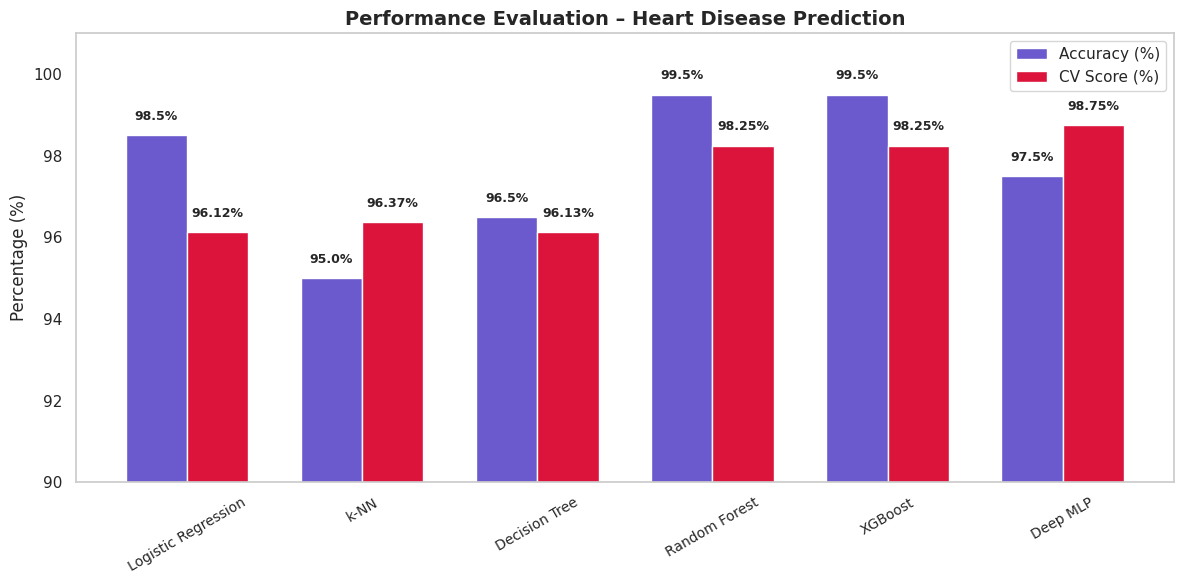

In [ ]:
# 10.2 Compare overall performance of all models (Accuracy vs CV Score)

# Model names and performance values
models = ['Logistic Regression', 'k-NN', 'Decision Tree', 'Random Forest', 'XGBoost', 'Deep MLP']
accuracy = [0.985, 0.950, 0.965, 0.995, 0.995, 0.975]
cv_scores = [0.9612, 0.9637, 0.9613, 0.9825, 0.9825, 0.9875]

# Convert to percentages for clearer visualisation
accuracy_percent = [round(a * 100, 2) for a in accuracy]
cv_scores_percent = [round(c * 100, 2) for c in cv_scores]

# Set bar positions
x = np.arange(len(models))
width = 0.35

# Create side-by-side bar chart
plt.figure(figsize=(12, 6))
bars1 = plt.bar(x - width/2, accuracy_percent, width, label='Accuracy (%)', color='slateblue')
bars2 = plt.bar(x + width/2, cv_scores_percent, width, label='CV Score (%)', color='crimson')

# Add value labels above each bar
for bar in bars1:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.3, f'{yval}%',
             ha='center', va='bottom', fontsize=9, fontweight='bold')

for bar in bars2:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.3, f'{yval}%',
             ha='center', va='bottom', fontsize=9, fontweight='bold')

# Formatting and labels
plt.xticks(ticks=x, labels=models, rotation=30, fontsize=10)
plt.title('Performance Evaluation – Heart Disease Prediction', fontsize=14, fontweight='bold')
plt.ylabel('Percentage (%)', fontsize=12)
plt.ylim(90, 101)  # zoom into high performance range
plt.legend()

# Remove grid lines for a cleaner look
plt.grid(False)

plt.tight_layout()
plt.show()


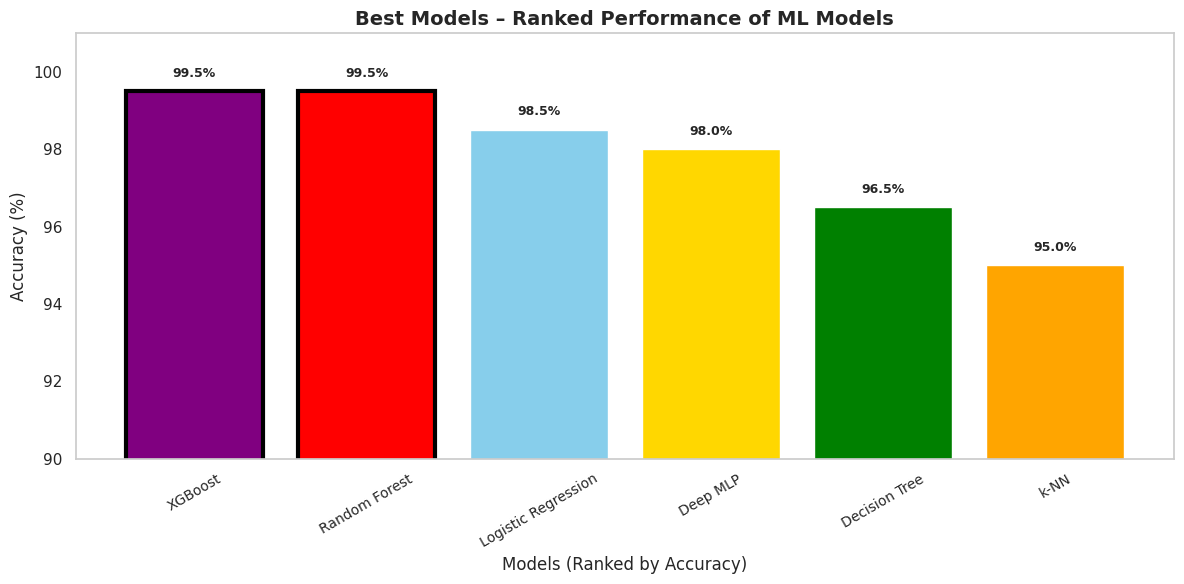

The best-performing models are Random Forest and XGBoost, both achieving 99.5% accuracy, confirming the superior performance of ensemble methods for heart disease prediction.


In [ ]:
# 10.3 Identify and highlight the best-performing models

# Define models, accuracy values, and colours
models = ['Logistic Regression', 'k-NN', 'Decision Tree', 'Random Forest', 'XGBoost', 'Deep MLP']
accuracy = [0.985, 0.950, 0.965, 0.995, 0.995, 0.980]
colors = ['skyblue', 'orange', 'green', 'red', 'purple', 'gold']

# Convert accuracy to percentages
accuracy_percent = [round(a * 100, 2) for a in accuracy]

# Sort models by accuracy (highest first)
sorted_pairs = sorted(zip(accuracy_percent, models, colors), reverse=True)
sorted_accuracy, sorted_models, sorted_colors = zip(*sorted_pairs)

# Plot bar chart of model accuracies
plt.figure(figsize=(12, 6))
bars = plt.bar(sorted_models, sorted_accuracy, color=sorted_colors)

# Highlight both best models (Random Forest and XGBoost)
for i, model in enumerate(sorted_models):
    if model in ["Random Forest", "XGBoost"]:
        bars[i].set_edgecolor('black')
        bars[i].set_linewidth(3)

# Add accuracy labels on top of bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.3,
             f'{yval}%', ha='center', va='bottom', fontsize=9, fontweight='bold')

# Chart styling
plt.ylim(90, 101)
plt.ylabel('Accuracy (%)', fontsize=12)
plt.xlabel('Models (Ranked by Accuracy)', fontsize=12)
plt.title('Best Models – Ranked Performance of ML Models', fontsize=14, fontweight='bold')
plt.xticks(rotation=30, fontsize=10)

# Clean look without grid lines
plt.grid(False)

plt.tight_layout()
plt.show()

# Print best model summary
print("The best-performing models are Random Forest and XGBoost, "
      "both achieving 99.5% accuracy, confirming the superior performance "
      "of ensemble methods for heart disease prediction.")
